#Step 1: Data Filtration

## Loading Packages and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!gdown --id "1RJSUB-Wf4WUg1AXMtW2X2wD9B2SIHYT8"

Downloading...
From: https://drive.google.com/uc?id=1RJSUB-Wf4WUg1AXMtW2X2wD9B2SIHYT8
To: /content/2019_assessments_fips_113135_gwinnett.csv
100% 137M/137M [00:01<00:00, 129MB/s]


In [ ]:
orig_data = pd.read_csv("2019_assessments_fips_113135_gwinnett.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data = orig_data.copy()

In [ ]:
data.columns

Index(['apn', 'address.full', 'address.city', 'address.state', 'address.house',
       'address.street', 'address.streetSuffix', 'address.unit', 'address.zip',
       'address.zip4', 'fips', 'state', 'county', 'coordinates.lat',
       'coordinates.long', 'censusTract', 'taxID', 'taxAmount', 'taxYear',
       'totalValue', 'marketValueYear', 'marketLandValue',
       'marketImprovementValue', 'marketTotalValue', 'landUseGeneral',
       'landUseCode', 'landUseDescription', 'zoningDescription',
       'lotSizeAcres', 'lotSizeSquareFeet', 'lotTopography',
       'numberOfBuildings', 'url', 'id', 'building.noOfUnits',
       'building.quality', 'building.condition', 'building.architecturalStyle',
       'building.yearBuilt', 'building.totalStories', 'building.totalRooms',
       'building.bedrooms', 'building.baths', 'building.heating',
       'building.airConditioning', 'building.foundation', 'building.fireplace',
       'building.water', 'building.sewer'],
      dtype='object')

In [ ]:
data.head()

,apn,address.full,address.city,address.state,address.house,address.street,address.streetSuffix,address.unit,address.zip,address.zip4,fips,state,county,coordinates.lat,coordinates.long,censusTract,taxID,taxAmount,taxYear,totalValue,marketValueYear,marketLandValue,marketImprovementValue,marketTotalValue,landUseGeneral,landUseCode,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,numberOfBuildings,url,id,building.noOfUnits,building.quality,building.condition,building.architecturalStyle,building.yearBuilt,building.totalStories,building.totalRooms,building.bedrooms,building.baths,building.heating,building.airConditioning,building.foundation,building.fireplace,building.water,building.sewer
0,6-112 -030,510 Village Green Ct Lilburn GA 30047,Lilburn,GA,510,Village Green,Ct,NaN,30047.0,NaN,13135,GA,Gwinnett County,33.873543,-84.117197,1.313505e+14,NaN,706.77,2019.0,80120,2019.0,42000,158300,200300,RR,RR101,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287556-2019,1.0,C,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,6-112 -032,540 Village Green Ct Lilburn GA 30047,Lilburn,GA,540,Village Green,Ct,NaN,30047.0,NaN,13135,GA,Gwinnett County,33.872805,-84.116702,1.313505e+14,NaN,2683.31,2019.0,77520,2019.0,42000,151800,193800,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287558-2019,1.0,C,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,6-114 -241,2 5133 Arbor Ln Lilburn GA 30047,Lilburn,GA,5133,Arbor,Ln,2,30047.0,NaN,13135,GA,Gwinnett County,33.867538,-84.137380,1.313505e+14,NaN,3110.38,2019.0,79000,2019.0,46000,151500,197500,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288362-2019,1.0,C,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,6-114 -258,4 215 Shunn Way Lilburn GA 30047,Lilburn,GA,215,Shunn,Way,4,30047.0,NaN,13135,GA,Gwinnett County,33.869804,-84.139034,1.313505e+14,NaN,2583.50,2019.0,81880,2019.0,46000,158700,204700,RR,RR101,Single Family Residential,R100-Single Family Residence,0.44,19166.4,Level Grade,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288378-2019,1.0,C,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,6-114 -260,4 195 Shunn Way Lilburn GA 30047,Lilburn,GA,195,Shunn,Way,4,30047.0,NaN,13135,GA,Gwinnett County,33.870027,-84.138435,1.313505e+14,NaN,2776.53,2019.0,78360,2019.0,46000,149900,195900,RR,RR101,Single Family Residential,R1-Single Family Residence LIL,0.44,19166.4,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288380-2019,1.0,C,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


## Data Segregation

In [ ]:
dump_df = pd.DataFrame()

In [ ]:
# "apn" may also not be the potential feature for the regression model, we put it into the "dump_df"
dump_df["apn"] = data["apn"]
dump_df.head()

,apn
0,6-112 -030
1,6-112 -032
2,6-114 -241
3,6-114 -258
4,6-114 -260


In [ ]:
# Dropping the column "apn" from "data"
data = data.drop(columns="apn")
data.head()

,address.full,address.city,address.state,address.house,address.street,address.streetSuffix,address.unit,address.zip,address.zip4,fips,state,county,coordinates.lat,coordinates.long,censusTract,taxID,taxAmount,taxYear,totalValue,marketValueYear,marketLandValue,marketImprovementValue,marketTotalValue,landUseGeneral,landUseCode,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,numberOfBuildings,url,id,building.noOfUnits,building.quality,building.condition,building.architecturalStyle,building.yearBuilt,building.totalStories,building.totalRooms,building.bedrooms,building.baths,building.heating,building.airConditioning,building.foundation,building.fireplace,building.water,building.sewer
0,510 Village Green Ct Lilburn GA 30047,Lilburn,GA,510,Village Green,Ct,NaN,30047.0,NaN,13135,GA,Gwinnett County,33.873543,-84.117197,1.313505e+14,NaN,706.77,2019.0,80120,2019.0,42000,158300,200300,RR,RR101,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287556-2019,1.0,C,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,540 Village Green Ct Lilburn GA 30047,Lilburn,GA,540,Village Green,Ct,NaN,30047.0,NaN,13135,GA,Gwinnett County,33.872805,-84.116702,1.313505e+14,NaN,2683.31,2019.0,77520,2019.0,42000,151800,193800,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287558-2019,1.0,C,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,2 5133 Arbor Ln Lilburn GA 30047,Lilburn,GA,5133,Arbor,Ln,2,30047.0,NaN,13135,GA,Gwinnett County,33.867538,-84.137380,1.313505e+14,NaN,3110.38,2019.0,79000,2019.0,46000,151500,197500,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288362-2019,1.0,C,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,4 215 Shunn Way Lilburn GA 30047,Lilburn,GA,215,Shunn,Way,4,30047.0,NaN,13135,GA,Gwinnett County,33.869804,-84.139034,1.313505e+14,NaN,2583.50,2019.0,81880,2019.0,46000,158700,204700,RR,RR101,Single Family Residential,R100-Single Family Residence,0.44,19166.4,Level Grade,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288378-2019,1.0,C,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,4 195 Shunn Way Lilburn GA 30047,Lilburn,GA,195,Shunn,Way,4,30047.0,NaN,13135,GA,Gwinnett County,33.870027,-84.138435,1.313505e+14,NaN,2776.53,2019.0,78360,2019.0,46000,149900,195900,RR,RR101,Single Family Residential,R1-Single Family Residence LIL,0.44,19166.4,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288380-2019,1.0,C,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


In [ ]:
# Since we have divided the address to city, house and siffix and zip code
# We do not need the full address; Keeping it in dump_df

dump_df["address.full"] = data["address.full"]
dump_df.head()

,apn,address.full
0,6-112 -030,510 Village Green Ct Lilburn GA 30047
1,6-112 -032,540 Village Green Ct Lilburn GA 30047
2,6-114 -241,2 5133 Arbor Ln Lilburn GA 30047
3,6-114 -258,4 215 Shunn Way Lilburn GA 30047
4,6-114 -260,4 195 Shunn Way Lilburn GA 30047


In [ ]:
data = data.drop(columns="address.full")
data.head()

,address.city,address.state,address.house,address.street,address.streetSuffix,address.unit,address.zip,address.zip4,fips,state,county,coordinates.lat,coordinates.long,censusTract,taxID,taxAmount,taxYear,totalValue,marketValueYear,marketLandValue,marketImprovementValue,marketTotalValue,landUseGeneral,landUseCode,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,numberOfBuildings,url,id,building.noOfUnits,building.quality,building.condition,building.architecturalStyle,building.yearBuilt,building.totalStories,building.totalRooms,building.bedrooms,building.baths,building.heating,building.airConditioning,building.foundation,building.fireplace,building.water,building.sewer
0,Lilburn,GA,510,Village Green,Ct,NaN,30047.0,NaN,13135,GA,Gwinnett County,33.873543,-84.117197,1.313505e+14,NaN,706.77,2019.0,80120,2019.0,42000,158300,200300,RR,RR101,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287556-2019,1.0,C,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,Lilburn,GA,540,Village Green,Ct,NaN,30047.0,NaN,13135,GA,Gwinnett County,33.872805,-84.116702,1.313505e+14,NaN,2683.31,2019.0,77520,2019.0,42000,151800,193800,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287558-2019,1.0,C,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,Lilburn,GA,5133,Arbor,Ln,2,30047.0,NaN,13135,GA,Gwinnett County,33.867538,-84.137380,1.313505e+14,NaN,3110.38,2019.0,79000,2019.0,46000,151500,197500,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288362-2019,1.0,C,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,Lilburn,GA,215,Shunn,Way,4,30047.0,NaN,13135,GA,Gwinnett County,33.869804,-84.139034,1.313505e+14,NaN,2583.50,2019.0,81880,2019.0,46000,158700,204700,RR,RR101,Single Family Residential,R100-Single Family Residence,0.44,19166.4,Level Grade,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288378-2019,1.0,C,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,Lilburn,GA,195,Shunn,Way,4,30047.0,NaN,13135,GA,Gwinnett County,33.870027,-84.138435,1.313505e+14,NaN,2776.53,2019.0,78360,2019.0,46000,149900,195900,RR,RR101,Single Family Residential,R1-Single Family Residence LIL,0.44,19166.4,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288380-2019,1.0,C,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


In [ ]:
new_data = pd.DataFrame()

In [ ]:
print(data["address.city"].unique())

# We need the city. We keep the column and convert all the values into lower case
# We add them to new_data
data["address.city"] = data["address.city"]
# Whats the point of the line above this comment? - Joed
new_data["city"] = data["address.city"]
new_data.head()

['Lilburn' 'TUCKER' 'Stone Mountain' 'Tucker' 'LILBURN' 'Lawrenceville'
 'Snellville' 'BUFORD' 'LAWRENCEVILLE' 'STONE MOUNTAIN' 'SNELLVILLE'
 'Loganville' 'Dacula' 'DACULA' 'Norcross' 'Bethlehem' 'BETHLEHEM'
 'NORCROSS' 'Auburn' 'AUBURN' 'Buford' 'Duluth' 'Atlanta' nan 'DULUTH'
 'Suwanee' 'SUWANEE' 'Peachtree Corners' 'PEACHTREE CORNERS' 'ATLANTA'
 'Grayson' 'LOGANVILLE' 'GRAYSON' 'Hoschton' 'Braselton' 'BRASELTON'
 'HOSCHTON' 'CONYERS' 'Conyers' 'Lithonia' 'Cumming']


,city
0,Lilburn
1,Lilburn
2,Lilburn
3,Lilburn
4,Lilburn


In [ ]:
data = data.drop(columns="address.city")
data.head()

,address.state,address.house,address.street,address.streetSuffix,address.unit,address.zip,address.zip4,fips,state,county,coordinates.lat,coordinates.long,censusTract,taxID,taxAmount,taxYear,totalValue,marketValueYear,marketLandValue,marketImprovementValue,marketTotalValue,landUseGeneral,landUseCode,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,numberOfBuildings,url,id,building.noOfUnits,building.quality,building.condition,building.architecturalStyle,building.yearBuilt,building.totalStories,building.totalRooms,building.bedrooms,building.baths,building.heating,building.airConditioning,building.foundation,building.fireplace,building.water,building.sewer
0,GA,510,Village Green,Ct,NaN,30047.0,NaN,13135,GA,Gwinnett County,33.873543,-84.117197,1.313505e+14,NaN,706.77,2019.0,80120,2019.0,42000,158300,200300,RR,RR101,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287556-2019,1.0,C,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,GA,540,Village Green,Ct,NaN,30047.0,NaN,13135,GA,Gwinnett County,33.872805,-84.116702,1.313505e+14,NaN,2683.31,2019.0,77520,2019.0,42000,151800,193800,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287558-2019,1.0,C,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,GA,5133,Arbor,Ln,2,30047.0,NaN,13135,GA,Gwinnett County,33.867538,-84.137380,1.313505e+14,NaN,3110.38,2019.0,79000,2019.0,46000,151500,197500,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288362-2019,1.0,C,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,GA,215,Shunn,Way,4,30047.0,NaN,13135,GA,Gwinnett County,33.869804,-84.139034,1.313505e+14,NaN,2583.50,2019.0,81880,2019.0,46000,158700,204700,RR,RR101,Single Family Residential,R100-Single Family Residence,0.44,19166.4,Level Grade,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288378-2019,1.0,C,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,GA,195,Shunn,Way,4,30047.0,NaN,13135,GA,Gwinnett County,33.870027,-84.138435,1.313505e+14,NaN,2776.53,2019.0,78360,2019.0,46000,149900,195900,RR,RR101,Single Family Residential,R1-Single Family Residence LIL,0.44,19166.4,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288380-2019,1.0,C,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


In [ ]:
# These are required: address.state,	address.house,	address.street, address.streetSuffix,	address.unit,	address.zip,	address.zip4
# Adding them to new_data
temp_df = data.iloc[:,:7]
temp_cols = list(temp_df.columns)
print(temp_cols)
new_cols = list(map(lambda x: x.split('.')[1], temp_cols))
temp_cols_dict = dict(zip(temp_cols, new_cols))
print(temp_cols_dict)

['address.state', 'address.house', 'address.street', 'address.streetSuffix', 'address.unit', 'address.zip', 'address.zip4']
{'address.state': 'state', 'address.house': 'house', 'address.street': 'street', 'address.streetSuffix': 'streetSuffix', 'address.unit': 'unit', 'address.zip': 'zip', 'address.zip4': 'zip4'}


In [ ]:
# We keep the State, House Number, Street Name, suffix, unit and zip code
# State is only one, but can be anything -> We might want to encode all the 50 state of USA
temp_df = temp_df.rename(columns=temp_cols_dict)
new_data = pd.concat([new_data, temp_df], axis=1)
new_data.head()

,city,state,house,street,streetSuffix,unit,zip,zip4
0,Lilburn,GA,510,Village Green,Ct,NaN,30047.0,NaN
1,Lilburn,GA,540,Village Green,Ct,NaN,30047.0,NaN
2,Lilburn,GA,5133,Arbor,Ln,2,30047.0,NaN
3,Lilburn,GA,215,Shunn,Way,4,30047.0,NaN
4,Lilburn,GA,195,Shunn,Way,4,30047.0,NaN


In [ ]:
data = data.drop(columns=temp_cols)
data.head()

,fips,state,county,coordinates.lat,coordinates.long,censusTract,taxID,taxAmount,taxYear,totalValue,marketValueYear,marketLandValue,marketImprovementValue,marketTotalValue,landUseGeneral,landUseCode,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,numberOfBuildings,url,id,building.noOfUnits,building.quality,building.condition,building.architecturalStyle,building.yearBuilt,building.totalStories,building.totalRooms,building.bedrooms,building.baths,building.heating,building.airConditioning,building.foundation,building.fireplace,building.water,building.sewer
0,13135,GA,Gwinnett County,33.873543,-84.117197,1.313505e+14,NaN,706.77,2019.0,80120,2019.0,42000,158300,200300,RR,RR101,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287556-2019,1.0,C,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,13135,GA,Gwinnett County,33.872805,-84.116702,1.313505e+14,NaN,2683.31,2019.0,77520,2019.0,42000,151800,193800,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287558-2019,1.0,C,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,13135,GA,Gwinnett County,33.867538,-84.137380,1.313505e+14,NaN,3110.38,2019.0,79000,2019.0,46000,151500,197500,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288362-2019,1.0,C,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,13135,GA,Gwinnett County,33.869804,-84.139034,1.313505e+14,NaN,2583.50,2019.0,81880,2019.0,46000,158700,204700,RR,RR101,Single Family Residential,R100-Single Family Residence,0.44,19166.4,Level Grade,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288378-2019,1.0,C,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,13135,GA,Gwinnett County,33.870027,-84.138435,1.313505e+14,NaN,2776.53,2019.0,78360,2019.0,46000,149900,195900,RR,RR101,Single Family Residential,R1-Single Family Residence LIL,0.44,19166.4,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288380-2019,1.0,C,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


In [ ]:
# We don't need "fips" since it has only single value, adding to dump_df
print(data["fips"].unique())

dump_df["fips"] = data["fips"]
dump_df.head()

[13135]


,apn,address.full,fips
0,6-112 -030,510 Village Green Ct Lilburn GA 30047,13135
1,6-112 -032,540 Village Green Ct Lilburn GA 30047,13135
2,6-114 -241,2 5133 Arbor Ln Lilburn GA 30047,13135
3,6-114 -258,4 215 Shunn Way Lilburn GA 30047,13135
4,6-114 -260,4 195 Shunn Way Lilburn GA 30047,13135


In [ ]:
data = data.drop(columns="fips")
data.head()

,state,county,coordinates.lat,coordinates.long,censusTract,taxID,taxAmount,taxYear,totalValue,marketValueYear,marketLandValue,marketImprovementValue,marketTotalValue,landUseGeneral,landUseCode,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,numberOfBuildings,url,id,building.noOfUnits,building.quality,building.condition,building.architecturalStyle,building.yearBuilt,building.totalStories,building.totalRooms,building.bedrooms,building.baths,building.heating,building.airConditioning,building.foundation,building.fireplace,building.water,building.sewer
0,GA,Gwinnett County,33.873543,-84.117197,1.313505e+14,NaN,706.77,2019.0,80120,2019.0,42000,158300,200300,RR,RR101,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287556-2019,1.0,C,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,GA,Gwinnett County,33.872805,-84.116702,1.313505e+14,NaN,2683.31,2019.0,77520,2019.0,42000,151800,193800,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287558-2019,1.0,C,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,GA,Gwinnett County,33.867538,-84.137380,1.313505e+14,NaN,3110.38,2019.0,79000,2019.0,46000,151500,197500,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288362-2019,1.0,C,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,GA,Gwinnett County,33.869804,-84.139034,1.313505e+14,NaN,2583.50,2019.0,81880,2019.0,46000,158700,204700,RR,RR101,Single Family Residential,R100-Single Family Residence,0.44,19166.4,Level Grade,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288378-2019,1.0,C,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,GA,Gwinnett County,33.870027,-84.138435,1.313505e+14,NaN,2776.53,2019.0,78360,2019.0,46000,149900,195900,RR,RR101,Single Family Residential,R1-Single Family Residence LIL,0.44,19166.4,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288380-2019,1.0,C,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


In [ ]:
print(data["county"].unique())

#Only "Gwinnett County" -> Can be dropped
dump_df["county"] = data["county"]
dump_df.head()

['Gwinnett County']


,apn,address.full,fips,county
0,6-112 -030,510 Village Green Ct Lilburn GA 30047,13135,Gwinnett County
1,6-112 -032,540 Village Green Ct Lilburn GA 30047,13135,Gwinnett County
2,6-114 -241,2 5133 Arbor Ln Lilburn GA 30047,13135,Gwinnett County
3,6-114 -258,4 215 Shunn Way Lilburn GA 30047,13135,Gwinnett County
4,6-114 -260,4 195 Shunn Way Lilburn GA 30047,13135,Gwinnett County


In [ ]:
data = data.drop(columns="county")
data.head()

,state,coordinates.lat,coordinates.long,censusTract,taxID,taxAmount,taxYear,totalValue,marketValueYear,marketLandValue,marketImprovementValue,marketTotalValue,landUseGeneral,landUseCode,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,numberOfBuildings,url,id,building.noOfUnits,building.quality,building.condition,building.architecturalStyle,building.yearBuilt,building.totalStories,building.totalRooms,building.bedrooms,building.baths,building.heating,building.airConditioning,building.foundation,building.fireplace,building.water,building.sewer
0,GA,33.873543,-84.117197,1.313505e+14,NaN,706.77,2019.0,80120,2019.0,42000,158300,200300,RR,RR101,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287556-2019,1.0,C,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,GA,33.872805,-84.116702,1.313505e+14,NaN,2683.31,2019.0,77520,2019.0,42000,151800,193800,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287558-2019,1.0,C,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,GA,33.867538,-84.137380,1.313505e+14,NaN,3110.38,2019.0,79000,2019.0,46000,151500,197500,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288362-2019,1.0,C,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,GA,33.869804,-84.139034,1.313505e+14,NaN,2583.50,2019.0,81880,2019.0,46000,158700,204700,RR,RR101,Single Family Residential,R100-Single Family Residence,0.44,19166.4,Level Grade,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288378-2019,1.0,C,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,GA,33.870027,-84.138435,1.313505e+14,NaN,2776.53,2019.0,78360,2019.0,46000,149900,195900,RR,RR101,Single Family Residential,R1-Single Family Residence LIL,0.44,19166.4,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288380-2019,1.0,C,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


In [ ]:
print(data["state"].unique())

# Already loaded
dump_df["state"] = data["state"]
dump_df.head()

['GA']


,apn,address.full,fips,county,state
0,6-112 -030,510 Village Green Ct Lilburn GA 30047,13135,Gwinnett County,GA
1,6-112 -032,540 Village Green Ct Lilburn GA 30047,13135,Gwinnett County,GA
2,6-114 -241,2 5133 Arbor Ln Lilburn GA 30047,13135,Gwinnett County,GA
3,6-114 -258,4 215 Shunn Way Lilburn GA 30047,13135,Gwinnett County,GA
4,6-114 -260,4 195 Shunn Way Lilburn GA 30047,13135,Gwinnett County,GA


In [ ]:
data = data.drop(columns="state")
data.head()

,coordinates.lat,coordinates.long,censusTract,taxID,taxAmount,taxYear,totalValue,marketValueYear,marketLandValue,marketImprovementValue,marketTotalValue,landUseGeneral,landUseCode,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,numberOfBuildings,url,id,building.noOfUnits,building.quality,building.condition,building.architecturalStyle,building.yearBuilt,building.totalStories,building.totalRooms,building.bedrooms,building.baths,building.heating,building.airConditioning,building.foundation,building.fireplace,building.water,building.sewer
0,33.873543,-84.117197,1.313505e+14,NaN,706.77,2019.0,80120,2019.0,42000,158300,200300,RR,RR101,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287556-2019,1.0,C,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,33.872805,-84.116702,1.313505e+14,NaN,2683.31,2019.0,77520,2019.0,42000,151800,193800,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287558-2019,1.0,C,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,33.867538,-84.137380,1.313505e+14,NaN,3110.38,2019.0,79000,2019.0,46000,151500,197500,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288362-2019,1.0,C,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,33.869804,-84.139034,1.313505e+14,NaN,2583.50,2019.0,81880,2019.0,46000,158700,204700,RR,RR101,Single Family Residential,R100-Single Family Residence,0.44,19166.4,Level Grade,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288378-2019,1.0,C,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,33.870027,-84.138435,1.313505e+14,NaN,2776.53,2019.0,78360,2019.0,46000,149900,195900,RR,RR101,Single Family Residential,R1-Single Family Residence LIL,0.44,19166.4,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288380-2019,1.0,C,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


In [ ]:
# We keep latitude, longitude
temp_df = data.iloc[:,:2]
temp_cols = list(temp_df.columns)
new_cols = ["latitude","longitude"]
temp_cols_dict = dict(zip(temp_cols, new_cols))
print(temp_cols_dict)

{'coordinates.lat': 'latitude', 'coordinates.long': 'longitude'}


In [ ]:
temp_df = temp_df.rename(columns=temp_cols_dict)
new_data = pd.concat([new_data, temp_df], axis=1)
new_data.head()

,city,state,house,street,streetSuffix,unit,zip,zip4,latitude,longitude
0,Lilburn,GA,510,Village Green,Ct,NaN,30047.0,NaN,33.873543,-84.117197
1,Lilburn,GA,540,Village Green,Ct,NaN,30047.0,NaN,33.872805,-84.116702
2,Lilburn,GA,5133,Arbor,Ln,2,30047.0,NaN,33.867538,-84.137380
3,Lilburn,GA,215,Shunn,Way,4,30047.0,NaN,33.869804,-84.139034
4,Lilburn,GA,195,Shunn,Way,4,30047.0,NaN,33.870027,-84.138435


In [ ]:
data = data.drop(columns=temp_cols)
data.head()

,censusTract,taxID,taxAmount,taxYear,totalValue,marketValueYear,marketLandValue,marketImprovementValue,marketTotalValue,landUseGeneral,landUseCode,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,numberOfBuildings,url,id,building.noOfUnits,building.quality,building.condition,building.architecturalStyle,building.yearBuilt,building.totalStories,building.totalRooms,building.bedrooms,building.baths,building.heating,building.airConditioning,building.foundation,building.fireplace,building.water,building.sewer
0,1.313505e+14,NaN,706.77,2019.0,80120,2019.0,42000,158300,200300,RR,RR101,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287556-2019,1.0,C,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,1.313505e+14,NaN,2683.31,2019.0,77520,2019.0,42000,151800,193800,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287558-2019,1.0,C,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,1.313505e+14,NaN,3110.38,2019.0,79000,2019.0,46000,151500,197500,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288362-2019,1.0,C,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,1.313505e+14,NaN,2583.50,2019.0,81880,2019.0,46000,158700,204700,RR,RR101,Single Family Residential,R100-Single Family Residence,0.44,19166.4,Level Grade,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288378-2019,1.0,C,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,1.313505e+14,NaN,2776.53,2019.0,78360,2019.0,46000,149900,195900,RR,RR101,Single Family Residential,R1-Single Family Residence LIL,0.44,19166.4,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288380-2019,1.0,C,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


In [ ]:
print(data["censusTract"].unique())

# What is censusTract? Do we need it? Lets keep it in confusion_df and remove from "data"
confusion_df = pd.DataFrame()
confusion_df["censusTract"] = data["censusTract"]
confusion_df.head()

[1.31350504e+14 1.31350504e+14 1.31350504e+14 ... 1.31350506e+14
 1.31350505e+14 1.31350502e+14]


,censusTract
0,1.313505e+14
1,1.313505e+14
2,1.313505e+14
3,1.313505e+14
4,1.313505e+14


In [ ]:
data = data.drop(columns="censusTract")
data.head()

,taxID,taxAmount,taxYear,totalValue,marketValueYear,marketLandValue,marketImprovementValue,marketTotalValue,landUseGeneral,landUseCode,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,numberOfBuildings,url,id,building.noOfUnits,building.quality,building.condition,building.architecturalStyle,building.yearBuilt,building.totalStories,building.totalRooms,building.bedrooms,building.baths,building.heating,building.airConditioning,building.foundation,building.fireplace,building.water,building.sewer
0,NaN,706.77,2019.0,80120,2019.0,42000,158300,200300,RR,RR101,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287556-2019,1.0,C,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,NaN,2683.31,2019.0,77520,2019.0,42000,151800,193800,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287558-2019,1.0,C,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,NaN,3110.38,2019.0,79000,2019.0,46000,151500,197500,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288362-2019,1.0,C,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,NaN,2583.50,2019.0,81880,2019.0,46000,158700,204700,RR,RR101,Single Family Residential,R100-Single Family Residence,0.44,19166.4,Level Grade,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288378-2019,1.0,C,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,NaN,2776.53,2019.0,78360,2019.0,46000,149900,195900,RR,RR101,Single Family Residential,R1-Single Family Residence LIL,0.44,19166.4,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288380-2019,1.0,C,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


In [ ]:
print(data["taxID"].unique())

# We don't have taxID, since no value, so add to dump_df
dump_df["taxID"] = data["taxID"]
dump_df.head()

[nan]


,apn,address.full,fips,county,state,taxID
0,6-112 -030,510 Village Green Ct Lilburn GA 30047,13135,Gwinnett County,GA,NaN
1,6-112 -032,540 Village Green Ct Lilburn GA 30047,13135,Gwinnett County,GA,NaN
2,6-114 -241,2 5133 Arbor Ln Lilburn GA 30047,13135,Gwinnett County,GA,NaN
3,6-114 -258,4 215 Shunn Way Lilburn GA 30047,13135,Gwinnett County,GA,NaN
4,6-114 -260,4 195 Shunn Way Lilburn GA 30047,13135,Gwinnett County,GA,NaN


In [ ]:
data = data.drop(columns=["taxID"])
data.head()

,taxAmount,taxYear,totalValue,marketValueYear,marketLandValue,marketImprovementValue,marketTotalValue,landUseGeneral,landUseCode,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,numberOfBuildings,url,id,building.noOfUnits,building.quality,building.condition,building.architecturalStyle,building.yearBuilt,building.totalStories,building.totalRooms,building.bedrooms,building.baths,building.heating,building.airConditioning,building.foundation,building.fireplace,building.water,building.sewer
0,706.77,2019.0,80120,2019.0,42000,158300,200300,RR,RR101,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287556-2019,1.0,C,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,2683.31,2019.0,77520,2019.0,42000,151800,193800,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287558-2019,1.0,C,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,3110.38,2019.0,79000,2019.0,46000,151500,197500,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288362-2019,1.0,C,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,2583.50,2019.0,81880,2019.0,46000,158700,204700,RR,RR101,Single Family Residential,R100-Single Family Residence,0.44,19166.4,Level Grade,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288378-2019,1.0,C,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,2776.53,2019.0,78360,2019.0,46000,149900,195900,RR,RR101,Single Family Residential,R1-Single Family Residence LIL,0.44,19166.4,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288380-2019,1.0,C,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


In [ ]:
# How are we going to process the taxAmount and taxYear, are they the direct features for Regression Model? For now lets keep in confusion_df
confusion_df = pd.concat([confusion_df, data.iloc[:,:2]], axis=1)
confusion_df.head()

,censusTract,taxAmount,taxYear
0,1.313505e+14,706.77,2019.0
1,1.313505e+14,2683.31,2019.0
2,1.313505e+14,3110.38,2019.0
3,1.313505e+14,2583.50,2019.0
4,1.313505e+14,2776.53,2019.0


In [ ]:
data = data.drop(columns=["taxAmount", "taxYear"])
data.head()

,totalValue,marketValueYear,marketLandValue,marketImprovementValue,marketTotalValue,landUseGeneral,landUseCode,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,numberOfBuildings,url,id,building.noOfUnits,building.quality,building.condition,building.architecturalStyle,building.yearBuilt,building.totalStories,building.totalRooms,building.bedrooms,building.baths,building.heating,building.airConditioning,building.foundation,building.fireplace,building.water,building.sewer
0,80120,2019.0,42000,158300,200300,RR,RR101,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287556-2019,1.0,C,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,77520,2019.0,42000,151800,193800,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287558-2019,1.0,C,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,79000,2019.0,46000,151500,197500,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288362-2019,1.0,C,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,81880,2019.0,46000,158700,204700,RR,RR101,Single Family Residential,R100-Single Family Residence,0.44,19166.4,Level Grade,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288378-2019,1.0,C,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,78360,2019.0,46000,149900,195900,RR,RR101,Single Family Residential,R1-Single Family Residence LIL,0.44,19166.4,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288380-2019,1.0,C,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


In [ ]:
# What is totalValue? For now lets keep it in "confusion_df"
confusion_df["totalValue"] = data["totalValue"]
confusion_df.head()

,censusTract,taxAmount,taxYear,totalValue
0,1.313505e+14,706.77,2019.0,80120
1,1.313505e+14,2683.31,2019.0,77520
2,1.313505e+14,3110.38,2019.0,79000
3,1.313505e+14,2583.50,2019.0,81880
4,1.313505e+14,2776.53,2019.0,78360


In [ ]:
data.drop(columns="totalValue", inplace=True)
data.head()

,marketValueYear,marketLandValue,marketImprovementValue,marketTotalValue,landUseGeneral,landUseCode,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,numberOfBuildings,url,id,building.noOfUnits,building.quality,building.condition,building.architecturalStyle,building.yearBuilt,building.totalStories,building.totalRooms,building.bedrooms,building.baths,building.heating,building.airConditioning,building.foundation,building.fireplace,building.water,building.sewer
0,2019.0,42000,158300,200300,RR,RR101,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287556-2019,1.0,C,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,2019.0,42000,151800,193800,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287558-2019,1.0,C,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,2019.0,46000,151500,197500,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288362-2019,1.0,C,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,2019.0,46000,158700,204700,RR,RR101,Single Family Residential,R100-Single Family Residence,0.44,19166.4,Level Grade,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288378-2019,1.0,C,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,2019.0,46000,149900,195900,RR,RR101,Single Family Residential,R1-Single Family Residence LIL,0.44,19166.4,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288380-2019,1.0,C,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


In [ ]:
print(data.marketValueYear.unique())

# Since there is only 2019, we may not include this, but still the data could be of any years, so lets add it to confusion_df
confusion_df["marketValueYear"] = data["marketValueYear"]
confusion_df.head()

[2019.   nan]


,censusTract,taxAmount,taxYear,totalValue,marketValueYear
0,1.313505e+14,706.77,2019.0,80120,2019.0
1,1.313505e+14,2683.31,2019.0,77520,2019.0
2,1.313505e+14,3110.38,2019.0,79000,2019.0
3,1.313505e+14,2583.50,2019.0,81880,2019.0
4,1.313505e+14,2776.53,2019.0,78360,2019.0


In [ ]:
data.drop(columns="marketValueYear", inplace=True)
data.head()

,marketLandValue,marketImprovementValue,marketTotalValue,landUseGeneral,landUseCode,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,numberOfBuildings,url,id,building.noOfUnits,building.quality,building.condition,building.architecturalStyle,building.yearBuilt,building.totalStories,building.totalRooms,building.bedrooms,building.baths,building.heating,building.airConditioning,building.foundation,building.fireplace,building.water,building.sewer
0,42000,158300,200300,RR,RR101,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287556-2019,1.0,C,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,42000,151800,193800,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287558-2019,1.0,C,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,46000,151500,197500,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288362-2019,1.0,C,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,46000,158700,204700,RR,RR101,Single Family Residential,R100-Single Family Residence,0.44,19166.4,Level Grade,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288378-2019,1.0,C,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,46000,149900,195900,RR,RR101,Single Family Residential,R1-Single Family Residence LIL,0.44,19166.4,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288380-2019,1.0,C,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


In [ ]:
# Now since the marketTotalValue is the addition of marketLandValue and marketImprovementValue, we can just keep the marketTotalValue,
# which is the label to be predicted by our regresison model

housePrice = data.marketTotalValue.rename("housePrice")
print(housePrice)

0         200300
1         193800
2         197500
3         204700
4         195900
           ...  
286920    329200
286921    341300
286922    262200
286923    282100
286924    273200
Name: housePrice, Length: 286925, dtype: int64


In [ ]:
# We keep the marketLandValue and marketImprovementValue into the confusion_df, and remove from data
confusion_df["marketLandValue"] = data["marketLandValue"]
confusion_df["marketImprovementValue"] = data["marketImprovementValue"]
confusion_df.head()

,censusTract,taxAmount,taxYear,totalValue,marketValueYear,marketLandValue,marketImprovementValue
0,1.313505e+14,706.77,2019.0,80120,2019.0,42000,158300
1,1.313505e+14,2683.31,2019.0,77520,2019.0,42000,151800
2,1.313505e+14,3110.38,2019.0,79000,2019.0,46000,151500
3,1.313505e+14,2583.50,2019.0,81880,2019.0,46000,158700
4,1.313505e+14,2776.53,2019.0,78360,2019.0,46000,149900


In [ ]:
data = data.drop(columns=["marketLandValue", "marketImprovementValue", "marketTotalValue"])
data.head()

,landUseGeneral,landUseCode,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,numberOfBuildings,url,id,building.noOfUnits,building.quality,building.condition,building.architecturalStyle,building.yearBuilt,building.totalStories,building.totalRooms,building.bedrooms,building.baths,building.heating,building.airConditioning,building.foundation,building.fireplace,building.water,building.sewer
0,RR,RR101,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287556-2019,1.0,C,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287558-2019,1.0,C,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,RR,RR101,Single Family Residential,R100-Single Family Residence,0.41,17859.6,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288362-2019,1.0,C,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,RR,RR101,Single Family Residential,R100-Single Family Residence,0.44,19166.4,Level Grade,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288378-2019,1.0,C,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,RR,RR101,Single Family Residential,R1-Single Family Residence LIL,0.44,19166.4,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288380-2019,1.0,C,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


In [ ]:
print(data.landUseGeneral.unique())
print(data.landUseCode.unique())

['RR' 'EI' 'IN' 'VL' 'RI' 'CR' 'CO' 'MS' 'RC' 'GV' 'IH' 'CM' 'TR']
['RR101' 'EI109' 'IN104' 'RR105' 'VL101' 'RR106' 'RI101' 'RI102' 'EI102'
 'VL106' 'VL102' 'CR000' 'CO109' 'CR123' 'CR109' 'VL000' 'CO108' 'CO105'
 'CO101' 'CR112' 'RR104' 'RI112' 'CR117' 'CR110' 'RR103' 'CR149' 'MS000'
 'CR130' 'CR111' 'RI107' 'CR106' 'EI107' 'RI111' 'IN000' 'CR107' 'CR131'
 'RR118' 'RC108' 'CR124' 'RC115' 'CR119' 'GV101' 'EI000' 'IN103' 'RC107'
 'CR128' 'CR134' 'CR105' 'CR122' 'CR145' 'CR137' 'GV107' 'IH101' 'VL111'
 'RC120' 'CM102' 'CR108' 'IH120' 'GV108' 'IH106' 'GV102' 'RR000' 'GV000'
 'CR121' 'RC101' 'RC116' 'RC112' 'CO000' 'TR101' 'VL108' 'VL104' 'CR143'
 'CO107' 'RC111' 'RC000' 'GV112' 'RR999' 'CR139' 'RI104' 'GV117' 'RC130'
 'EI105' 'CR125' 'CR126' 'RC104' 'RC102' 'GV104' 'CR138' 'IN114' 'IN110'
 'RC106' 'CR115' 'RC109' 'CR120' 'CR127' 'MS199' 'CR133' 'RC105']


In [ ]:
# What is the meaning of landUseGeneral and landUseCode? Lets add them to the "confusion_df" for now

confusion_df = pd.concat([confusion_df, data.iloc[:,0:2]], axis=1)
confusion_df.head()

,censusTract,taxAmount,taxYear,totalValue,marketValueYear,marketLandValue,marketImprovementValue,landUseGeneral,landUseCode
0,1.313505e+14,706.77,2019.0,80120,2019.0,42000,158300,RR,RR101
1,1.313505e+14,2683.31,2019.0,77520,2019.0,42000,151800,RR,RR101
2,1.313505e+14,3110.38,2019.0,79000,2019.0,46000,151500,RR,RR101
3,1.313505e+14,2583.50,2019.0,81880,2019.0,46000,158700,RR,RR101
4,1.313505e+14,2776.53,2019.0,78360,2019.0,46000,149900,RR,RR101


In [ ]:
data.drop(columns=["landUseGeneral", "landUseCode"], inplace=True)
data.head()

,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,numberOfBuildings,url,id,building.noOfUnits,building.quality,building.condition,building.architecturalStyle,building.yearBuilt,building.totalStories,building.totalRooms,building.bedrooms,building.baths,building.heating,building.airConditioning,building.foundation,building.fireplace,building.water,building.sewer
0,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287556-2019,1.0,C,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287558-2019,1.0,C,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,Single Family Residential,R100-Single Family Residence,0.41,17859.6,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288362-2019,1.0,C,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,Single Family Residential,R100-Single Family Residence,0.44,19166.4,Level Grade,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288378-2019,1.0,C,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,Single Family Residential,R1-Single Family Residence LIL,0.44,19166.4,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288380-2019,1.0,C,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


In [ ]:
print(data["landUseDescription"].unique())

# We keep the landUseDescription in the new_data
new_data["landUseDescription"] = data.landUseDescription
new_data.head()

['Single Family Residential' 'Cemetery' 'Storage Yard' 'Cluster Home'
 'Residential Vacant Land' 'Condominium' 'Duplex (2 Units'
 'Triplex (3 Units' 'Church' 'Government Vacant Land'
 'Commercial Vacant Land' 'Commercial - General' 'Financial Building'
 'Auto Repair' 'Grocery' 'Vacant Land - General' 'Medical Building'
 'Office Building' 'Commercial/Office/Residential Mixed Used' 'Fast Food'
 'Townhouse' 'Apartment (Generic)' 'Convenience Store' 'Veterinary'
 'Mobile Home' 'Drug Store Pharmacy' 'Miscellaneous' 'Mini-Warehouse'
 'Restaurant' 'High-Rise Apartment' 'Mall' 'Home (Nursing'
 'Fraternity House' 'Industrial - General' 'Shopping Plaza' 'Day Care'
 'Miscellaneous Improvement' 'Museum' 'Car Wash' 'Fitness Center'
 'Service Station - Full Service' 'Public School'
 'Exempt - Full Or Partial' 'Warehouse' 'Club' 'Wholesale Outlet'
 'Hotel/Motel' 'Department Store Multi-Story'
 'Vehicle Rentals And Vehicle Sales' 'Nightclub' 'Parking Garage'
 'Emergency' 'Distribution Warehouse' 'Wate

,city,state,house,street,streetSuffix,unit,zip,zip4,latitude,longitude,landUseDescription
0,Lilburn,GA,510,Village Green,Ct,NaN,30047.0,NaN,33.873543,-84.117197,Single Family Residential
1,Lilburn,GA,540,Village Green,Ct,NaN,30047.0,NaN,33.872805,-84.116702,Single Family Residential
2,Lilburn,GA,5133,Arbor,Ln,2,30047.0,NaN,33.867538,-84.137380,Single Family Residential
3,Lilburn,GA,215,Shunn,Way,4,30047.0,NaN,33.869804,-84.139034,Single Family Residential
4,Lilburn,GA,195,Shunn,Way,4,30047.0,NaN,33.870027,-84.138435,Single Family Residential


In [ ]:
data.drop(columns=["landUseDescription"], inplace=True)
data.head()

,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,numberOfBuildings,url,id,building.noOfUnits,building.quality,building.condition,building.architecturalStyle,building.yearBuilt,building.totalStories,building.totalRooms,building.bedrooms,building.baths,building.heating,building.airConditioning,building.foundation,building.fireplace,building.water,building.sewer
0,R100-Single Family Residence,0.46,20037.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287556-2019,1.0,C,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,R100-Single Family Residence,0.41,17859.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287558-2019,1.0,C,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,R100-Single Family Residence,0.41,17859.6,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288362-2019,1.0,C,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,R100-Single Family Residence,0.44,19166.4,Level Grade,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288378-2019,1.0,C,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,R1-Single Family Residence LIL,0.44,19166.4,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288380-2019,1.0,C,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


In [ ]:
print(data["zoningDescription"].unique())

# We keep the zoningDescription in the new_data
new_data["zoningDescription"] = data.zoningDescription
new_data.head()

['R100-Single Family Residence' 'R1-Single Family Residence LIL'
 'M1-Light Industry' 'RZT-S F R-Zero Lot Line/Twnhse'
 'R60-Single Family Residence' 'R75-Single Family Residence'
 'RM6-Multi-family Res.-Duplex' 'RM-Multi-family Residence'
 'R75CLU-Single-Family Res Dist' 'RMD-Multi-family Res.-Duplex'
 'R100MOD-Single-Family Res Dist' 'OI-Office-Institutional' nan
 'C2-General Business' 'R100CSO-Single-Family Cons SD'
 'R75MOD-Single-Family Res Dist' 'RS180-Single Family Residence'
 'R140-Single Family Residence' 'RA200-Agriculture/Residence'
 'R100CLU-Single-Family Res Dist' 'RTH-Single Family Res-Twnhse'
 'OP-Office Professional' 'BG-General Business'
 'R1200-Single Family Residence' 'MUR-Overlay District' 'MU-Mixed Use'
 'R2-Single Family Residence LIL' 'IA-Industrial Activity'
 'CB-Commercial Business' 'TND-Traditional NBHD Dev Dist'
 'C1-NBHD Business' 'RM8-Multi-family Residence'
 'R1400-Single Family Residence' 'TRD-Single Family Residence'
 'C3-Highway Business District' 'RM10

,city,state,house,street,streetSuffix,unit,zip,zip4,latitude,longitude,landUseDescription,zoningDescription
0,Lilburn,GA,510,Village Green,Ct,NaN,30047.0,NaN,33.873543,-84.117197,Single Family Residential,R100-Single Family Residence
1,Lilburn,GA,540,Village Green,Ct,NaN,30047.0,NaN,33.872805,-84.116702,Single Family Residential,R100-Single Family Residence
2,Lilburn,GA,5133,Arbor,Ln,2,30047.0,NaN,33.867538,-84.137380,Single Family Residential,R100-Single Family Residence
3,Lilburn,GA,215,Shunn,Way,4,30047.0,NaN,33.869804,-84.139034,Single Family Residential,R100-Single Family Residence
4,Lilburn,GA,195,Shunn,Way,4,30047.0,NaN,33.870027,-84.138435,Single Family Residential,R1-Single Family Residence LIL


In [ ]:
data.drop(columns=["zoningDescription"], inplace=True)
data.head()

,lotSizeAcres,lotSizeSquareFeet,lotTopography,numberOfBuildings,url,id,building.noOfUnits,building.quality,building.condition,building.architecturalStyle,building.yearBuilt,building.totalStories,building.totalRooms,building.bedrooms,building.baths,building.heating,building.airConditioning,building.foundation,building.fireplace,building.water,building.sewer
0,0.46,20037.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287556-2019,1.0,C,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,0.41,17859.6,Low Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287558-2019,1.0,C,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,0.41,17859.6,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288362-2019,1.0,C,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,0.44,19166.4,Level Grade,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288378-2019,1.0,C,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,0.44,19166.4,High Elevation,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288380-2019,1.0,C,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


In [ ]:
# We keep the lotSizeAcres, lotSizeSquareFeet	and lotTopography in the new_data
new_data = pd.concat([new_data, data.iloc[:, :3]], axis=1)
new_data.head()

,city,state,house,street,streetSuffix,unit,zip,zip4,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography
0,Lilburn,GA,510,Village Green,Ct,NaN,30047.0,NaN,33.873543,-84.117197,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation
1,Lilburn,GA,540,Village Green,Ct,NaN,30047.0,NaN,33.872805,-84.116702,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Low Elevation
2,Lilburn,GA,5133,Arbor,Ln,2,30047.0,NaN,33.867538,-84.137380,Single Family Residential,R100-Single Family Residence,0.41,17859.6,High Elevation
3,Lilburn,GA,215,Shunn,Way,4,30047.0,NaN,33.869804,-84.139034,Single Family Residential,R100-Single Family Residence,0.44,19166.4,Level Grade
4,Lilburn,GA,195,Shunn,Way,4,30047.0,NaN,33.870027,-84.138435,Single Family Residential,R1-Single Family Residence LIL,0.44,19166.4,High Elevation


In [ ]:
data = data.drop(columns=["lotSizeAcres", "lotSizeSquareFeet", "lotTopography"])
data.head()

,numberOfBuildings,url,id,building.noOfUnits,building.quality,building.condition,building.architecturalStyle,building.yearBuilt,building.totalStories,building.totalRooms,building.bedrooms,building.baths,building.heating,building.airConditioning,building.foundation,building.fireplace,building.water,building.sewer
0,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287556-2019,1.0,C,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287558-2019,1.0,C,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288362-2019,1.0,C,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288378-2019,1.0,C,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,1,api.bridgedataoutput.com/api/v2/pub/assessment...,34288380-2019,1.0,C,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


In [ ]:
print(data.numberOfBuildings.unique())

# Which number is this talking about? Buildings in a neighbourhood or building owned by the apartment? Should we separate houses and buildings?
# For now, lets keep it in confusion_df
confusion_df["numberOfBuildings"] = data.numberOfBuildings
confusion_df.head()

[1 2 0 3]


,censusTract,taxAmount,taxYear,totalValue,marketValueYear,marketLandValue,marketImprovementValue,landUseGeneral,landUseCode,numberOfBuildings
0,1.313505e+14,706.77,2019.0,80120,2019.0,42000,158300,RR,RR101,1
1,1.313505e+14,2683.31,2019.0,77520,2019.0,42000,151800,RR,RR101,1
2,1.313505e+14,3110.38,2019.0,79000,2019.0,46000,151500,RR,RR101,1
3,1.313505e+14,2583.50,2019.0,81880,2019.0,46000,158700,RR,RR101,1
4,1.313505e+14,2776.53,2019.0,78360,2019.0,46000,149900,RR,RR101,1


In [ ]:
data.drop(columns="numberOfBuildings", inplace=True)
data.head()

,url,id,building.noOfUnits,building.quality,building.condition,building.architecturalStyle,building.yearBuilt,building.totalStories,building.totalRooms,building.bedrooms,building.baths,building.heating,building.airConditioning,building.foundation,building.fireplace,building.water,building.sewer
0,api.bridgedataoutput.com/api/v2/pub/assessment...,34287556-2019,1.0,C,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,api.bridgedataoutput.com/api/v2/pub/assessment...,34287558-2019,1.0,C,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,api.bridgedataoutput.com/api/v2/pub/assessment...,34288362-2019,1.0,C,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,api.bridgedataoutput.com/api/v2/pub/assessment...,34288378-2019,1.0,C,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,api.bridgedataoutput.com/api/v2/pub/assessment...,34288380-2019,1.0,C,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


## Dump Data

In [ ]:
# We don't need url and id, so we add them to dump_df
dump_df["url"] = data["url"]
dump_df["id"] = data["id"]
dump_df.head()

,apn,address.full,fips,county,state,taxID,url,id
0,6-112 -030,510 Village Green Ct Lilburn GA 30047,13135,Gwinnett County,GA,NaN,api.bridgedataoutput.com/api/v2/pub/assessment...,34287556-2019
1,6-112 -032,540 Village Green Ct Lilburn GA 30047,13135,Gwinnett County,GA,NaN,api.bridgedataoutput.com/api/v2/pub/assessment...,34287558-2019
2,6-114 -241,2 5133 Arbor Ln Lilburn GA 30047,13135,Gwinnett County,GA,NaN,api.bridgedataoutput.com/api/v2/pub/assessment...,34288362-2019
3,6-114 -258,4 215 Shunn Way Lilburn GA 30047,13135,Gwinnett County,GA,NaN,api.bridgedataoutput.com/api/v2/pub/assessment...,34288378-2019
4,6-114 -260,4 195 Shunn Way Lilburn GA 30047,13135,Gwinnett County,GA,NaN,api.bridgedataoutput.com/api/v2/pub/assessment...,34288380-2019


In [ ]:
data.drop(columns=["url", "id"], inplace=True)
data.head()

,building.noOfUnits,building.quality,building.condition,building.architecturalStyle,building.yearBuilt,building.totalStories,building.totalRooms,building.bedrooms,building.baths,building.heating,building.airConditioning,building.foundation,building.fireplace,building.water,building.sewer
0,1.0,C,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,1.0,C,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,1.0,C,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,1.0,C,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,1.0,C,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


In [ ]:
print(data["building.noOfUnits"].unique())

# No. of units is confusing, so lets keep it in to the confusion_df
confusion_df["noOfUnits"] = data["building.noOfUnits"]
confusion_df.head()

[  1.  nan   2. 131.]


,censusTract,taxAmount,taxYear,totalValue,marketValueYear,marketLandValue,marketImprovementValue,landUseGeneral,landUseCode,numberOfBuildings,noOfUnits
0,1.313505e+14,706.77,2019.0,80120,2019.0,42000,158300,RR,RR101,1,1.0
1,1.313505e+14,2683.31,2019.0,77520,2019.0,42000,151800,RR,RR101,1,1.0
2,1.313505e+14,3110.38,2019.0,79000,2019.0,46000,151500,RR,RR101,1,1.0
3,1.313505e+14,2583.50,2019.0,81880,2019.0,46000,158700,RR,RR101,1,1.0
4,1.313505e+14,2776.53,2019.0,78360,2019.0,46000,149900,RR,RR101,1,1.0


In [ ]:
data.drop(columns="building.noOfUnits", inplace=True)
data.head()

,building.quality,building.condition,building.architecturalStyle,building.yearBuilt,building.totalStories,building.totalRooms,building.bedrooms,building.baths,building.heating,building.airConditioning,building.foundation,building.fireplace,building.water,building.sewer
0,C,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,C,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,C,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,C,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,C,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


## Confusion Data

In [ ]:
# What decides the building quality? A, B, C ???
# Lets add it into the confusion_df
confusion_df["quality"] = data["building.quality"]
confusion_df.head()

,censusTract,taxAmount,taxYear,totalValue,marketValueYear,marketLandValue,marketImprovementValue,landUseGeneral,landUseCode,numberOfBuildings,noOfUnits,quality
0,1.313505e+14,706.77,2019.0,80120,2019.0,42000,158300,RR,RR101,1,1.0,C
1,1.313505e+14,2683.31,2019.0,77520,2019.0,42000,151800,RR,RR101,1,1.0,C
2,1.313505e+14,3110.38,2019.0,79000,2019.0,46000,151500,RR,RR101,1,1.0,C
3,1.313505e+14,2583.50,2019.0,81880,2019.0,46000,158700,RR,RR101,1,1.0,C
4,1.313505e+14,2776.53,2019.0,78360,2019.0,46000,149900,RR,RR101,1,1.0,C


In [ ]:
data.drop(columns="building.quality", inplace=True)
data.head()

,building.condition,building.architecturalStyle,building.yearBuilt,building.totalStories,building.totalRooms,building.bedrooms,building.baths,building.heating,building.airConditioning,building.foundation,building.fireplace,building.water,building.sewer
0,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


In [ ]:
# I think we can incoroporate:
# building condition, architecturalStyle, yearBuild, totalStories, totalRooms, totalbedrooms, baths, heating, ac, foundation, fireplace, water, sewer
# so lets add them to new_data
temp_df = data.iloc[:,:]
temp_cols = list(temp_df.columns)
print(temp_cols)
new_cols = list(map(lambda x: x.split('.')[1], temp_cols))
print(new_cols)
temp_cols_dict = dict(zip(temp_cols, new_cols))
print(temp_cols_dict)

['building.condition', 'building.architecturalStyle', 'building.yearBuilt', 'building.totalStories', 'building.totalRooms', 'building.bedrooms', 'building.baths', 'building.heating', 'building.airConditioning', 'building.foundation', 'building.fireplace', 'building.water', 'building.sewer']
['condition', 'architecturalStyle', 'yearBuilt', 'totalStories', 'totalRooms', 'bedrooms', 'baths', 'heating', 'airConditioning', 'foundation', 'fireplace', 'water', 'sewer']
{'building.condition': 'condition', 'building.architecturalStyle': 'architecturalStyle', 'building.yearBuilt': 'yearBuilt', 'building.totalStories': 'totalStories', 'building.totalRooms': 'totalRooms', 'building.bedrooms': 'bedrooms', 'building.baths': 'baths', 'building.heating': 'heating', 'building.airConditioning': 'airConditioning', 'building.foundation': 'foundation', 'building.fireplace': 'fireplace', 'building.water': 'water', 'building.sewer': 'sewer'}


## New Data

In [ ]:
temp_df = temp_df.rename(columns=temp_cols_dict)
new_data = pd.concat([new_data, temp_df], axis=1)
new_data.head()

,city,state,house,street,streetSuffix,unit,zip,zip4,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,water,sewer
0,Lilburn,GA,510,Village Green,Ct,NaN,30047.0,NaN,33.873543,-84.117197,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
1,Lilburn,GA,540,Village Green,Ct,NaN,30047.0,NaN,33.872805,-84.116702,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Low Elevation,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
2,Lilburn,GA,5133,Arbor,Ln,2,30047.0,NaN,33.867538,-84.137380,Single Family Residential,R100-Single Family Residence,0.41,17859.6,High Elevation,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
3,Lilburn,GA,215,Shunn,Way,4,30047.0,NaN,33.869804,-84.139034,Single Family Residential,R100-Single Family Residence,0.44,19166.4,Level Grade,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN
4,Lilburn,GA,195,Shunn,Way,4,30047.0,NaN,33.870027,-84.138435,Single Family Residential,R1-Single Family Residence LIL,0.44,19166.4,High Elevation,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN


In [ ]:
data.drop(columns=temp_cols, inplace=True)
data.head()

""
0
1
2
3
4


In [ ]:
# Nw we concat the housePrice label with the important features "new_data"
filtered_data = pd.concat([new_data, housePrice], axis=1)
filtered_data.head()

,city,state,house,street,streetSuffix,unit,zip,zip4,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,water,sewer,housePrice
0,Lilburn,GA,510,Village Green,Ct,NaN,30047.0,NaN,33.873543,-84.117197,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,200300
1,Lilburn,GA,540,Village Green,Ct,NaN,30047.0,NaN,33.872805,-84.116702,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Low Elevation,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,193800
2,Lilburn,GA,5133,Arbor,Ln,2,30047.0,NaN,33.867538,-84.137380,Single Family Residential,R100-Single Family Residence,0.41,17859.6,High Elevation,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,197500
3,Lilburn,GA,215,Shunn,Way,4,30047.0,NaN,33.869804,-84.139034,Single Family Residential,R100-Single Family Residence,0.44,19166.4,Level Grade,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,204700
4,Lilburn,GA,195,Shunn,Way,4,30047.0,NaN,33.870027,-84.138435,Single Family Residential,R1-Single Family Residence LIL,0.44,19166.4,High Elevation,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,195900


In [ ]:
import os
if not os.path.exists("/content/Data"):
  os.mkdir("/content/Data")

In [ ]:
filtered_data.to_csv("Data/filtered_data.csv", index=False)
confusion_df.to_csv("Data/confusion_data.csv", index=False)
dump_df.to_csv("Data/dump_data.csv", index=False)

## Notes

We processed all the individual features, and finally we have 4 dataframes and 1 series:

Dataframes
1. new_data: the collection of important features
2. confusion_df: the confusing features that need to be discussed
3. dump_df: the irrelevant features
4. data: empty data, filtered from the raw data

Series
1. housePrice: series of housing price that will be used as label to be predicted


# Step 2: Correlation Analysis and Cleaning

## Loading Packages and Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
!gdown --id 1BtEJUQdpBHTLfk6qPiXuW7eAei5XeEze

Downloading...
From: https://drive.google.com/uc?id=1iiZ3i1x_XKvuiD4Ff_qcwXbrQNcHVSR6
To: /content/filtered_data.csv
100% 63.9M/63.9M [00:00<00:00, 83.5MB/s]


In [ ]:
data = pd.read_csv("filtered_data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.head()

,city,state,house,street,streetSuffix,unit,zip,zip4,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,water,sewer,housePrice
0,Lilburn,GA,510,Village Green,Ct,NaN,30047.0,NaN,33.873543,-84.117197,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,200300
1,Lilburn,GA,540,Village Green,Ct,NaN,30047.0,NaN,33.872805,-84.116702,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Low Elevation,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,193800
2,Lilburn,GA,5133,Arbor,Ln,2,30047.0,NaN,33.867538,-84.137380,Single Family Residential,R100-Single Family Residence,0.41,17859.6,High Elevation,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,197500
3,Lilburn,GA,215,Shunn,Way,4,30047.0,NaN,33.869804,-84.139034,Single Family Residential,R100-Single Family Residence,0.44,19166.4,Level Grade,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,204700
4,Lilburn,GA,195,Shunn,Way,4,30047.0,NaN,33.870027,-84.138435,Single Family Residential,R1-Single Family Residence LIL,0.44,19166.4,High Elevation,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,195900


In [ ]:
data = data.drop(columns=["zip4"], axis=1)

In [ ]:
data["zip4"].value_counts(dropna=False)

NaN       34893
3219.0      127
4718.0      119
3069.0      119
7628.0      110
          ...  
9769.0        1
8095.0        1
8099.0        1
9807.0        1
9262.0        1
Name: zip4, Length: 8521, dtype: int64

In [ ]:
(data.dropna(subset=["street"])["city"])

0         Lilburn
1         Lilburn
2         Lilburn
3         Lilburn
4         Lilburn
           ...   
286920     Buford
286921     Buford
286922     Buford
286923     Buford
286924     Buford
Name: city, Length: 275941, dtype: object

In [ ]:
data["zip"].value_counts(dropna=False)

30043.0    26179
30044.0    25540
30047.0    21565
30024.0    18157
30518.0    17488
30096.0    17035
30019.0    16845
30519.0    16175
30039.0    15922
30078.0    13780
30045.0    13682
30052.0    12409
30046.0    12051
30093.0     9867
30092.0     8816
30017.0     8283
30071.0     7326
30097.0     7295
30087.0     4424
30084.0     3268
30011.0     2355
30548.0     1831
30517.0     1589
30340.0     1204
NaN         1129
30620.0      955
30360.0      946
30012.0       22
30058.0       10
30350.0        2
30041.0        1
30515.0        1
Name: zip, dtype: int64

In [ ]:
(len(data["street"]))

286925

In [ ]:
data["street"].value_counts(dropna=False)

NaN                     10984
Buford                    951
Rockbridge                575
Oak                       554
Peachtree Industrial      520
                        ...  
Jarman                      1
Univerity Center            1
Red Cruse                   1
Southern Woods              1
Mountain Ind                1
Name: street, Length: 9571, dtype: int64

In [ ]:
list(data["streetSuffix"].str.lower().value_counts(dropna=False)).count("nan")

0

In [ ]:
[' '.join(i) for i in zip(data["street"].map(str),data["streetSuffix"].map(str))]

In [ ]:
pd.concat([data["street"], data["streetSuffix"]])

In [ ]:
data["city"].unique()

array(['Lilburn', 'TUCKER', 'Stone Mountain', 'Tucker', 'LILBURN',
       'Lawrenceville', 'Snellville', 'BUFORD', 'LAWRENCEVILLE',
       'STONE MOUNTAIN', 'SNELLVILLE', 'Loganville', 'Dacula', 'DACULA',
       'Norcross', 'Bethlehem', 'BETHLEHEM', 'NORCROSS', 'Auburn',
       'AUBURN', 'Buford', 'Duluth', 'Atlanta', nan, 'DULUTH', 'Suwanee',
       'SUWANEE', 'Peachtree Corners', 'PEACHTREE CORNERS', 'ATLANTA',
       'Grayson', 'LOGANVILLE', 'GRAYSON', 'Hoschton', 'Braselton',
       'BRASELTON', 'HOSCHTON', 'CONYERS', 'Conyers', 'Lithonia',
       'Cumming'], dtype=object)

In [ ]:
!gdown --id 1OxS3PzFvj5QIhFdBdscv6JBupg3CjzBN

Downloading...
From: https://drive.google.com/uc?id=1OxS3PzFvj5QIhFdBdscv6JBupg3CjzBN
To: /content/States.csv
100% 632/632 [00:00<00:00, 966kB/s]


In [ ]:
states = pd.read_csv("States.csv")["States"]

In [ ]:
states.head()

0       Alabama
1        Alaska
2       Arizona
3      Arkansas
4    California
Name: States, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data["city"] = data["city"].str.lower()

In [ ]:
data["city"].head()

0    lilburn
1    lilburn
2    lilburn
3    lilburn
4    lilburn
Name: city, dtype: object

In [ ]:
data["city"].value_counts(dropna=False)

lawrenceville        77601
buford               33733
snellville           29786
duluth               24481
lilburn              21603
suwanee              18356
norcross             17328
dacula               17022
loganville           12482
peachtree corners     8805
grayson               8317
stone mountain        4415
tucker                3271
auburn                2357
atlanta               2151
hoschton              1820
braselton             1633
bethlehem              958
NaN                    773
conyers                 22
lithonia                10
cumming                  1
Name: city, dtype: int64

In [ ]:
data = data.dropna(subset=["city"])

In [ ]:
data.head()

In [ ]:
def label_encode(data, column):
  le = LabelEncoder()
  le.fit(data[column])
  data[column] = le.fit_transform(data[column])
  return data

In [ ]:
data["city"].unique()

array([12, 20, 18, 11, 17,  4, 14,  7, 15,  2,  1,  8,  0, 19, 16,  9, 10,
        3,  5, 13,  6])

In [ ]:
len(data["street"].str.lower().unique())

9571

In [ ]:
data["street"].value_counts(dropna=False)

NaN                     10211
Buford                    951
Rockbridge                575
Oak                       554
Peachtree Industrial      520
                        ...  
Jarman                      1
Univerity Center            1
Red Cruse                   1
Southern Woods              1
Mountain Ind                1
Name: street, Length: 9571, dtype: int64

In [ ]:
data = label_encode(data, "street")

In [ ]:
# Dropping "zip4", "unit", "foundation", "sewer"  column
data.drop(columns=["zip4", "unit", "foundation", "sewer"], inplace=True)

In [ ]:
data.head()

In [ ]:
# Now we remove all the NaNs belonging to categorical features, since we have huge amount of data
data = data.dropna(subset=["city", "state", "street", "streetSuffix", "landUseDescription", "zoningDescription", "lotTopography","condition","architecturalStyle", "heating", "fireplace"])

In [ ]:
data.isna().sum()

city                     773
state                      0
house                  10984
street                 10984
streetSuffix           12070
unit                  260174
zip                     1332
zip4                   34893
latitude                   0
longitude                  0
landUseDescription         0
zoningDescription      11795
lotSizeAcres             154
lotSizeSquareFeet        154
lotTopography          41216
condition              17444
architecturalStyle     83644
yearBuilt              17320
totalStories           19504
totalRooms             29911
bedrooms               29795
baths                  30039
heating                30978
airConditioning        20609
foundation            239294
fireplace              51636
water                  42860
sewer                 115998
housePrice                 0
dtype: int64

In [ ]:
data.describe()

,zip,latitude,longitude,lotSizeAcres,lotSizeSquareFeet,yearBuilt,totalStories,totalRooms,bedrooms,baths,housePrice
count,161248.000000,161248.000000,161248.000000,161248.000000,1.612480e+05,161248.000000,161243.000000,161124.000000,161205.000000,161233.000000,1.612480e+05
mean,30107.554425,33.954421,-84.034325,0.542625,2.363673e+04,1993.146706,1.574481,7.801240,3.633188,2.886227,2.670727e+05
std,155.455230,0.088952,0.091014,1.292003,5.627964e+04,11.319656,0.494887,1.858475,0.730943,0.850638,1.438870e+05
min,30011.000000,33.755535,-84.276757,0.010000,4.356000e+02,1800.000000,1.000000,1.000000,1.000000,1.000000,2.000000e+03
25%,30043.000000,33.885061,-84.093020,0.260000,1.132560e+04,1986.000000,1.000000,6.000000,3.000000,2.000000,1.921000e+05
50%,30046.000000,33.949320,-84.033167,0.360000,1.568160e+04,1996.000000,2.000000,8.000000,4.000000,3.000000,2.365000e+05
75%,30087.000000,34.020451,-83.965154,0.520000,2.265120e+04,2001.000000,2.000000,9.000000,4.000000,3.000000,3.023000e+05
max,30620.000000,34.161819,-83.804031,135.150000,5.887134e+06,2019.000000,3.000000,20.000000,14.000000,20.000000,8.800000e+06


## Correlation Analysis

In [ ]:
corr = data.corr()
corr

,zip,zip4,latitude,longitude,lotSizeAcres,lotSizeSquareFeet,yearBuilt,totalStories,totalRooms,bedrooms,baths,housePrice
zip,1.000000,0.085734,-0.023154,0.032104,0.006603,0.006603,0.085572,-0.009609,-0.022471,0.017302,0.005342,0.004869
zip4,0.085734,1.000000,0.004276,0.194380,-0.046260,-0.046260,0.275005,0.112869,0.109777,0.114327,0.095428,-0.009316
latitude,-0.023154,0.004276,1.000000,-0.999883,-0.113042,-0.113042,0.008186,0.027241,0.030471,0.017486,0.006724,0.011741
longitude,0.032104,0.194380,-0.999883,1.000000,0.113190,0.113190,-0.000419,-0.025148,-0.026286,-0.012653,-0.002833,-0.011551
lotSizeAcres,0.006603,-0.046260,-0.113042,0.113190,1.000000,1.000000,-0.053011,-0.055278,0.009119,-0.014185,-0.014935,0.335257
lotSizeSquareFeet,0.006603,-0.046260,-0.113042,0.113190,1.000000,1.000000,-0.053011,-0.055278,0.009119,-0.014184,-0.014935,0.335257
yearBuilt,0.085572,0.275005,0.008186,-0.000419,-0.053011,-0.053011,1.000000,0.411302,0.236557,0.349765,0.450798,0.040297
totalStories,-0.009609,0.112869,0.027241,-0.025148,-0.055278,-0.055278,0.411302,1.000000,0.297928,0.378994,0.520884,0.019448
totalRooms,-0.022471,0.109777,0.030471,-0.026286,0.009119,0.009119,0.236557,0.297928,1.000000,0.649919,0.513926,0.436040
bedrooms,0.017302,0.114327,0.017486,-0.012653,-0.014185,-0.014184,0.349765,0.378994,0.649919,1.000000,0.592589,0.445392


In [ ]:
def check_correlation(feature_df, target_df):
  r = feature_df.corr(target_df)
  print(f"The correlation coefficient is: {r}.")

In [ ]:
feature = "longitude"
target = "lotSizeSquareFeet"
check_correlation(data[feature], data[target])

The correlation coefficient is: 0.11319012448073314.


In [ ]:
data["heating"].value_counts()

Forced air    169894
Yes              872
Central           65
None              20
Heat Pump          7
Name: heating, dtype: int64

## Notes

Here, we found out the correlation of different features with the housing price. We also analysed the interdependance of the features with one another. And removed the irrelevant features.

# Step 3: Data Encoding and Normalization

## Loading packages and data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from pickle import dump

In [ ]:
!gdown --id 1BtEJUQdpBHTLfk6qPiXuW7eAei5XeEze

Downloading...
From: https://drive.google.com/uc?id=1iiZ3i1x_XKvuiD4Ff_qcwXbrQNcHVSR6
To: /content/filtered_data.csv
100% 63.9M/63.9M [00:00<00:00, 104MB/s] 


In [ ]:
data = pd.read_csv("filtered_data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.head()

,city,state,house,street,streetSuffix,unit,zip,zip4,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,water,sewer,housePrice
0,Lilburn,GA,510,Village Green,Ct,NaN,30047.0,NaN,33.873543,-84.117197,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation,Average,Ranch/Rambler,1971.0,1.0,6.0,4.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,200300
1,Lilburn,GA,540,Village Green,Ct,NaN,30047.0,NaN,33.872805,-84.116702,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Low Elevation,Average,NaN,1971.0,NaN,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,193800
2,Lilburn,GA,5133,Arbor,Ln,2,30047.0,NaN,33.867538,-84.137380,Single Family Residential,R100-Single Family Residence,0.41,17859.6,High Elevation,Average,NaN,1979.0,1.0,7.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,197500
3,Lilburn,GA,215,Shunn,Way,4,30047.0,NaN,33.869804,-84.139034,Single Family Residential,R100-Single Family Residence,0.44,19166.4,Level Grade,Average,Conventional,1979.0,2.0,7.0,4.0,3.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,204700
4,Lilburn,GA,195,Shunn,Way,4,30047.0,NaN,33.870027,-84.138435,Single Family Residential,R1-Single Family Residence LIL,0.44,19166.4,High Elevation,Average,NaN,1979.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,195900


In [ ]:
# Dropping "state", "zip4", "unit", "foundation", "sewer", "water", "fireplace", "heating", "airConditioning", "architecturalStyle"
data.drop(columns=["state","zip4", "unit", "foundation", "sewer", "water", "fireplace", "heating", "airConditioning", "architecturalStyle"], inplace=True)

In [ ]:
data.head()

,city,house,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,yearBuilt,totalStories,totalRooms,bedrooms,baths,housePrice
0,Lilburn,510,Village Green,Ct,30047.0,33.873543,-84.117197,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation,Average,1971.0,1.0,6.0,4.0,2.0,200300
1,Lilburn,540,Village Green,Ct,30047.0,33.872805,-84.116702,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Low Elevation,Average,1971.0,NaN,6.0,3.0,2.0,193800
2,Lilburn,5133,Arbor,Ln,30047.0,33.867538,-84.137380,Single Family Residential,R100-Single Family Residence,0.41,17859.6,High Elevation,Average,1979.0,1.0,7.0,3.0,2.0,197500
3,Lilburn,215,Shunn,Way,30047.0,33.869804,-84.139034,Single Family Residential,R100-Single Family Residence,0.44,19166.4,Level Grade,Average,1979.0,2.0,7.0,4.0,3.0,204700
4,Lilburn,195,Shunn,Way,30047.0,33.870027,-84.138435,Single Family Residential,R1-Single Family Residence LIL,0.44,19166.4,High Elevation,Average,1979.0,1.0,6.0,3.0,2.0,195900


In [ ]:
# Counting the number of NaN in the dataframe
data.isna().sum()

city                    773
house                 10984
street                10984
streetSuffix          12070
zip                    1332
latitude                  0
longitude                 0
landUseDescription        0
zoningDescription     11795
lotSizeAcres            154
lotSizeSquareFeet       154
lotTopography         41216
condition             17444
yearBuilt             17320
totalStories          19504
totalRooms            29911
bedrooms              29795
baths                 30039
housePrice                0
dtype: int64

In [ ]:
# Now we remove all the NaNs belonging to categorical features, since we have huge amount of data
cols = list(data.columns)
data = data.dropna(subset=cols)

In [ ]:
# Checking if there is any NaN or not
data.isna().sum()

city                  0
house                 0
street                0
streetSuffix          0
zip                   0
latitude              0
longitude             0
landUseDescription    0
zoningDescription     0
lotSizeAcres          0
lotSizeSquareFeet     0
lotTopography         0
condition             0
yearBuilt             0
totalStories          0
totalRooms            0
bedrooms              0
baths                 0
housePrice            0
dtype: int64

In [ ]:
data.info()

In [ ]:
data.describe()

,zip,latitude,longitude,lotSizeAcres,lotSizeSquareFeet,yearBuilt,totalStories,totalRooms,bedrooms,baths,housePrice
count,217026.000000,217026.000000,217026.000000,217026.000000,2.170260e+05,217026.000000,217026.000000,217026.000000,217026.000000,217026.000000,2.170260e+05
mean,30109.287049,33.952778,-84.045466,0.527100,2.296047e+04,1991.057173,1.497291,7.433308,3.480753,2.767309,2.428842e+05
std,152.930324,0.085889,0.094578,1.374719,5.988277e+04,12.723016,0.502054,1.871496,0.754372,0.840779,1.302617e+05
min,30011.000000,33.755535,-84.276757,0.010000,4.356000e+02,1800.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,30043.000000,33.890090,-84.109079,0.240000,1.045440e+04,1984.000000,1.000000,6.000000,3.000000,2.000000,1.732000e+05
50%,30046.000000,33.946106,-84.041280,0.350000,1.524600e+04,1994.000000,1.000000,7.000000,3.000000,3.000000,2.153000e+05
75%,30092.000000,34.013120,-83.976472,0.520000,2.265120e+04,2001.000000,2.000000,8.000000,4.000000,3.000000,2.780000e+05
max,30620.000000,34.167661,-83.804031,135.150000,5.887134e+06,2019.000000,3.000000,20.000000,14.000000,13.000000,1.100430e+07


In [ ]:
data.head()

,city,house,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,yearBuilt,totalStories,totalRooms,bedrooms,baths,housePrice
0,Lilburn,510,Village Green,Ct,30047.0,33.873543,-84.117197,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation,Average,1971.0,1.0,6.0,4.0,2.0,200300
2,Lilburn,5133,Arbor,Ln,30047.0,33.867538,-84.137380,Single Family Residential,R100-Single Family Residence,0.41,17859.6,High Elevation,Average,1979.0,1.0,7.0,3.0,2.0,197500
3,Lilburn,215,Shunn,Way,30047.0,33.869804,-84.139034,Single Family Residential,R100-Single Family Residence,0.44,19166.4,Level Grade,Average,1979.0,2.0,7.0,4.0,3.0,204700
4,Lilburn,195,Shunn,Way,30047.0,33.870027,-84.138435,Single Family Residential,R1-Single Family Residence LIL,0.44,19166.4,High Elevation,Average,1979.0,1.0,6.0,3.0,2.0,195900
5,Lilburn,315,Shunn,Way,30047.0,33.867468,-84.140924,Single Family Residential,R100-Single Family Residence,0.40,17424.0,High Elevation,Average,1979.0,2.0,8.0,3.0,3.0,96000


## Encoding

### Label Encoding

In [ ]:
def label_encode(data, column):
  data_copy = data.copy()
  data_copy[column] = data_copy[column].str.lower()
  le = LabelEncoder()
  le.fit(data_copy[column])
  data_copy[column] = le.fit_transform(data_copy[column])
  
  noClasses = le.classes_
  encodings = list(range(len(noClasses)))
  encoding_map = dict(zip(noClasses, encodings))

  return data_copy, encoding_map

### Encoding Database

In [ ]:
categorical_cols = ["city", "street", "streetSuffix", "landUseDescription", "zoningDescription", "lotTopography", "condition"]
numerical_cols =	["house", "zip", "latitude", "longitude", "lotSizeAcres",	"lotSizeSquareFeet",	"yearBuilt",	"totalStories",	"totalRooms",	"bedrooms",	"baths"]

In [ ]:
encodings_database = dict()
for column in categorical_cols:
  data, encoding_map = label_encode(data, column)
  encodings_database[column] = encoding_map

In [ ]:
encodings_database.keys()

dict_keys(['city', 'street', 'streetSuffix', 'landUseDescription', 'zoningDescription', 'lotTopography', 'condition'])

In [ ]:
encodings_database.values()

dict_values([{'atlanta': 0, 'auburn': 1, 'bethlehem': 2, 'braselton': 3, 'buford': 4, 'conyers': 5, 'dacula': 6, 'duluth': 7, 'grayson': 8, 'hoschton': 9, 'lawrenceville': 10, 'lilburn': 11, 'lithonia': 12, 'loganville': 13, 'norcross': 14, 'peachtree corners': 15, 'snellville': 16, 'stone mountain': 17, 'suwanee': 18, 'tucker': 19}, {'1st': 0, '2nd': 1, '3rd': 2, '5th': 3, 'aaron': 4, 'abba': 5, 'abbey': 6, 'abbey brook': 7, 'abbey hill': 8, 'abbey park': 9, 'abbie kilgore': 10, 'abbotts bridge': 11, 'abbotts oak': 12, 'abbotts pointe': 13, 'abby': 14, 'abby grace': 15, 'abercorn': 16, 'aberdeen': 17, 'abernathy': 18, 'aberrone': 19, 'abigail': 20, 'abilene': 21, 'abinger': 22, 'abington': 23, 'abri': 24, 'academic': 25, 'academy': 26, 'accord': 27, 'ace mcmillian': 28, 'acorn oak': 29, 'acuba': 30, 'adah': 31, 'adair': 32, 'adair hill': 33, 'adams': 34, 'adams brook': 35, 'adams farm': 36, 'adams lake': 37, 'adams landing': 38, 'adams mill': 39, 'adams pointe': 40, 'add': 41, 'addies

In [ ]:
for key, values in encodings_database.items():
  print(f"{key}: {len(values)}")

city: 20
street: 8153
streetSuffix: 63
landUseDescription: 16
zoningDescription: 85
lotTopography: 5
condition: 5


In [ ]:
assert len(encodings_database.keys()) == len(encodings_database.values())

In [ ]:
data.head()

,city,house,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,yearBuilt,totalStories,totalRooms,bedrooms,baths,housePrice
0,11,510,7536,13,30047.0,33.873543,-84.117197,12,40,0.46,20037.6,2,0,1971.0,1.0,6.0,4.0,2.0,200300
2,11,5133,236,29,30047.0,33.867538,-84.137380,12,40,0.41,17859.6,0,0,1979.0,1.0,7.0,3.0,2.0,197500
3,11,215,6476,61,30047.0,33.869804,-84.139034,12,40,0.44,19166.4,1,0,1979.0,2.0,7.0,4.0,3.0,204700
4,11,195,6476,61,30047.0,33.870027,-84.138435,12,39,0.44,19166.4,0,0,1979.0,1.0,6.0,3.0,2.0,195900
5,11,315,6476,61,30047.0,33.867468,-84.140924,12,40,0.40,17424.0,0,0,1979.0,2.0,8.0,3.0,3.0,96000


## Normalization

### MinMax Scaling

In [ ]:
# Now we will be using MinMax Scalar for the Categorical Features
categorical_data = data[categorical_cols]

minMaxScalar = MinMaxScaler()
data[categorical_cols] = minMaxScalar.fit_transform(categorical_data)

In [ ]:
data.head()

,city,house,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,yearBuilt,totalStories,totalRooms,bedrooms,baths,housePrice
0,0.578947,510,0.924436,0.209677,30047.0,33.873543,-84.117197,0.8,0.476190,0.46,20037.6,0.50,0.0,1971.0,1.0,6.0,4.0,2.0,200300
2,0.578947,5133,0.028950,0.467742,30047.0,33.867538,-84.137380,0.8,0.476190,0.41,17859.6,0.00,0.0,1979.0,1.0,7.0,3.0,2.0,197500
3,0.578947,215,0.794406,0.983871,30047.0,33.869804,-84.139034,0.8,0.476190,0.44,19166.4,0.25,0.0,1979.0,2.0,7.0,4.0,3.0,204700
4,0.578947,195,0.794406,0.983871,30047.0,33.870027,-84.138435,0.8,0.464286,0.44,19166.4,0.00,0.0,1979.0,1.0,6.0,3.0,2.0,195900
5,0.578947,315,0.794406,0.983871,30047.0,33.867468,-84.140924,0.8,0.476190,0.40,17424.0,0.00,0.0,1979.0,2.0,8.0,3.0,3.0,96000


### Standard Scaling (Z-Score)

In [ ]:
# We use Standard Scalar to scale our numerical data since we have the continuous values without any maximum and minimum values.
numerical_data = data[numerical_cols]

standardScalar = StandardScaler()
data[numerical_cols] = standardScalar.fit_transform(numerical_data)

In [ ]:
data.head()

,city,house,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,yearBuilt,totalStories,totalRooms,bedrooms,baths,housePrice
0,0.578947,-1.175826,0.924436,0.209677,-0.407291,-0.922533,-0.758434,0.8,0.476190,-0.048810,-0.048810,0.50,0.0,-1.576452,-0.990515,-0.765864,0.688317,-0.912619,200300
2,0.578947,1.595196,0.028950,0.467742,-0.407291,-0.992449,-0.971835,0.8,0.476190,-0.085181,-0.085181,0.00,0.0,-0.947668,-0.990515,-0.231531,-0.637291,-0.912619,197500
3,0.578947,-1.352649,0.794406,0.983871,-0.407291,-0.966066,-0.989324,0.8,0.476190,-0.063358,-0.063358,0.25,0.0,-0.947668,1.001308,-0.231531,0.688317,0.276757,204700
4,0.578947,-1.364637,0.794406,0.983871,-0.407291,-0.963470,-0.982990,0.8,0.464286,-0.063358,-0.063358,0.00,0.0,-0.947668,-0.990515,-0.765864,-0.637291,-0.912619,195900
5,0.578947,-1.292709,0.794406,0.983871,-0.407291,-0.993264,-1.009307,0.8,0.476190,-0.092455,-0.092455,0.00,0.0,-0.947668,1.001308,0.302803,-0.637291,0.276757,96000


In [ ]:
data.to_csv("Processed Data.csv", index=False)

In [ ]:
dump(minMaxScalar, open("minMaxScalar.pkl", "wb"))
dump(standardScalar, open("standardScalar.pkl", "wb"))

## Notes

**Removing Columns:**

* Removed columns **unit**, **foundation**, **sewer**, **architecturalStyle** because of huge amount of NaN values:
  * *unit*: 260174
  * *foundation*: 239294
  * *sewer*: 115998
  * *architecturalStyle*: 83644
* Removed **zip4**: Since it was found less correlation with the housing price: -0.009316
* Removed **state**: Since we have the data of only the state GA, out model won't get affected with the state. We can add it only if we have the data from multiple states.
* Removed **water**: Since it has only given "Yes" and "NaN" which is unclear.
* Removed **Fireplace**: Since it has only single value "Masonry"
* Removed **Heating**: Since 99% data is labelled as "Forced Air"
* Removed **airConditioning**: Since 99% data is labelled as "Yes"

**Dropped NaN for the following features features**:

The features are:
  * **Categorical Features**:
    1.  *City*
    2.  *Street Name*
    3.  *Street Suffix*
    4.  *Land Use Description*
    5.  *Zoning Description*
    6.  *Lot Topography*
    7.  *Condition*

  * **Numerical Features**
    1.  *Zip*
    2.  *Latitude*
    3.  *Longitude*	
    4.  *LotSizeAcres*
    5.  *LotSizeSquareFeet*
    6.  *Year Built*
    7.  *Total Stories*
    8.  *Total Rooms*
    9.  *Bedrooms*
    10. *Baths*
    11. *House Number*
  
  * **Target**
    1. *housePrice*

**For our regression model, we have followings:**
  * *Categorical Features*: 7
  * *Numerical Features*: 11
  * *Target*: 1
  * *Total Data*: 217026


Now we encode the categorical features into numbers as follows:

**Encoding Categorical Features:**

* Converted the data into lower case
* Used **Label Encoding** to assign the number for the street as provided in our dataset (starting from 0)
* Thus, as per our data, the categorical features are in the following inclusive ranges:
  * *City*: [0 - 19]
  * *Street*: [0 - 8152]
  * *Street Suffix*: [0 - 62]
  * *Land Use Description*: [0 - 15]
  * *Zoning escription*: [0 - 84]
  * *Lot Topography*: [0 - 4]
  * *Condition*: [0 - 4]

**Normalization**

* For the *categorical features*, we have the minimum and maximum values since we have indexed from (0 - maximum). Therefore, we use the **MinMaxScaling** to scale the categorical data between 0 - 1.

* For the *numerical features*, the values are continuous and we do not have the maximum and minimum values. Therefore, we use the Standard Scaling, which computes the mean and variance based on the standard scaling technique.

* Finally, we dump the scaling models as the pickle files which can be used to scale the values of the features on predictions.

# Step 4: Data Preprocessing - After Class Update

## Loading Packages and Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import os
import json
# from pickle import dump
from google.colab import files

In [ ]:
!gdown --id 11n0QOY5LuFQBfZSYrwJuQWVtYohFMjoy

Downloading...
From: https://drive.google.com/uc?id=11n0QOY5LuFQBfZSYrwJuQWVtYohFMjoy
To: /content/filtered_data.csv
100% 59.1M/59.1M [00:00<00:00, 162MB/s]


In [ ]:
data = pd.read_csv("filtered_data.csv") 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.head()

,city,state,house,street,streetSuffix,unit,zip,zip4,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,water,sewer,housePrice
0,Lilburn,GA,249,Rockbridge,Rd,1,30047.0,NaN,33.869442,-84.146196,Single Family Residential,R100-Single Family Residence,0.42,18295.2,Level Grade,Average,NaN,1979.0,1.0,8.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,179300
1,LILBURN,GA,NaN,NaN,NaN,NaN,30047.0,NaN,0.000000,0.000000,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Level Grade,Average,Conventional,1978.0,2.0,6.0,3.0,3.0,Forced air,Yes,NaN,Masonry,Yes,NaN,210500
2,Lilburn,GA,63,Lancaster,Ct,6,30047.0,NaN,33.873587,-84.151627,Cluster Home,R1-Single Family Residence LIL,0.45,19602.0,Level Grade,Average,Colonial,1978.0,2.0,8.0,4.0,3.0,Forced air,Yes,NaN,Masonry,Yes,NaN,251400
3,Lilburn,GA,218,Coteau,Pl,6,30047.0,NaN,33.871266,-84.149586,Single Family Residential,R100-Single Family Residence,0.43,18730.8,Level Grade,Average,Ranch/Rambler,1978.0,1.0,6.0,3.0,2.0,Forced air,Yes,NaN,Masonry,Yes,NaN,215400
4,Lilburn,GA,169,Coeur,Pl,6,30047.0,NaN,33.870719,-84.148716,Single Family Residential,R1-Single Family Residence LIL,0.57,24829.2,Level Grade,Average,Modern,1984.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,191800


## Replacing NaN by "Others"

In [ ]:
data.architecturalStyle.value_counts(dropna=False)

Conventional     178234
NaN               83639
Ranch/Rambler     19261
Colonial           4876
Cape Cod            606
Modern              281
Prefab               10
Cottage               1
Name: architecturalStyle, dtype: int64

In [ ]:
data["architecturalStyle"] = data["architecturalStyle"].fillna("Others")

In [ ]:
data.architecturalStyle.value_counts(dropna=False)

Conventional     178234
Others            83639
Ranch/Rambler     19261
Colonial           4876
Cape Cod            606
Modern              281
Prefab               10
Cottage               1
Name: architecturalStyle, dtype: int64

In [ ]:
data.heating.value_counts(dropna=False)

Forced air    253950
NaN            30976
Yes             1870
Central           82
None              23
Heat Pump          7
Name: heating, dtype: int64

In [ ]:
# Because we don't know what type of heating is "Yes"
data = data.drop(data[data["heating"] == "Yes"].index)

In [ ]:
data["heating"] = data["heating"].fillna("Others")

In [ ]:
data.heating.value_counts(dropna=False)

Forced air    253950
Others         30976
Central           82
None              23
Heat Pump          7
Name: heating, dtype: int64

In [ ]:
data.fireplace.value_counts(dropna=False)

Masonry    234330
NaN         50708
Name: fireplace, dtype: int64

In [ ]:
data["fireplace"] = data["fireplace"].fillna("Others")

In [ ]:
data.fireplace.value_counts(dropna=False)

Masonry    234330
Others      50708
Name: fireplace, dtype: int64

In [ ]:
data.airConditioning.value_counts(dropna=False)

Yes        253853
NaN         19851
None        11333
Partial         1
Name: airConditioning, dtype: int64

In [ ]:
data["airConditioning"] = data["airConditioning"]

In [ ]:
data = data.drop(data[data["airConditioning"] == "Partial"].index)

In [ ]:
data.airConditioning.value_counts(dropna=False)

Yes     253853
NaN      19851
None     11333
Name: airConditioning, dtype: int64

In [ ]:
data.foundation.unique()

array(['Crawl Space/Raised', nan], dtype=object)

In [ ]:
data["foundation"] = data["foundation"].fillna("Others")

In [ ]:
data.foundation.unique()

array(['Crawl Space/Raised', 'Others'], dtype=object)

In [ ]:
housePrice = data["housePrice"]
data.drop(columns="housePrice", inplace=True)

In [ ]:
data["soldYear"] = 2021

In [ ]:
data.head()

,city,state,house,street,streetSuffix,unit,zip,zip4,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,water,sewer,soldYear
0,Lilburn,GA,249,Rockbridge,Rd,1,30047.0,NaN,33.869442,-84.146196,Single Family Residential,R100-Single Family Residence,0.42,18295.2,Level Grade,Average,Others,1979.0,1.0,8.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,2021
1,LILBURN,GA,NaN,NaN,NaN,NaN,30047.0,NaN,0.000000,0.000000,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Level Grade,Average,Conventional,1978.0,2.0,6.0,3.0,3.0,Forced air,Yes,Others,Masonry,Yes,NaN,2021
2,Lilburn,GA,63,Lancaster,Ct,6,30047.0,NaN,33.873587,-84.151627,Cluster Home,R1-Single Family Residence LIL,0.45,19602.0,Level Grade,Average,Colonial,1978.0,2.0,8.0,4.0,3.0,Forced air,Yes,Others,Masonry,Yes,NaN,2021
3,Lilburn,GA,218,Coteau,Pl,6,30047.0,NaN,33.871266,-84.149586,Single Family Residential,R100-Single Family Residence,0.43,18730.8,Level Grade,Average,Ranch/Rambler,1978.0,1.0,6.0,3.0,2.0,Forced air,Yes,Others,Masonry,Yes,NaN,2021
4,Lilburn,GA,169,Coeur,Pl,6,30047.0,NaN,33.870719,-84.148716,Single Family Residential,R1-Single Family Residence LIL,0.57,24829.2,Level Grade,Average,Modern,1984.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,2021


In [ ]:
data["housePrice"] = housePrice

In [ ]:
data.head()

,city,state,house,street,streetSuffix,unit,zip,zip4,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,water,sewer,soldYear,housePrice
0,Lilburn,GA,249,Rockbridge,Rd,1,30047.0,NaN,33.869442,-84.146196,Single Family Residential,R100-Single Family Residence,0.42,18295.2,Level Grade,Average,Others,1979.0,1.0,8.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,2021,179300
1,LILBURN,GA,NaN,NaN,NaN,NaN,30047.0,NaN,0.000000,0.000000,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Level Grade,Average,Conventional,1978.0,2.0,6.0,3.0,3.0,Forced air,Yes,Others,Masonry,Yes,NaN,2021,210500
2,Lilburn,GA,63,Lancaster,Ct,6,30047.0,NaN,33.873587,-84.151627,Cluster Home,R1-Single Family Residence LIL,0.45,19602.0,Level Grade,Average,Colonial,1978.0,2.0,8.0,4.0,3.0,Forced air,Yes,Others,Masonry,Yes,NaN,2021,251400
3,Lilburn,GA,218,Coteau,Pl,6,30047.0,NaN,33.871266,-84.149586,Single Family Residential,R100-Single Family Residence,0.43,18730.8,Level Grade,Average,Ranch/Rambler,1978.0,1.0,6.0,3.0,2.0,Forced air,Yes,Others,Masonry,Yes,NaN,2021,215400
4,Lilburn,GA,169,Coeur,Pl,6,30047.0,NaN,33.870719,-84.148716,Single Family Residential,R1-Single Family Residence LIL,0.57,24829.2,Level Grade,Average,Modern,1984.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,2021,191800


In [ ]:
data.drop(columns=["unit", "zip4", "water", "sewer", "house"], inplace=True)

In [ ]:
data.head()

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear,housePrice
0,Lilburn,GA,Rockbridge,Rd,30047.0,33.869442,-84.146196,Single Family Residential,R100-Single Family Residence,0.42,18295.2,Level Grade,Average,Others,1979.0,1.0,8.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,2021,179300
1,LILBURN,GA,NaN,NaN,30047.0,0.000000,0.000000,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Level Grade,Average,Conventional,1978.0,2.0,6.0,3.0,3.0,Forced air,Yes,Others,Masonry,2021,210500
2,Lilburn,GA,Lancaster,Ct,30047.0,33.873587,-84.151627,Cluster Home,R1-Single Family Residence LIL,0.45,19602.0,Level Grade,Average,Colonial,1978.0,2.0,8.0,4.0,3.0,Forced air,Yes,Others,Masonry,2021,251400
3,Lilburn,GA,Coteau,Pl,30047.0,33.871266,-84.149586,Single Family Residential,R100-Single Family Residence,0.43,18730.8,Level Grade,Average,Ranch/Rambler,1978.0,1.0,6.0,3.0,2.0,Forced air,Yes,Others,Masonry,2021,215400
4,Lilburn,GA,Coeur,Pl,30047.0,33.870719,-84.148716,Single Family Residential,R1-Single Family Residence LIL,0.57,24829.2,Level Grade,Average,Modern,1984.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,2021,191800


In [ ]:
data["city"].value_counts(dropna=False)

Lawrenceville        75230
Buford               31856
Snellville           28706
Duluth               23616
Lilburn              19875
Suwanee              17594
Norcross             16656
Dacula               16184
Loganville           11967
Peachtree Corners     8626
Grayson               8053
Stone Mountain        4309
Tucker                3180
Auburn                2186
Atlanta               2043
LAWRENCEVILLE         1978
Hoschton              1742
LILBURN               1653
Braselton             1367
BUFORD                1262
SNELLVILLE             960
Bethlehem              892
DULUTH                 802
NaN                    772
SUWANEE                688
DACULA                 661
NORCROSS               621
LOGANVILLE             438
BRASELTON              266
GRAYSON                232
PEACHTREE CORNERS      169
AUBURN                 114
TUCKER                  85
STONE MOUNTAIN          83
HOSCHTON                61
BETHLEHEM               55
ATLANTA                 25
C

In [ ]:
len(data["city"].unique())

41

In [ ]:
data["city"] = data["city"].fillna("Others")

In [ ]:
data.city.value_counts(dropna=False)

Lawrenceville        75230
Buford               31856
Snellville           28706
Duluth               23616
Lilburn              19875
Suwanee              17594
Norcross             16656
Dacula               16184
Loganville           11967
Peachtree Corners     8626
Grayson               8053
Stone Mountain        4309
Tucker                3180
Auburn                2186
Atlanta               2043
LAWRENCEVILLE         1978
Hoschton              1742
LILBURN               1653
Braselton             1367
BUFORD                1262
SNELLVILLE             960
Bethlehem              892
DULUTH                 802
Others                 772
SUWANEE                688
DACULA                 661
NORCROSS               621
LOGANVILLE             438
BRASELTON              266
GRAYSON                232
PEACHTREE CORNERS      169
AUBURN                 114
TUCKER                  85
STONE MOUNTAIN          83
HOSCHTON                61
BETHLEHEM               55
ATLANTA                 25
C

In [ ]:
len(data["city"].unique())

41

In [ ]:
data["street"].value_counts(dropna=False)

NaN                        10939
Buford                       941
Rockbridge                   571
Oak                          549
Peachtree Industrial         520
                           ...  
French                         1
Castor                         1
Honeycreek                     1
Smokecreek                     1
Sweetgum Martins Chapel        1
Name: street, Length: 9570, dtype: int64

In [ ]:
data["street"] = data["street"].fillna("Others")

In [ ]:
data["street"].value_counts(dropna=False)

Others                  10939
Buford                    941
Rockbridge                571
Oak                       549
Peachtree Industrial      520
                        ...  
Thamesgate                  1
Clyde Orr                   1
Castor                      1
Smokecreek                  1
Stable                      1
Name: street, Length: 9570, dtype: int64

In [ ]:
len(data["street"].unique())

9570

In [ ]:
data["streetSuffix"].value_counts(dropna=False)

Dr      79297
Ct      39655
Ln      29705
Rd      28118
Way     26112
        ...  
Pt          7
Frk         6
Hvn         5
Ldg         1
Gate        1
Name: streetSuffix, Length: 66, dtype: int64

In [ ]:
data["streetSuffix"].isna().sum()

12021

In [ ]:
data["streetSuffix"] = data["streetSuffix"].fillna("Others")

In [ ]:
data.isna().sum()

city                      0
state                     0
street                    0
streetSuffix              0
zip                    1328
latitude                  0
longitude                 0
landUseDescription        0
zoningDescription     11790
lotSizeAcres            154
lotSizeSquareFeet       154
lotTopography         41201
condition             17443
architecturalStyle        0
yearBuilt             17318
totalStories          19493
totalRooms            29595
bedrooms              29478
baths                 29713
heating                   0
airConditioning       19851
foundation                0
fireplace                 0
soldYear                  0
housePrice                0
dtype: int64

In [ ]:
data["zoningDescription"] = data["zoningDescription"].fillna("Others")

In [ ]:
data["landUseDescription"] = data["landUseDescription"].fillna("Others")

In [ ]:
data["lotTopography"] = data["lotTopography"].fillna("Others")

In [ ]:
data.isna().sum()

city                      0
state                     0
street                    0
streetSuffix              0
zip                    1328
latitude                  0
longitude                 0
landUseDescription        0
zoningDescription         0
lotSizeAcres            154
lotSizeSquareFeet       154
lotTopography             0
condition             17443
architecturalStyle        0
yearBuilt             17318
totalStories          19493
totalRooms            29595
bedrooms              29478
baths                 29713
heating                   0
airConditioning       19851
foundation                0
fireplace                 0
soldYear                  0
housePrice                0
dtype: int64

In [ ]:
cols = data.columns
data.dropna(subset=cols, inplace=True)

In [ ]:
data.describe()

,zip,latitude,longitude,lotSizeAcres,lotSizeSquareFeet,yearBuilt,totalStories,totalRooms,bedrooms,baths,soldYear,housePrice
count,250341.000000,250341.000000,250341.000000,250341.000000,2.503410e+05,250341.000000,250341.000000,250341.000000,250341.000000,250341.000000,250341.0,2.503410e+05
mean,30115.858589,33.625187,-83.222716,0.466767,2.033237e+04,1994.301097,1.558215,7.389820,3.545979,2.865583,2021.0,2.506558e+05
std,161.102236,3.335820,8.253948,1.094710,4.768558e+04,13.497778,0.504073,1.872878,0.791926,0.859255,0.0,1.320538e+05
min,30011.000000,0.000000,-116.945800,0.010000,4.356000e+02,1800.000000,1.000000,1.000000,1.000000,1.000000,2021.0,0.000000e+00
25%,30043.000000,33.889620,-84.104207,0.200000,8.712000e+03,1985.000000,1.000000,6.000000,3.000000,2.000000,2021.0,1.777000e+05
50%,30047.000000,33.947601,-84.038049,0.320000,1.393920e+04,1996.000000,2.000000,7.000000,3.000000,3.000000,2021.0,2.233000e+05
75%,30093.000000,34.017748,-83.966031,0.480000,2.090880e+04,2004.000000,2.000000,8.000000,4.000000,3.000000,2021.0,2.911000e+05
max,30620.000000,47.721300,0.000000,135.150000,5.887134e+06,2019.000000,4.000000,20.000000,12.000000,13.000000,2021.0,1.100430e+07


In [ ]:
data.shape

(250341, 25)

In [ ]:
def label_encode(data, column):
  data_copy = data.copy()
  data_copy[column] = data_copy[column].str.lower()
  le = LabelEncoder()
  le.fit(data_copy[column])
  data_copy[column] = le.fit_transform(data_copy[column])
  
  noClasses = le.classes_
  encodings = list(range(len(noClasses)))
  encoding_map = dict(zip(noClasses, encodings))

  return data_copy, encoding_map

In [ ]:
categorical_cols = ["city", "street", "streetSuffix", "landUseDescription", "zoningDescription", "lotTopography", "architecturalStyle", "condition", "heating", "airConditioning",	"foundation", "fireplace"]
numerical_cols = ["zip", "latitude", "longitude", "lotSizeAcres",	"lotSizeSquareFeet",	"yearBuilt",	"totalStories",	"totalRooms",	"bedrooms",	"baths", "soldYear"]

In [ ]:
data.head()

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear,housePrice
0,Lilburn,GA,Rockbridge,Rd,30047.0,33.869442,-84.146196,Single Family Residential,R100-Single Family Residence,0.42,18295.2,Level Grade,Average,Others,1979.0,1.0,8.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,2021,179300
1,LILBURN,GA,Others,Others,30047.0,0.000000,0.000000,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Level Grade,Average,Conventional,1978.0,2.0,6.0,3.0,3.0,Forced air,Yes,Others,Masonry,2021,210500
2,Lilburn,GA,Lancaster,Ct,30047.0,33.873587,-84.151627,Cluster Home,R1-Single Family Residence LIL,0.45,19602.0,Level Grade,Average,Colonial,1978.0,2.0,8.0,4.0,3.0,Forced air,Yes,Others,Masonry,2021,251400
3,Lilburn,GA,Coteau,Pl,30047.0,33.871266,-84.149586,Single Family Residential,R100-Single Family Residence,0.43,18730.8,Level Grade,Average,Ranch/Rambler,1978.0,1.0,6.0,3.0,2.0,Forced air,Yes,Others,Masonry,2021,215400
4,Lilburn,GA,Coeur,Pl,30047.0,33.870719,-84.148716,Single Family Residential,R1-Single Family Residence LIL,0.57,24829.2,Level Grade,Average,Modern,1984.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,2021,191800


In [ ]:
encodings_database = dict()
for column in categorical_cols:
  data, encoding_map = label_encode(data, column)
  encodings_database[column] = encoding_map

## Encoding State

In [ ]:
# Encoding State
states = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN",
          "IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV",
          "NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN",
          "TX","UT","VT","VA","WA","WV","WI","WY"]

states = list(map(str.lower, states))
states_dict = dict(zip(states, list(range(50))))
print(states_dict)
encodings_database["state"] = states_dict

{'al': 0, 'ak': 1, 'az': 2, 'ar': 3, 'ca': 4, 'co': 5, 'ct': 6, 'de': 7, 'fl': 8, 'ga': 9, 'hi': 10, 'id': 11, 'il': 12, 'in': 13, 'ia': 14, 'ks': 15, 'ky': 16, 'la': 17, 'me': 18, 'md': 19, 'ma': 20, 'mi': 21, 'mn': 22, 'ms': 23, 'mo': 24, 'mt': 25, 'ne': 26, 'nv': 27, 'nh': 28, 'nj': 29, 'nm': 30, 'ny': 31, 'nc': 32, 'nd': 33, 'oh': 34, 'ok': 35, 'or': 36, 'pa': 37, 'ri': 38, 'sc': 39, 'sd': 40, 'tn': 41, 'tx': 42, 'ut': 43, 'vt': 44, 'va': 45, 'wa': 46, 'wv': 47, 'wi': 48, 'wy': 49}


In [ ]:
for state in data.state.unique():
  data["state"][data["state"] == state] = encodings_database["state"][state.lower()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data["state"]

0         9
1         9
2         9
3         9
4         9
         ..
286903    9
286904    9
286905    9
286906    9
286907    9
Name: state, Length: 217493, dtype: object

In [ ]:
data.head()

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear,housePrice
0,10,9,6422,46,30047.0,33.869442,-84.146196,10,38,0.42,18295.2,1,0,4,1979.0,1.0,8.0,3.0,2.0,1,1,0,0,2021,179300
1,10,9,5599,36,30047.0,0.000000,0.000000,10,38,0.46,20037.6,1,0,2,1978.0,2.0,6.0,3.0,3.0,1,1,1,0,2021,210500
2,10,9,4286,14,30047.0,33.873587,-84.151627,3,37,0.45,19602.0,1,0,1,1978.0,2.0,8.0,4.0,3.0,1,1,1,0,2021,251400
3,10,9,1864,41,30047.0,33.871266,-84.149586,10,38,0.43,18730.8,1,0,5,1978.0,1.0,6.0,3.0,2.0,1,1,1,0,2021,215400
4,10,9,1746,41,30047.0,33.870719,-84.148716,10,37,0.57,24829.2,1,0,3,1984.0,1.0,6.0,3.0,2.0,1,1,0,0,2021,191800


In [ ]:
encodings_database.keys()

dict_keys(['city', 'street', 'streetSuffix', 'landUseDescription', 'zoningDescription', 'lotTopography', 'architecturalStyle', 'condition', 'heating', 'airConditioning', 'foundation', 'fireplace', 'state'])

In [ ]:
encodings_database.values()

dict_values([{'atlanta': 0, 'auburn': 1, 'bethlehem': 2, 'braselton': 3, 'buford': 4, 'dacula': 5, 'duluth': 6, 'grayson': 7, 'hoschton': 8, 'lawrenceville': 9, 'lilburn': 10, 'loganville': 11, 'norcross': 12, 'others': 13, 'peachtree corners': 14, 'snellville': 15, 'stone mountain': 16, 'suwanee': 17, 'tucker': 18}, {'1st': 0, '2nd': 1, '3rd': 2, '5th': 3, 'aaron': 4, 'abba': 5, 'abbey': 6, 'abbey brook': 7, 'abbey hill': 8, 'abbey park': 9, 'abbey pointe': 10, 'abbie kilgore': 11, 'abbott': 12, 'abbotts bridge': 13, 'abbotts oak': 14, 'abbotts pointe': 15, 'abby': 16, 'abby grace': 17, 'abercorn': 18, 'aberdeen': 19, 'abernathy': 20, 'aberrone': 21, 'abilene': 22, 'abinger': 23, 'abington': 24, 'abri': 25, 'academic': 26, 'academy': 27, 'accord': 28, 'ace mcmillian': 29, 'acorn': 30, 'acorn oak': 31, 'acuba': 32, 'adah': 33, 'adair': 34, 'adair hill': 35, 'adams': 36, 'adams acre': 37, 'adams brook': 38, 'adams farm': 39, 'adams lake': 40, 'adams landing': 41, 'adams mill': 42, 'adam

In [ ]:
for key, values in encodings_database.items():
  print(f"{key}: {len(values)}")

city: 19
street: 8786
streetSuffix: 64
landUseDescription: 14
zoningDescription: 79
lotTopography: 6
architecturalStyle: 6
condition: 5
heating: 5
airConditioning: 2
foundation: 2
fireplace: 2
state: 50


In [ ]:
assert len(encodings_database.keys()) == len(encodings_database.values())

In [ ]:
data.head()

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear,housePrice
0,10,9,6422,46,30047.0,33.869442,-84.146196,10,38,0.42,18295.2,1,0,4,1979.0,1.0,8.0,3.0,2.0,1,1,0,0,2021,179300
1,10,9,5599,36,30047.0,0.000000,0.000000,10,38,0.46,20037.6,1,0,2,1978.0,2.0,6.0,3.0,3.0,1,1,1,0,2021,210500
2,10,9,4286,14,30047.0,33.873587,-84.151627,3,37,0.45,19602.0,1,0,1,1978.0,2.0,8.0,4.0,3.0,1,1,1,0,2021,251400
3,10,9,1864,41,30047.0,33.871266,-84.149586,10,38,0.43,18730.8,1,0,5,1978.0,1.0,6.0,3.0,2.0,1,1,1,0,2021,215400
4,10,9,1746,41,30047.0,33.870719,-84.148716,10,37,0.57,24829.2,1,0,3,1984.0,1.0,6.0,3.0,2.0,1,1,0,0,2021,191800


In [ ]:
data.corr()

,city,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear,housePrice
city,1.000000,0.011946,-0.012342,-0.513132,-0.008028,-0.009679,-0.070253,0.065046,0.021847,0.021847,-0.084705,0.013336,0.023762,-0.148785,0.030051,-0.012704,-0.049777,0.007939,-0.032099,0.028410,-0.074417,-0.025102,NaN,-0.051823
street,0.011946,1.000000,-0.027419,0.006008,-0.042846,0.042514,0.004338,0.010101,0.000945,0.000945,-0.005250,-0.012919,0.007600,-0.006072,0.012582,-0.008713,-0.001850,0.012598,-0.004907,-0.002094,-0.011466,0.012960,NaN,-0.019149
streetSuffix,-0.012342,-0.027419,1.000000,0.021426,-0.034033,0.034588,0.019406,-0.041117,0.003013,0.003013,0.005531,-0.007185,-0.004585,-0.007425,0.007150,-0.004086,0.002772,0.000861,-0.002932,-0.000672,-0.004842,0.022875,NaN,0.009265
zip,-0.513132,0.006008,0.021426,1.000000,-0.010162,0.027396,0.043963,-0.025786,-0.034985,-0.034985,0.096700,0.017592,0.011862,0.126813,0.002430,-0.020831,0.020109,-0.000718,0.036300,-0.020594,0.052655,0.047228,NaN,0.082057
latitude,-0.008028,-0.042846,-0.034033,-0.010162,1.000000,-0.999505,0.004262,0.051730,-0.002836,-0.002836,-0.059281,-0.044890,-0.018507,-0.009017,0.013085,0.029184,0.017108,0.000923,0.006656,0.007384,0.019005,-0.041790,NaN,0.007214
longitude,-0.009679,0.042514,0.034588,0.027396,-0.999505,1.000000,-0.000943,-0.054338,0.001137,0.001137,0.062815,0.046174,0.013793,0.019671,-0.010210,-0.024893,-0.011990,0.002948,-0.005449,-0.007094,-0.012687,0.039945,NaN,0.001049
landUseDescription,-0.070253,0.004338,0.019406,0.043963,0.004262,-0.000943,1.000000,-0.030607,0.015654,0.015654,0.059351,-0.083836,0.019417,0.130198,-0.044200,-0.027020,0.011289,-0.016602,0.008844,-0.002025,-0.004666,-0.052631,NaN,0.015227
zoningDescription,0.065046,0.010101,-0.041117,-0.025786,0.051730,-0.054338,-0.030607,1.000000,-0.269146,-0.269146,-0.076784,-0.089365,0.140228,-0.054597,0.021846,-0.136853,-0.166136,-0.067340,0.007194,-0.004822,0.019658,0.029736,NaN,-0.190900
lotSizeAcres,0.021847,0.000945,0.003013,-0.034985,-0.002836,0.001137,0.015654,-0.269146,1.000000,1.000000,-0.272320,-0.011943,-0.087203,-0.463429,-0.312770,0.139063,0.064033,-0.136368,0.023711,-0.000736,-0.299864,0.011470,NaN,0.044707
lotSizeSquareFeet,0.021847,0.000945,0.003013,-0.034985,-0.002836,0.001137,0.015654,-0.269146,1.000000,1.000000,-0.272320,-0.011942,-0.087203,-0.463429,-0.312770,0.139064,0.064033,-0.136368,0.023711,-0.000736,-0.299864,0.011470,NaN,0.044707


In [ ]:
data["state"]

0         9
1         9
2         9
3         9
4         9
         ..
286903    9
286904    9
286905    9
286906    9
286907    9
Name: state, Length: 217493, dtype: object

In [ ]:
# NORMALIZATION:
# Now we will be using MinMax Scalar for the Categorical Features
categorical_data = data[categorical_cols]

minMaxScalar = MinMaxScaler()
data[categorical_cols] = minMaxScalar.fit_transform(categorical_data)
data["state"] = data["state"]/49  # For state: Min: 0, Max: 49

In [ ]:
data.head()

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear,housePrice
0,0.555556,0.183673,0.731019,0.730159,30047.0,33.869442,-84.146196,0.769231,0.487179,0.42,18295.2,0.2,0.0,0.8,1979.0,1.0,8.0,3.0,2.0,0.25,1.0,0.0,0.0,2021,179300
1,0.555556,0.183673,0.637336,0.571429,30047.0,0.000000,0.000000,0.769231,0.487179,0.46,20037.6,0.2,0.0,0.4,1978.0,2.0,6.0,3.0,3.0,0.25,1.0,1.0,0.0,2021,210500
2,0.555556,0.183673,0.487877,0.222222,30047.0,33.873587,-84.151627,0.230769,0.474359,0.45,19602.0,0.2,0.0,0.2,1978.0,2.0,8.0,4.0,3.0,0.25,1.0,1.0,0.0,2021,251400
3,0.555556,0.183673,0.212180,0.650794,30047.0,33.871266,-84.149586,0.769231,0.487179,0.43,18730.8,0.2,0.0,1.0,1978.0,1.0,6.0,3.0,2.0,0.25,1.0,1.0,0.0,2021,215400
4,0.555556,0.183673,0.198748,0.650794,30047.0,33.870719,-84.148716,0.769231,0.474359,0.57,24829.2,0.2,0.0,0.6,1984.0,1.0,6.0,3.0,2.0,0.25,1.0,0.0,0.0,2021,191800


In [ ]:
# Converting the dataframe to numeric
data = data.apply(pd.to_numeric, errors="coerce")

In [ ]:
# We use Standard Scalar to scale our numerical data since we have the continuous values without any maximum and minimum values.
numerical_data = data[numerical_cols]

standardScalar = StandardScaler()
data[numerical_cols] = standardScalar.fit_transform(numerical_data)

In [ ]:
if not os.path.exists("/content/Output"):
  os.mkdir("/content/Output")

In [ ]:
with open("/content/Output/encodings_database.json", "w") as f:
  json.dump(encodings_database, f, indent=3)

In [ ]:
data.to_csv("/content/Output/processedData.csv", index=False)

In [ ]:
from joblib import dump

In [ ]:
dump(minMaxScalar, "/content/Output/minMaxScalar.joblib")
dump(standardScalar, "/content/Output/standardScalar.joblib")

['/content/Output/standardScalar.joblib']

In [ ]:
BASE_DIR = "/content/Output/"
filenames = os.listdir(BASE_DIR)
for filename in filenames:
  file_path = os.path.join(BASE_DIR, filename)
  files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Notes

Since we have only the data for Gwinnett County of GA, the model may be more specific to that county. But we have tried to generalized to other places as well, by introducing the term "Others" for the state, cities, street other than in the Gwinnett County.

We did the following in this notebook:
* We incorporated "**Architectural Style**", "**Fireplace**", "**Heating**" and "**airConditioning**".
* We added two featues i.e. **soldYear** and **lastPriceSold** which are the simulated data from the actualMarketValue.
* Then we encoded all the categorical features using SKLearn **Label Encoder**, and for the **states** we explicitly encoded the values.
* The label encodings are saved in a **JSON file** which provided the information of the mapping of categorical features with exact index used while data preprocessing.
* After that, we normalized the categorical data using **MinMaxScalar** since we had the minimum and maximum values after the label encoding part. 
* For the numerical data, we performed the **Standard Scaling Normalization**, by obtaining the mean and standard deviation.
* The minMaxScalar and standardScalar are dumped into a **pickle file** to use them again while preprocessing the test data.




#Step 5: Outlier Removal and Feature Engineering

## Loading Packages and Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import os
import json
# from pickle import dump
from google.colab import files

In [ ]:
!gdown --id 1BtEJUQdpBHTLfk6qPiXuW7eAei5XeEze

Downloading...
From: https://drive.google.com/uc?id=11n0QOY5LuFQBfZSYrwJuQWVtYohFMjoy
To: /content/filtered_data.csv
100% 59.1M/59.1M [00:00<00:00, 105MB/s] 


In [ ]:
data = pd.read_csv("filtered_data.csv") 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.head()

,city,state,house,street,streetSuffix,unit,zip,zip4,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,water,sewer,housePrice
0,Lilburn,GA,249,Rockbridge,Rd,1,30047.0,NaN,33.869442,-84.146196,Single Family Residential,R100-Single Family Residence,0.42,18295.2,Level Grade,Average,NaN,1979.0,1.0,8.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,179300
1,LILBURN,GA,NaN,NaN,NaN,NaN,30047.0,NaN,0.000000,0.000000,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Level Grade,Average,Conventional,1978.0,2.0,6.0,3.0,3.0,Forced air,Yes,NaN,Masonry,Yes,NaN,210500
2,Lilburn,GA,63,Lancaster,Ct,6,30047.0,NaN,33.873587,-84.151627,Cluster Home,R1-Single Family Residence LIL,0.45,19602.0,Level Grade,Average,Colonial,1978.0,2.0,8.0,4.0,3.0,Forced air,Yes,NaN,Masonry,Yes,NaN,251400
3,Lilburn,GA,218,Coteau,Pl,6,30047.0,NaN,33.871266,-84.149586,Single Family Residential,R100-Single Family Residence,0.43,18730.8,Level Grade,Average,Ranch/Rambler,1978.0,1.0,6.0,3.0,2.0,Forced air,Yes,NaN,Masonry,Yes,NaN,215400
4,Lilburn,GA,169,Coeur,Pl,6,30047.0,NaN,33.870719,-84.148716,Single Family Residential,R1-Single Family Residence LIL,0.57,24829.2,Level Grade,Average,Modern,1984.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,191800


In [ ]:
data.architecturalStyle.value_counts(dropna=False)

Conventional     178234
NaN               83639
Ranch/Rambler     19261
Colonial           4876
Cape Cod            606
Modern              281
Prefab               10
Cottage               1
Name: architecturalStyle, dtype: int64

In [ ]:
data["architecturalStyle"] = data["architecturalStyle"].fillna("Others")

In [ ]:
data.architecturalStyle.value_counts(dropna=False)

Conventional     178234
Others            83639
Ranch/Rambler     19261
Colonial           4876
Cape Cod            606
Modern              281
Prefab               10
Cottage               1
Name: architecturalStyle, dtype: int64

In [ ]:
data.heating.value_counts(dropna=False)

Forced air    253950
NaN            30976
Yes             1870
Central           82
None              23
Heat Pump          7
Name: heating, dtype: int64

In [ ]:
# Because we don't know what type of heating is "Yes"
data = data.drop(data[data["heating"] == "Yes"].index)

In [ ]:
data["heating"] = data["heating"].fillna("Others")

In [ ]:
data.heating.value_counts(dropna=False)

Forced air    253950
Others         30976
Central           82
None              23
Heat Pump          7
Name: heating, dtype: int64

In [ ]:
data.fireplace.value_counts(dropna=False)

Masonry    234330
NaN         50708
Name: fireplace, dtype: int64

In [ ]:
data["fireplace"] = data["fireplace"].fillna("Others")

In [ ]:
data.fireplace.value_counts(dropna=False)

Masonry    234330
Others      50708
Name: fireplace, dtype: int64

In [ ]:
data.airConditioning.value_counts(dropna=False)

Yes        253853
NaN         19851
None        11333
Partial         1
Name: airConditioning, dtype: int64

In [ ]:
data["airConditioning"] = data["airConditioning"]

In [ ]:
data = data.drop(data[data["airConditioning"] == "Partial"].index)

In [ ]:
data.airConditioning.value_counts(dropna=False)

Yes     253853
NaN      19851
None     11333
Name: airConditioning, dtype: int64

In [ ]:
data.foundation.unique()

array(['Crawl Space/Raised', nan], dtype=object)

In [ ]:
data["foundation"] = data["foundation"].fillna("Others")

In [ ]:
data.foundation.unique()

array(['Crawl Space/Raised', 'Others'], dtype=object)

In [ ]:
housePrice = data["housePrice"]
data.drop(columns="housePrice", inplace=True)

In [ ]:
data["soldYear"] = 2021

In [ ]:
data.head()

,city,state,house,street,streetSuffix,unit,zip,zip4,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,water,sewer,soldYear
0,Lilburn,GA,249,Rockbridge,Rd,1,30047.0,NaN,33.869442,-84.146196,Single Family Residential,R100-Single Family Residence,0.42,18295.2,Level Grade,Average,Others,1979.0,1.0,8.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,2021
1,LILBURN,GA,NaN,NaN,NaN,NaN,30047.0,NaN,0.000000,0.000000,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Level Grade,Average,Conventional,1978.0,2.0,6.0,3.0,3.0,Forced air,Yes,Others,Masonry,Yes,NaN,2021
2,Lilburn,GA,63,Lancaster,Ct,6,30047.0,NaN,33.873587,-84.151627,Cluster Home,R1-Single Family Residence LIL,0.45,19602.0,Level Grade,Average,Colonial,1978.0,2.0,8.0,4.0,3.0,Forced air,Yes,Others,Masonry,Yes,NaN,2021
3,Lilburn,GA,218,Coteau,Pl,6,30047.0,NaN,33.871266,-84.149586,Single Family Residential,R100-Single Family Residence,0.43,18730.8,Level Grade,Average,Ranch/Rambler,1978.0,1.0,6.0,3.0,2.0,Forced air,Yes,Others,Masonry,Yes,NaN,2021
4,Lilburn,GA,169,Coeur,Pl,6,30047.0,NaN,33.870719,-84.148716,Single Family Residential,R1-Single Family Residence LIL,0.57,24829.2,Level Grade,Average,Modern,1984.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,2021


In [ ]:
data["housePrice"] = housePrice

In [ ]:
data.head()

,city,state,house,street,streetSuffix,unit,zip,zip4,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,water,sewer,soldYear,housePrice
0,Lilburn,GA,249,Rockbridge,Rd,1,30047.0,NaN,33.869442,-84.146196,Single Family Residential,R100-Single Family Residence,0.42,18295.2,Level Grade,Average,Others,1979.0,1.0,8.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,2021,179300
1,LILBURN,GA,NaN,NaN,NaN,NaN,30047.0,NaN,0.000000,0.000000,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Level Grade,Average,Conventional,1978.0,2.0,6.0,3.0,3.0,Forced air,Yes,Others,Masonry,Yes,NaN,2021,210500
2,Lilburn,GA,63,Lancaster,Ct,6,30047.0,NaN,33.873587,-84.151627,Cluster Home,R1-Single Family Residence LIL,0.45,19602.0,Level Grade,Average,Colonial,1978.0,2.0,8.0,4.0,3.0,Forced air,Yes,Others,Masonry,Yes,NaN,2021,251400
3,Lilburn,GA,218,Coteau,Pl,6,30047.0,NaN,33.871266,-84.149586,Single Family Residential,R100-Single Family Residence,0.43,18730.8,Level Grade,Average,Ranch/Rambler,1978.0,1.0,6.0,3.0,2.0,Forced air,Yes,Others,Masonry,Yes,NaN,2021,215400
4,Lilburn,GA,169,Coeur,Pl,6,30047.0,NaN,33.870719,-84.148716,Single Family Residential,R1-Single Family Residence LIL,0.57,24829.2,Level Grade,Average,Modern,1984.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,Yes,NaN,2021,191800


In [ ]:
data.drop(columns=["unit", "zip4", "water", "sewer", "house"], inplace=True)

In [ ]:
data.head()

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear,housePrice
0,Lilburn,GA,Rockbridge,Rd,30047.0,33.869442,-84.146196,Single Family Residential,R100-Single Family Residence,0.42,18295.2,Level Grade,Average,Others,1979.0,1.0,8.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,2021,179300
1,LILBURN,GA,NaN,NaN,30047.0,0.000000,0.000000,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Level Grade,Average,Conventional,1978.0,2.0,6.0,3.0,3.0,Forced air,Yes,Others,Masonry,2021,210500
2,Lilburn,GA,Lancaster,Ct,30047.0,33.873587,-84.151627,Cluster Home,R1-Single Family Residence LIL,0.45,19602.0,Level Grade,Average,Colonial,1978.0,2.0,8.0,4.0,3.0,Forced air,Yes,Others,Masonry,2021,251400
3,Lilburn,GA,Coteau,Pl,30047.0,33.871266,-84.149586,Single Family Residential,R100-Single Family Residence,0.43,18730.8,Level Grade,Average,Ranch/Rambler,1978.0,1.0,6.0,3.0,2.0,Forced air,Yes,Others,Masonry,2021,215400
4,Lilburn,GA,Coeur,Pl,30047.0,33.870719,-84.148716,Single Family Residential,R1-Single Family Residence LIL,0.57,24829.2,Level Grade,Average,Modern,1984.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,2021,191800


In [ ]:
data["city"].value_counts(dropna=False)

Lawrenceville        75230
Buford               31856
Snellville           28706
Duluth               23616
Lilburn              19875
Suwanee              17594
Norcross             16656
Dacula               16184
Loganville           11967
Peachtree Corners     8626
Grayson               8053
Stone Mountain        4309
Tucker                3180
Auburn                2186
Atlanta               2043
LAWRENCEVILLE         1978
Hoschton              1742
LILBURN               1653
Braselton             1367
BUFORD                1262
SNELLVILLE             960
Bethlehem              892
DULUTH                 802
NaN                    772
SUWANEE                688
DACULA                 661
NORCROSS               621
LOGANVILLE             438
BRASELTON              266
GRAYSON                232
PEACHTREE CORNERS      169
AUBURN                 114
TUCKER                  85
STONE MOUNTAIN          83
HOSCHTON                61
BETHLEHEM               55
ATLANTA                 25
C

In [ ]:
len(data["city"].unique())

41

In [ ]:
data["city"] = data["city"].fillna("Others")

In [ ]:
data.city.value_counts(dropna=False)

Lawrenceville        75230
Buford               31856
Snellville           28706
Duluth               23616
Lilburn              19875
Suwanee              17594
Norcross             16656
Dacula               16184
Loganville           11967
Peachtree Corners     8626
Grayson               8053
Stone Mountain        4309
Tucker                3180
Auburn                2186
Atlanta               2043
LAWRENCEVILLE         1978
Hoschton              1742
LILBURN               1653
Braselton             1367
BUFORD                1262
SNELLVILLE             960
Bethlehem              892
DULUTH                 802
Others                 772
SUWANEE                688
DACULA                 661
NORCROSS               621
LOGANVILLE             438
BRASELTON              266
GRAYSON                232
PEACHTREE CORNERS      169
AUBURN                 114
TUCKER                  85
STONE MOUNTAIN          83
HOSCHTON                61
BETHLEHEM               55
ATLANTA                 25
C

In [ ]:
len(data["city"].unique())

41

In [ ]:
data["street"].value_counts(dropna=False)

NaN                     10939
Buford                    941
Rockbridge                571
Oak                       549
Peachtree Industrial      520
                        ...  
Finger                      1
Red Maple                   1
Sullivan                    1
Howe                        1
Vecoma                      1
Name: street, Length: 9570, dtype: int64

In [ ]:
data["street"] = data["street"].fillna("Others")

In [ ]:
data["street"].value_counts(dropna=False)

Others                  10939
Buford                    941
Rockbridge                571
Oak                       549
Peachtree Industrial      520
                        ...  
Howe                        1
Wynfield                    1
Ivy Wood                    1
Sunrise Village             1
Preston Park                1
Name: street, Length: 9570, dtype: int64

In [ ]:
len(data["street"].unique())

9570

In [ ]:
data["streetSuffix"].value_counts(dropna=False)

Dr      79297
Ct      39655
Ln      29705
Rd      28118
Way     26112
        ...  
Pt          7
Frk         6
Hvn         5
Ldg         1
Gate        1
Name: streetSuffix, Length: 66, dtype: int64

In [ ]:
data["streetSuffix"].isna().sum()

12021

In [ ]:
data["streetSuffix"] = data["streetSuffix"].fillna("Others")

In [ ]:
data.isna().sum()

city                      0
state                     0
street                    0
streetSuffix              0
zip                    1328
latitude                  0
longitude                 0
landUseDescription        0
zoningDescription     11790
lotSizeAcres            154
lotSizeSquareFeet       154
lotTopography         41201
condition             17443
architecturalStyle        0
yearBuilt             17318
totalStories          19493
totalRooms            29595
bedrooms              29478
baths                 29713
heating                   0
airConditioning       19851
foundation                0
fireplace                 0
soldYear                  0
housePrice                0
dtype: int64

In [ ]:
data["zoningDescription"] = data["zoningDescription"].fillna("Others")

In [ ]:
data["landUseDescription"] = data["landUseDescription"].fillna("Others")

In [ ]:
data["lotTopography"] = data["lotTopography"].fillna("Others")

In [ ]:
data.isna().sum()

city                      0
state                     0
street                    0
streetSuffix              0
zip                    1328
latitude                  0
longitude                 0
landUseDescription        0
zoningDescription         0
lotSizeAcres            154
lotSizeSquareFeet       154
lotTopography             0
condition             17443
architecturalStyle        0
yearBuilt             17318
totalStories          19493
totalRooms            29595
bedrooms              29478
baths                 29713
heating                   0
airConditioning       19851
foundation                0
fireplace                 0
soldYear                  0
housePrice                0
dtype: int64

In [ ]:
cols = data.columns
data.dropna(subset=cols, inplace=True)

In [ ]:
data.describe()

,zip,latitude,longitude,lotSizeAcres,lotSizeSquareFeet,yearBuilt,totalStories,totalRooms,bedrooms,baths,soldYear,housePrice
count,250341.000000,250341.000000,250341.000000,250341.000000,2.503410e+05,250341.000000,250341.000000,250341.000000,250341.000000,250341.000000,250341.0,2.503410e+05
mean,30115.858589,33.625187,-83.222716,0.466767,2.033237e+04,1994.301097,1.558215,7.389820,3.545979,2.865583,2021.0,2.506558e+05
std,161.102236,3.335820,8.253948,1.094710,4.768558e+04,13.497778,0.504073,1.872878,0.791926,0.859255,0.0,1.320538e+05
min,30011.000000,0.000000,-116.945800,0.010000,4.356000e+02,1800.000000,1.000000,1.000000,1.000000,1.000000,2021.0,0.000000e+00
25%,30043.000000,33.889620,-84.104207,0.200000,8.712000e+03,1985.000000,1.000000,6.000000,3.000000,2.000000,2021.0,1.777000e+05
50%,30047.000000,33.947601,-84.038049,0.320000,1.393920e+04,1996.000000,2.000000,7.000000,3.000000,3.000000,2021.0,2.233000e+05
75%,30093.000000,34.017748,-83.966031,0.480000,2.090880e+04,2004.000000,2.000000,8.000000,4.000000,3.000000,2021.0,2.911000e+05
max,30620.000000,47.721300,0.000000,135.150000,5.887134e+06,2019.000000,4.000000,20.000000,12.000000,13.000000,2021.0,1.100430e+07


In [ ]:
data.shape

(250341, 25)

## Outlier Removal

### House Price

In [ ]:
import numpy as np
iqr_hp = np.quantile(data['housePrice'],0.75) - np.quantile(data['housePrice'],0.25)
lower_out_hp = np.quantile(data['housePrice'],0.25) - 1.5*iqr_hp
higher_out_hp = np.quantile(data['housePrice'],0.75) + 1.5*iqr_hp
data = data.drop(data[data["housePrice"] > higher_out_hp].index) 
data = data.drop(data[data["housePrice"] < lower_out_hp].index)
data.head()

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear,housePrice
0,Lilburn,GA,Rockbridge,Rd,30047.0,33.869442,-84.146196,Single Family Residential,R100-Single Family Residence,0.42,18295.2,Level Grade,Average,Others,1979.0,1.0,8.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,2021,179300
1,LILBURN,GA,Others,Others,30047.0,0.000000,0.000000,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Level Grade,Average,Conventional,1978.0,2.0,6.0,3.0,3.0,Forced air,Yes,Others,Masonry,2021,210500
2,Lilburn,GA,Lancaster,Ct,30047.0,33.873587,-84.151627,Cluster Home,R1-Single Family Residence LIL,0.45,19602.0,Level Grade,Average,Colonial,1978.0,2.0,8.0,4.0,3.0,Forced air,Yes,Others,Masonry,2021,251400
3,Lilburn,GA,Coteau,Pl,30047.0,33.871266,-84.149586,Single Family Residential,R100-Single Family Residence,0.43,18730.8,Level Grade,Average,Ranch/Rambler,1978.0,1.0,6.0,3.0,2.0,Forced air,Yes,Others,Masonry,2021,215400
4,Lilburn,GA,Coeur,Pl,30047.0,33.870719,-84.148716,Single Family Residential,R1-Single Family Residence LIL,0.57,24829.2,Level Grade,Average,Modern,1984.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,2021,191800


In [ ]:
data.describe()

,zip,latitude,longitude,lotSizeAcres,lotSizeSquareFeet,yearBuilt,totalStories,totalRooms,bedrooms,baths,soldYear,housePrice
count,238650.000000,238650.000000,238650.000000,238650.000000,2.386500e+05,238650.000000,238650.000000,238650.000000,238650.000000,238650.000000,238650.0,238650.000000
mean,30113.600771,33.635082,-83.252956,0.434946,1.894622e+04,1993.937528,1.545154,7.269612,3.496493,2.782510,2021.0,231597.252462
std,159.083020,3.271609,8.095552,0.694910,3.027030e+04,13.508278,0.505292,1.738891,0.754655,0.742965,0.0,79762.136506
min,30011.000000,0.000000,-116.945800,0.010000,4.356000e+02,1800.000000,1.000000,1.000000,1.000000,1.000000,2021.0,10000.000000
25%,30043.000000,33.887902,-84.102002,0.190000,8.276400e+03,1985.000000,1.000000,6.000000,3.000000,2.000000,2021.0,175600.000000
50%,30046.000000,33.944578,-84.036666,0.310000,1.350360e+04,1996.000000,2.000000,7.000000,3.000000,3.000000,2021.0,218600.000000
75%,30092.000000,34.014788,-83.966127,0.470000,2.047320e+04,2003.000000,2.000000,8.000000,4.000000,3.000000,2021.0,278700.000000
max,30620.000000,47.721300,0.000000,37.700000,1.642212e+06,2019.000000,4.000000,20.000000,12.000000,13.000000,2021.0,461200.000000


In [ ]:
data.shape

(238650, 25)

### Lot Size Square Feet

In [ ]:
iqr_lsf = np.quantile(data['lotSizeSquareFeet'],0.75) - np.quantile(data['lotSizeSquareFeet'],0.25)
lower_out_lsf = np.quantile(data['lotSizeSquareFeet'],0.25) - 1.5*iqr_lsf
higher_out_lsf = np.quantile(data['lotSizeSquareFeet'],0.75) + 1.5*iqr_lsf
data = data.drop(data[data["lotSizeSquareFeet"] > higher_out_lsf].index) 
data = data.drop(data[data["lotSizeSquareFeet"] < lower_out_lsf].index)
data.describe()

,zip,latitude,longitude,lotSizeAcres,lotSizeSquareFeet,yearBuilt,totalStories,totalRooms,bedrooms,baths,soldYear,housePrice
count,223608.000000,223608.000000,223608.000000,223608.000000,223608.000000,223608.000000,223608.000000,223608.000000,223608.000000,223608.000000,223608.0,223608.000000
mean,30113.003426,33.660744,-83.317388,0.323168,14077.201383,1994.540195,1.562690,7.271404,3.503336,2.788353,2021.0,231032.288201
std,157.807568,3.141287,7.773020,0.185368,8074.640866,13.123091,0.503909,1.737223,0.756237,0.730041,0.0,79133.113129
min,30011.000000,0.000000,-116.945800,0.010000,435.600000,1810.000000,1.000000,1.000000,1.000000,1.000000,2021.0,10000.000000
25%,30043.000000,33.889452,-84.104984,0.180000,7840.800000,1985.000000,1.000000,6.000000,3.000000,2.000000,2021.0,175600.000000
50%,30046.000000,33.945349,-84.038618,0.290000,12632.400000,1996.000000,2.000000,7.000000,3.000000,3.000000,2021.0,218000.000000
75%,30092.000000,34.014530,-83.968960,0.440000,19166.400000,2004.000000,2.000000,8.000000,4.000000,3.000000,2021.0,277300.000000
max,30620.000000,47.721300,0.000000,0.890000,38768.400000,2019.000000,4.000000,20.000000,12.000000,13.000000,2021.0,461200.000000


In [ ]:
data.head()

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear,housePrice
0,Lilburn,GA,Rockbridge,Rd,30047.0,33.869442,-84.146196,Single Family Residential,R100-Single Family Residence,0.42,18295.2,Level Grade,Average,Others,1979.0,1.0,8.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,2021,179300
1,LILBURN,GA,Others,Others,30047.0,0.000000,0.000000,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Level Grade,Average,Conventional,1978.0,2.0,6.0,3.0,3.0,Forced air,Yes,Others,Masonry,2021,210500
2,Lilburn,GA,Lancaster,Ct,30047.0,33.873587,-84.151627,Cluster Home,R1-Single Family Residence LIL,0.45,19602.0,Level Grade,Average,Colonial,1978.0,2.0,8.0,4.0,3.0,Forced air,Yes,Others,Masonry,2021,251400
3,Lilburn,GA,Coteau,Pl,30047.0,33.871266,-84.149586,Single Family Residential,R100-Single Family Residence,0.43,18730.8,Level Grade,Average,Ranch/Rambler,1978.0,1.0,6.0,3.0,2.0,Forced air,Yes,Others,Masonry,2021,215400
4,Lilburn,GA,Coeur,Pl,30047.0,33.870719,-84.148716,Single Family Residential,R1-Single Family Residence LIL,0.57,24829.2,Level Grade,Average,Modern,1984.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,2021,191800


### Total Rooms

In [ ]:
iqr_tr = np.quantile(data['totalRooms'],0.75) - np.quantile(data['totalRooms'],0.25)
#lower_out_tr = np.quantile(data['totalRooms'],0.25) - 1.5*iqr_tr
higher_out_tr = np.quantile(data['totalRooms'],0.75) + 1.5*iqr_tr
data = data.drop(data[data["totalRooms"] > higher_out_tr].index) 
#data = data.drop(data[data["lotSizeSquareFeet"] < lower_out_lsf].index)
data.describe()

,zip,latitude,longitude,lotSizeAcres,lotSizeSquareFeet,yearBuilt,totalStories,totalRooms,bedrooms,baths,soldYear,housePrice
count,217493.000000,217493.000000,217493.000000,217493.000000,217493.000000,217493.000000,217493.000000,217493.000000,217493.000000,217493.000000,217493.0,217493.000000
mean,30113.840845,33.657025,-83.309953,0.322909,14065.900530,1994.361842,1.555977,7.120041,3.478222,2.770402,2021.0,229375.185408
std,158.334699,3.160088,7.819720,0.186277,8114.252518,13.226553,0.504726,1.493566,0.738854,0.722171,0.0,78522.269707
min,30011.000000,0.000000,-116.945800,0.010000,435.600000,1810.000000,1.000000,1.000000,1.000000,1.000000,2021.0,10000.000000
25%,30043.000000,33.889089,-84.106439,0.180000,7840.800000,1985.000000,1.000000,6.000000,3.000000,2.000000,2021.0,174600.000000
50%,30047.000000,33.945220,-84.039855,0.290000,12632.400000,1996.000000,2.000000,7.000000,3.000000,3.000000,2021.0,216500.000000
75%,30093.000000,34.014253,-83.970933,0.440000,19166.400000,2004.000000,2.000000,8.000000,4.000000,3.000000,2021.0,275000.000000
max,30620.000000,47.721300,0.000000,0.890000,38768.400000,2019.000000,4.000000,11.000000,11.000000,13.000000,2021.0,461200.000000


In [ ]:
data.head()

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear,housePrice
0,Lilburn,GA,Rockbridge,Rd,30047.0,33.869442,-84.146196,Single Family Residential,R100-Single Family Residence,0.42,18295.2,Level Grade,Average,Others,1979.0,1.0,8.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,2021,179300
1,LILBURN,GA,Others,Others,30047.0,0.000000,0.000000,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Level Grade,Average,Conventional,1978.0,2.0,6.0,3.0,3.0,Forced air,Yes,Others,Masonry,2021,210500
2,Lilburn,GA,Lancaster,Ct,30047.0,33.873587,-84.151627,Cluster Home,R1-Single Family Residence LIL,0.45,19602.0,Level Grade,Average,Colonial,1978.0,2.0,8.0,4.0,3.0,Forced air,Yes,Others,Masonry,2021,251400
3,Lilburn,GA,Coteau,Pl,30047.0,33.871266,-84.149586,Single Family Residential,R100-Single Family Residence,0.43,18730.8,Level Grade,Average,Ranch/Rambler,1978.0,1.0,6.0,3.0,2.0,Forced air,Yes,Others,Masonry,2021,215400
4,Lilburn,GA,Coeur,Pl,30047.0,33.870719,-84.148716,Single Family Residential,R1-Single Family Residence LIL,0.57,24829.2,Level Grade,Average,Modern,1984.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,2021,191800


In [ ]:
data.to_csv("to_bimal_sir.csv", index=False)

In [ ]:
def label_encode(data, column):
  data_copy = data.copy()
  data_copy[column] = data_copy[column].str.lower()
  le = LabelEncoder()
  le.fit(data_copy[column])
  data_copy[column] = le.fit_transform(data_copy[column])
  
  noClasses = le.classes_
  encodings = list(range(len(noClasses)))
  encoding_map = dict(zip(noClasses, encodings))

  return data_copy, encoding_map

In [ ]:
categorical_cols = ["city", "street", "streetSuffix", "landUseDescription", "zoningDescription", "lotTopography", "architecturalStyle", "condition", "heating", "airConditioning",	"foundation", "fireplace"]
numerical_cols = ["zip", "latitude", "longitude", "lotSizeAcres",	"lotSizeSquareFeet",	"yearBuilt",	"totalStories",	"totalRooms",	"bedrooms",	"baths", "soldYear"]

In [ ]:
data.head()

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear,housePrice
0,Lilburn,GA,Rockbridge,Rd,30047.0,33.869442,-84.146196,Single Family Residential,R100-Single Family Residence,0.42,18295.2,Level Grade,Average,Others,1979.0,1.0,8.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,2021,179300
1,LILBURN,GA,Others,Others,30047.0,0.000000,0.000000,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Level Grade,Average,Conventional,1978.0,2.0,6.0,3.0,3.0,Forced air,Yes,Others,Masonry,2021,210500
2,Lilburn,GA,Lancaster,Ct,30047.0,33.873587,-84.151627,Cluster Home,R1-Single Family Residence LIL,0.45,19602.0,Level Grade,Average,Colonial,1978.0,2.0,8.0,4.0,3.0,Forced air,Yes,Others,Masonry,2021,251400
3,Lilburn,GA,Coteau,Pl,30047.0,33.871266,-84.149586,Single Family Residential,R100-Single Family Residence,0.43,18730.8,Level Grade,Average,Ranch/Rambler,1978.0,1.0,6.0,3.0,2.0,Forced air,Yes,Others,Masonry,2021,215400
4,Lilburn,GA,Coeur,Pl,30047.0,33.870719,-84.148716,Single Family Residential,R1-Single Family Residence LIL,0.57,24829.2,Level Grade,Average,Modern,1984.0,1.0,6.0,3.0,2.0,Forced air,Yes,Crawl Space/Raised,Masonry,2021,191800


In [ ]:
encodings_database = dict()
for column in categorical_cols:
  data, encoding_map = label_encode(data, column)
  encodings_database[column] = encoding_map

In [ ]:
# Encoding State
states = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN",
          "IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV",
          "NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN",
          "TX","UT","VT","VA","WA","WV","WI","WY"]

states = list(map(str.lower, states))
states_dict = dict(zip(states, list(range(50))))
print(states_dict)
encodings_database["state"] = states_dict

{'al': 0, 'ak': 1, 'az': 2, 'ar': 3, 'ca': 4, 'co': 5, 'ct': 6, 'de': 7, 'fl': 8, 'ga': 9, 'hi': 10, 'id': 11, 'il': 12, 'in': 13, 'ia': 14, 'ks': 15, 'ky': 16, 'la': 17, 'me': 18, 'md': 19, 'ma': 20, 'mi': 21, 'mn': 22, 'ms': 23, 'mo': 24, 'mt': 25, 'ne': 26, 'nv': 27, 'nh': 28, 'nj': 29, 'nm': 30, 'ny': 31, 'nc': 32, 'nd': 33, 'oh': 34, 'ok': 35, 'or': 36, 'pa': 37, 'ri': 38, 'sc': 39, 'sd': 40, 'tn': 41, 'tx': 42, 'ut': 43, 'vt': 44, 'va': 45, 'wa': 46, 'wv': 47, 'wi': 48, 'wy': 49}


In [ ]:
for state in data.state.unique():
  data["state"][data["state"] == state] = encodings_database["state"][state.lower()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data["state"]

0         9
1         9
2         9
3         9
4         9
         ..
286903    9
286904    9
286905    9
286906    9
286907    9
Name: state, Length: 217493, dtype: object

In [ ]:
data.head()

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear,housePrice
0,10,9,6422,46,30047.0,33.869442,-84.146196,10,38,0.42,18295.2,1,0,4,1979.0,1.0,8.0,3.0,2.0,1,1,0,0,2021,179300
1,10,9,5599,36,30047.0,0.000000,0.000000,10,38,0.46,20037.6,1,0,2,1978.0,2.0,6.0,3.0,3.0,1,1,1,0,2021,210500
2,10,9,4286,14,30047.0,33.873587,-84.151627,3,37,0.45,19602.0,1,0,1,1978.0,2.0,8.0,4.0,3.0,1,1,1,0,2021,251400
3,10,9,1864,41,30047.0,33.871266,-84.149586,10,38,0.43,18730.8,1,0,5,1978.0,1.0,6.0,3.0,2.0,1,1,1,0,2021,215400
4,10,9,1746,41,30047.0,33.870719,-84.148716,10,37,0.57,24829.2,1,0,3,1984.0,1.0,6.0,3.0,2.0,1,1,0,0,2021,191800


In [ ]:
encodings_database.keys()

dict_keys(['city', 'street', 'streetSuffix', 'landUseDescription', 'zoningDescription', 'lotTopography', 'architecturalStyle', 'condition', 'heating', 'airConditioning', 'foundation', 'fireplace', 'state'])

In [ ]:
encodings_database.values()

dict_values([{'atlanta': 0, 'auburn': 1, 'bethlehem': 2, 'braselton': 3, 'buford': 4, 'dacula': 5, 'duluth': 6, 'grayson': 7, 'hoschton': 8, 'lawrenceville': 9, 'lilburn': 10, 'loganville': 11, 'norcross': 12, 'others': 13, 'peachtree corners': 14, 'snellville': 15, 'stone mountain': 16, 'suwanee': 17, 'tucker': 18}, {'1st': 0, '2nd': 1, '3rd': 2, '5th': 3, 'aaron': 4, 'abba': 5, 'abbey': 6, 'abbey brook': 7, 'abbey hill': 8, 'abbey park': 9, 'abbey pointe': 10, 'abbie kilgore': 11, 'abbott': 12, 'abbotts bridge': 13, 'abbotts oak': 14, 'abbotts pointe': 15, 'abby': 16, 'abby grace': 17, 'abercorn': 18, 'aberdeen': 19, 'abernathy': 20, 'aberrone': 21, 'abilene': 22, 'abinger': 23, 'abington': 24, 'abri': 25, 'academic': 26, 'academy': 27, 'accord': 28, 'ace mcmillian': 29, 'acorn': 30, 'acorn oak': 31, 'acuba': 32, 'adah': 33, 'adair': 34, 'adair hill': 35, 'adams': 36, 'adams acre': 37, 'adams brook': 38, 'adams farm': 39, 'adams lake': 40, 'adams landing': 41, 'adams mill': 42, 'adam

In [ ]:
for key, values in encodings_database.items():
  print(f"{key}: {len(values)}")

city: 19
street: 8786
streetSuffix: 64
landUseDescription: 14
zoningDescription: 79
lotTopography: 6
architecturalStyle: 6
condition: 5
heating: 5
airConditioning: 2
foundation: 2
fireplace: 2
state: 50


In [ ]:
assert len(encodings_database.keys()) == len(encodings_database.values())

In [ ]:
data.head()

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear,housePrice
0,10,9,6422,46,30047.0,33.869442,-84.146196,10,38,0.42,18295.2,1,0,4,1979.0,1.0,8.0,3.0,2.0,1,1,0,0,2021,179300
1,10,9,5599,36,30047.0,0.000000,0.000000,10,38,0.46,20037.6,1,0,2,1978.0,2.0,6.0,3.0,3.0,1,1,1,0,2021,210500
2,10,9,4286,14,30047.0,33.873587,-84.151627,3,37,0.45,19602.0,1,0,1,1978.0,2.0,8.0,4.0,3.0,1,1,1,0,2021,251400
3,10,9,1864,41,30047.0,33.871266,-84.149586,10,38,0.43,18730.8,1,0,5,1978.0,1.0,6.0,3.0,2.0,1,1,1,0,2021,215400
4,10,9,1746,41,30047.0,33.870719,-84.148716,10,37,0.57,24829.2,1,0,3,1984.0,1.0,6.0,3.0,2.0,1,1,0,0,2021,191800


In [ ]:
data.corr()

,city,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear,housePrice
city,1.000000,0.011946,-0.012342,-0.513132,-0.008028,-0.009679,-0.070253,0.065046,0.021847,0.021847,-0.084705,0.013336,0.023762,-0.148785,0.030051,-0.012704,-0.049777,0.007939,-0.032099,0.028410,-0.074417,-0.025102,NaN,-0.051823
street,0.011946,1.000000,-0.027419,0.006008,-0.042846,0.042514,0.004338,0.010101,0.000945,0.000945,-0.005250,-0.012919,0.007600,-0.006072,0.012582,-0.008713,-0.001850,0.012598,-0.004907,-0.002094,-0.011466,0.012960,NaN,-0.019149
streetSuffix,-0.012342,-0.027419,1.000000,0.021426,-0.034033,0.034588,0.019406,-0.041117,0.003013,0.003013,0.005531,-0.007185,-0.004585,-0.007425,0.007150,-0.004086,0.002772,0.000861,-0.002932,-0.000672,-0.004842,0.022875,NaN,0.009265
zip,-0.513132,0.006008,0.021426,1.000000,-0.010162,0.027396,0.043963,-0.025786,-0.034985,-0.034985,0.096700,0.017592,0.011862,0.126813,0.002430,-0.020831,0.020109,-0.000718,0.036300,-0.020594,0.052655,0.047228,NaN,0.082057
latitude,-0.008028,-0.042846,-0.034033,-0.010162,1.000000,-0.999505,0.004262,0.051730,-0.002836,-0.002836,-0.059281,-0.044890,-0.018507,-0.009017,0.013085,0.029184,0.017108,0.000923,0.006656,0.007384,0.019005,-0.041790,NaN,0.007214
longitude,-0.009679,0.042514,0.034588,0.027396,-0.999505,1.000000,-0.000943,-0.054338,0.001137,0.001137,0.062815,0.046174,0.013793,0.019671,-0.010210,-0.024893,-0.011990,0.002948,-0.005449,-0.007094,-0.012687,0.039945,NaN,0.001049
landUseDescription,-0.070253,0.004338,0.019406,0.043963,0.004262,-0.000943,1.000000,-0.030607,0.015654,0.015654,0.059351,-0.083836,0.019417,0.130198,-0.044200,-0.027020,0.011289,-0.016602,0.008844,-0.002025,-0.004666,-0.052631,NaN,0.015227
zoningDescription,0.065046,0.010101,-0.041117,-0.025786,0.051730,-0.054338,-0.030607,1.000000,-0.269146,-0.269146,-0.076784,-0.089365,0.140228,-0.054597,0.021846,-0.136853,-0.166136,-0.067340,0.007194,-0.004822,0.019658,0.029736,NaN,-0.190900
lotSizeAcres,0.021847,0.000945,0.003013,-0.034985,-0.002836,0.001137,0.015654,-0.269146,1.000000,1.000000,-0.272320,-0.011943,-0.087203,-0.463429,-0.312770,0.139063,0.064033,-0.136368,0.023711,-0.000736,-0.299864,0.011470,NaN,0.044707
lotSizeSquareFeet,0.021847,0.000945,0.003013,-0.034985,-0.002836,0.001137,0.015654,-0.269146,1.000000,1.000000,-0.272320,-0.011942,-0.087203,-0.463429,-0.312770,0.139064,0.064033,-0.136368,0.023711,-0.000736,-0.299864,0.011470,NaN,0.044707


In [ ]:
data["state"]

0         9
1         9
2         9
3         9
4         9
         ..
286903    9
286904    9
286905    9
286906    9
286907    9
Name: state, Length: 217493, dtype: object

In [ ]:
# NORMALIZATION:
# Now we will be using MinMax Scalar for the Categorical Features
categorical_data = data[categorical_cols]

minMaxScalar = MinMaxScaler()
data[categorical_cols] = minMaxScalar.fit_transform(categorical_data)
data["state"] = data["state"]/49  # For state: Min: 0, Max: 49

In [ ]:
data.head()

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear,housePrice
0,0.555556,0.183673,0.731019,0.730159,30047.0,33.869442,-84.146196,0.769231,0.487179,0.42,18295.2,0.2,0.0,0.8,1979.0,1.0,8.0,3.0,2.0,0.25,1.0,0.0,0.0,2021,179300
1,0.555556,0.183673,0.637336,0.571429,30047.0,0.000000,0.000000,0.769231,0.487179,0.46,20037.6,0.2,0.0,0.4,1978.0,2.0,6.0,3.0,3.0,0.25,1.0,1.0,0.0,2021,210500
2,0.555556,0.183673,0.487877,0.222222,30047.0,33.873587,-84.151627,0.230769,0.474359,0.45,19602.0,0.2,0.0,0.2,1978.0,2.0,8.0,4.0,3.0,0.25,1.0,1.0,0.0,2021,251400
3,0.555556,0.183673,0.212180,0.650794,30047.0,33.871266,-84.149586,0.769231,0.487179,0.43,18730.8,0.2,0.0,1.0,1978.0,1.0,6.0,3.0,2.0,0.25,1.0,1.0,0.0,2021,215400
4,0.555556,0.183673,0.198748,0.650794,30047.0,33.870719,-84.148716,0.769231,0.474359,0.57,24829.2,0.2,0.0,0.6,1984.0,1.0,6.0,3.0,2.0,0.25,1.0,0.0,0.0,2021,191800


In [ ]:
# Converting the dataframe to numeric
data = data.apply(pd.to_numeric, errors="coerce")

In [ ]:
# We use Standard Scalar to scale our numerical data since we have the continuous values without any maximum and minimum values.
numerical_data = data[numerical_cols]

standardScalar = StandardScaler()
data[numerical_cols] = standardScalar.fit_transform(numerical_data)

In [ ]:
if not os.path.exists("/content/Output"):
  os.mkdir("/content/Output")

In [ ]:
with open("/content/Output/encodings_database.json", "w") as f:
  json.dump(encodings_database, f, indent=3)

In [ ]:
data.to_csv("/content/Output/processedData.csv", index=False)

In [ ]:
from joblib import dump

In [ ]:
dump(minMaxScalar, "/content/Output/minMaxScalar.joblib")
dump(standardScalar, "/content/Output/standardScalar.joblib")

['/content/Output/standardScalar.joblib']

In [ ]:
BASE_DIR = "/content/Output/"
filenames = os.listdir(BASE_DIR)
for filename in filenames:
  file_path = os.path.join(BASE_DIR, filename)
  files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Notes

Outliers are the extreme values that are not representative of the majority of data and normally outside the range of expected values. In machine learning, it's important to understand the outliers and in most cases need to remove outliers to train the model with representative data.

There are various approaches to remove outliers such as Z-score, Interquartile Range, DBScan, Isolation Forests etc. In this project we first tried popular approach that is widely applauded by ML communities i.e. Z-Score, also called outlier removal using standard deviation.

In the Z-score approach, standard deviation can be used as a cut-off point to remove outliers in normal or gaussian like distribution. One standard deviation includes 68% of data, two standard deviations includes 95% of data and three standard deviations includes 99.7% data points. i.e. if μ is mean and σ is standard deviation then,

* μ ± σ ⇒ 68%
* μ ± 2σ ⇒ 95%
* μ ± 3σ ⇒ 99.7%

In this project, first, we calculated mean and standard deviation for the selected numerical features such as House Price, LotSizeSquareFeet, Total Rooms where we manually observed outliers .Once feature’s mean and standard deviation computed, we removed outliers with 3 standard deviations, 2.5 standard deviations and 2 standard deviations and trained the model separately. We achieved some improvements in our training and test accuracies by removing outliers, but the improvement is not satisfactory in this method. Then we tried another well accepted outlier removal method, Interquartile Range.

In the Interquartile Range, for each selected numerical feature, we calculated the interquartile range IQR = Q3-Q1. Then we removed data points that is lower than Q1 - 1.5 * IQR and higher than Q3 + 1.5 * IQR.




# Step 6: Multiple Regression Models

## Loading Packages and Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Support Vector Machine
from sklearn.svm import SVR

# KNN
from sklearn.neighbors import KNeighborsRegressor

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# ANN
from keras.models import Sequential
from keras.layers import Dense

# RandomForest 
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/outlierRemovedProcessedData.csv")

In [ ]:
data.head()

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear,housePrice
0,0.555556,0.183673,0.731019,0.730159,-0.42215,0.067219,-0.106941,0.769231,0.487179,0.521220,0.521220,0.2,0.0,0.8,-1.161442,-1.101543,0.589168,-0.64725,-1.066788,0.25,1.0,0.0,0.0,0.0,179300
1,0.555556,0.183673,0.637336,0.571429,-0.42215,-10.650685,10.653853,0.769231,0.487179,0.735954,0.735954,0.2,0.0,0.4,-1.237048,0.879733,-0.749912,-0.64725,0.317929,0.25,1.0,1.0,0.0,0.0,210500
2,0.555556,0.183673,0.487877,0.222222,-0.42215,0.068531,-0.107635,0.230769,0.474359,0.682270,0.682270,0.2,0.0,0.2,-1.237048,0.879733,0.589168,0.70620,0.317929,0.25,1.0,1.0,0.0,0.0,251400
3,0.555556,0.183673,0.212180,0.650794,-0.42215,0.067796,-0.107374,0.769231,0.487179,0.574903,0.574903,0.2,0.0,1.0,-1.237048,-1.101543,-0.749912,-0.64725,-1.066788,0.25,1.0,1.0,0.0,0.0,215400
4,0.555556,0.183673,0.198748,0.650794,-0.42215,0.067623,-0.107263,0.769231,0.474359,1.326472,1.326471,0.2,0.0,0.6,-0.783414,-1.101543,-0.749912,-0.64725,-1.066788,0.25,1.0,0.0,0.0,0.0,191800


## Dataset Split

In [ ]:
X = data.iloc[:, :-1]
y = data["housePrice"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=27)

## Defining Regression Models

In [ ]:
def ANN():
  model = Sequential()
  model.add(Dense(input_dim=24, units=64, activation=None))
  model.add(Dense(units=32, activation=None))
  model.add(Dense(units=16, activation=None))
  model.add(Dense(units=1, activation=None))
  model.compile(loss="mse", metrics=['mae'], optimizer='adam')
  return model

In [ ]:
models = {
          "KNN": KNeighborsRegressor(n_neighbors=5),
          "ANN": ANN(),
          "Decision Trees": DecisionTreeRegressor(max_depth=15),
          "Random Forest": RandomForestRegressor(max_depth=23)
          }

In [ ]:
def save_and_display(y_true, y_pred, name, prompt):
  plt.scatter(y_true, y_pred, c='w', edgecolors='b')
  plt.plot(y_true, y_true, c='r')
  plt.title(f"Calibration Plot for {name} on {prompt} Data")
  plt.xlabel("Actual House Price")
  plt.ylabel("Predicted House Price")
  plt.savefig(f"Output/cp_{name}_{prompt}.png", dpi=300)
  plt.show()

In [ ]:
import os
if not os.path.exists("Output"):
  os.mkdir("Output")

## Training and Visualization

Working on KNN Regression
here
Train R2 using KNN: 0.795
Test R2 using KNN: 0.681


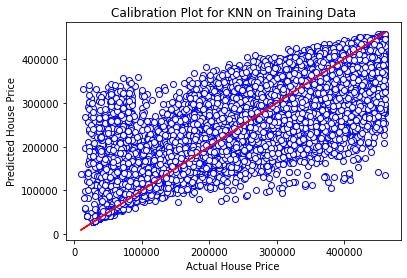

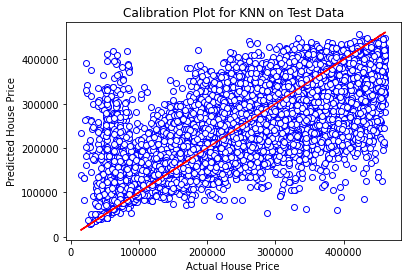

Working on ANN Regression
Epoch 1/15
4758/4758 [==============================] - 7s 1ms/step - loss: 0.3423 - mae: 0.4287
Epoch 2/15
4758/4758 [==============================] - 6s 1ms/step - loss: 0.3218 - mae: 0.4164
Epoch 3/15
4758/4758 [==============================] - 6s 1ms/step - loss: 0.3197 - mae: 0.4147
Epoch 4/15
4758/4758 [==============================] - 6s 1ms/step - loss: 0.3182 - mae: 0.4135
Epoch 5/15
4758/4758 [==============================] - 6s 1ms/step - loss: 0.3172 - mae: 0.4126
Epoch 6/15
4758/4758 [==============================] - 6s 1ms/step - loss: 0.3168 - mae: 0.4124
Epoch 7/15
4758/4758 [==============================] - 6s 1ms/step - loss: 0.3165 - mae: 0.4119
Epoch 8/15
4758/4758 [==============================] - 6s 1ms/step - loss: 0.3162 - mae: 0.4118
Epoch 9/15
4758/4758 [==============================] - 6s 1ms/step - loss: 0.3160 - mae: 0.4115
Epoch 10/15
4758/4758 [==============================] - 6s 1ms/step - loss: 0.3158 - mae: 0.4117
Epo

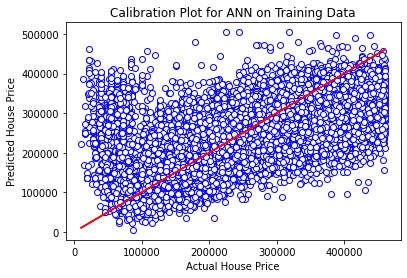

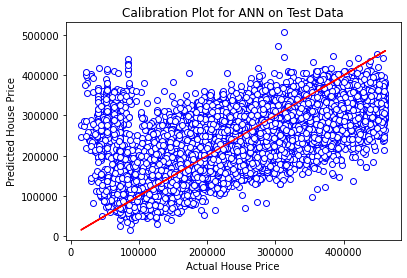

Working on Decision Trees Regression
here
Train R2 using Decision Trees: 0.862
Test R2 using Decision Trees: 0.804


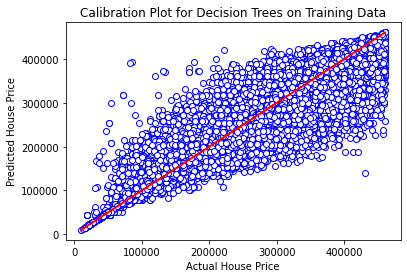

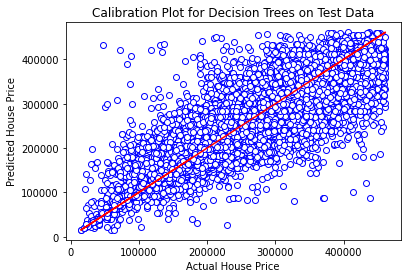

Working on Random Forest Regression
here
Train R2 using Random Forest: 0.968
Test R2 using Random Forest: 0.88


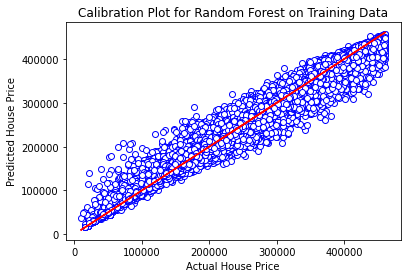

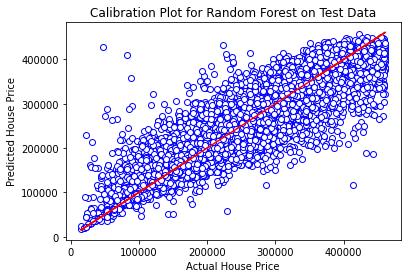

In [ ]:
r2_scores = dict()

for name, model in models.items():
  print(f"Working on {name} Regression") 
  if name == "ANN":
    y_train_ann = y_train/100000
    model.fit(X_train, y_train_ann, epochs=15, verbose=1)
  else:
    model.fit(X_train, y_train)

  train_pred = model.predict(X_train)
  y_pred = model.predict(X_test)

  if name=="ANN":
    train_pred = train_pred * 100000
    y_pred = y_pred * 100000

  train_r2 = round(r2_score(y_train, train_pred), 3)
  print(f"Train R2 using {name}: {train_r2}")

  test_r2 = round(r2_score(y_test, y_pred), 3)
  print(f"Test R2 using {name}: {test_r2}")
  save_and_display(y_train, train_pred, name, "Training")
  save_and_display(y_test, y_pred, name, "Test")
  r2_scores[name] = [train_r2, test_r2]

In [ ]:
r2_scores

{'ANN': [0.491, 0.486],
 'Decision Trees': [0.862, 0.804],
 'KNN': [0.795, 0.681],
 'Random Forest': [0.968, 0.88]}

## Comparison of Regression Models

In [ ]:
def comparision(x_plot, y_plot, prompt):
  plt.figure(figsize=(18,8))
  plt.title(f"R2 Scores on {prompt} Data")
  plt.xlabel("Algorithm")
  plt.ylabel("R2 Score")
  g=sns.barplot(x_plot, y_plot)
  for i,p in enumerate(g.patches):
          percentage = '{:.3f}'.format(y_plot[i])
          x1 = p.get_x() + p.get_width() - 0.5
          y1 = p.get_y() + p.get_height() + 0.02
          g.annotate(percentage, (x1, y1))
  plt.savefig(f"Output/comparison_{prompt}.png", dpi=300)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


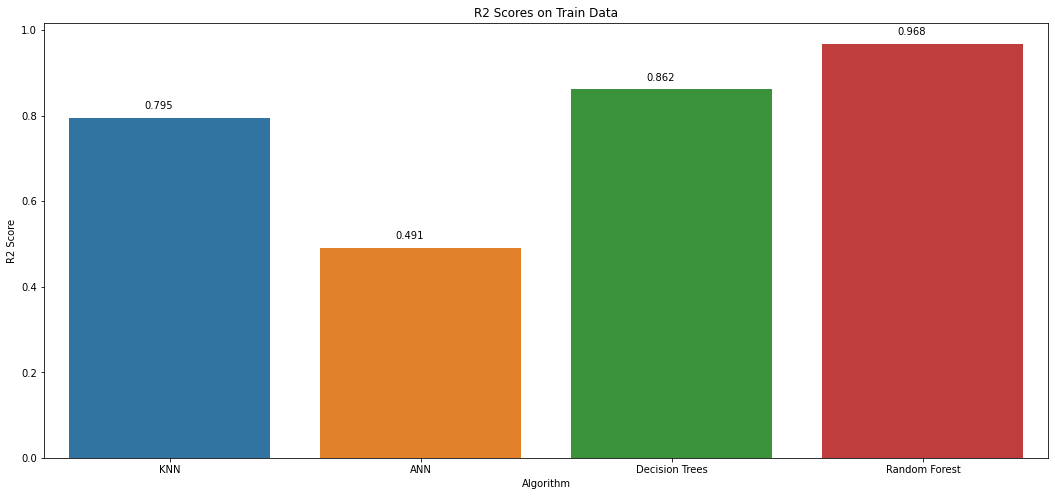

In [ ]:
x_plot = list(r2_scores.keys())
y_plot_train = [train for train, test in r2_scores.values()]
y_plot_test = [test for train, test in r2_scores.values()]
comparision(x_plot, y_plot_train, "Train")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


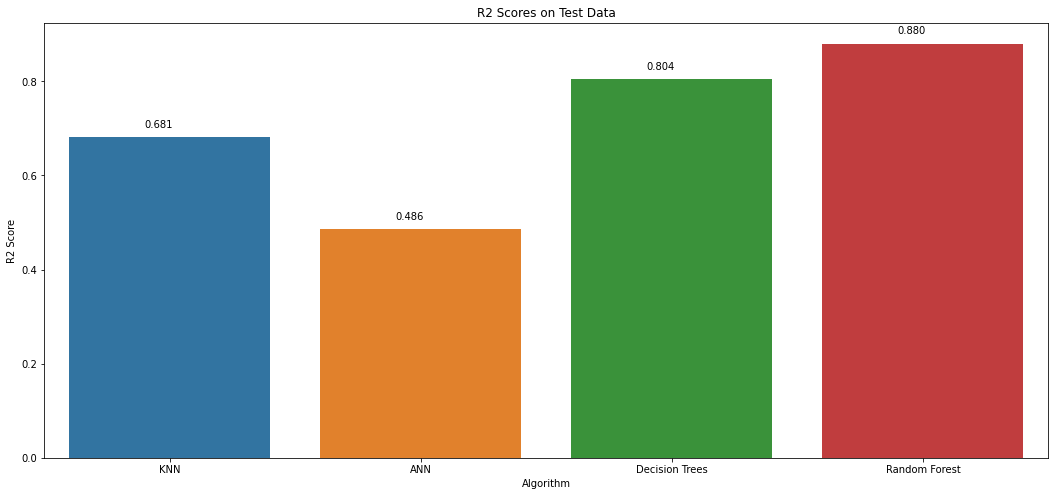

In [ ]:
comparision(x_plot, y_plot_test, "Test")

In [ ]:
from joblib import dump

dump(model, "final_rf_model.joblib")

['final_rf_model.joblib']

# Step 7: Training and Saving Model

## Loading Packages and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#data = pd.read_csv("/content/drive/MyDrive/[LATEST] Manish New Data/processedData.csv")
data = pd.read_csv("/content/drive/MyDrive/processedData.csv")

In [ ]:
data.head()

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear,housePrice
0,0.555556,0.183673,0.731019,0.730159,-0.42215,0.067219,-0.106941,0.769231,0.487179,0.521220,0.521220,0.2,0.0,0.8,-1.161442,-1.101543,0.589168,-0.64725,-1.066788,0.25,1.0,0.0,0.0,0.0,179300
1,0.555556,0.183673,0.637336,0.571429,-0.42215,-10.650685,10.653853,0.769231,0.487179,0.735954,0.735954,0.2,0.0,0.4,-1.237048,0.879733,-0.749912,-0.64725,0.317929,0.25,1.0,1.0,0.0,0.0,210500
2,0.555556,0.183673,0.487877,0.222222,-0.42215,0.068531,-0.107635,0.230769,0.474359,0.682270,0.682270,0.2,0.0,0.2,-1.237048,0.879733,0.589168,0.70620,0.317929,0.25,1.0,1.0,0.0,0.0,251400
3,0.555556,0.183673,0.212180,0.650794,-0.42215,0.067796,-0.107374,0.769231,0.487179,0.574903,0.574903,0.2,0.0,1.0,-1.237048,-1.101543,-0.749912,-0.64725,-1.066788,0.25,1.0,1.0,0.0,0.0,215400
4,0.555556,0.183673,0.198748,0.650794,-0.42215,0.067623,-0.107263,0.769231,0.474359,1.326472,1.326471,0.2,0.0,0.6,-0.783414,-1.101543,-0.749912,-0.64725,-1.066788,0.25,1.0,0.0,0.0,0.0,191800


In [ ]:
data.describe()

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear,housePrice
count,217493.000000,2.174930e+05,217493.000000,217493.000000,2.174930e+05,2.174930e+05,2.174930e+05,217493.000000,217493.000000,2.174930e+05,2.174930e+05,217493.000000,217493.000000,217493.000000,2.174930e+05,2.174930e+05,2.174930e+05,2.174930e+05,2.174930e+05,217493.000000,217493.000000,217493.000000,217493.000000,217493.0,217493.000000
mean,0.529738,1.836735e-01,0.506782,0.463812,-1.171986e-14,4.772956e-16,2.284249e-15,0.747868,0.639687,7.363512e-16,3.809764e-15,0.231979,0.057978,0.528628,-2.872402e-15,2.904244e-15,-6.701133e-15,2.732886e-15,3.567398e-15,0.252648,0.999724,0.824762,0.078738,0.0,229375.185408
std,0.225287,8.984223e-13,0.287989,0.292701,1.000002e+00,1.000002e+00,1.000002e+00,0.112158,0.185684,1.000002e+00,1.000002e+00,0.199411,0.196396,0.215032,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.045092,0.016607,0.380171,0.269330,0.0,78522.269707
min,0.000000,1.836735e-01,0.000000,0.000000,-6.495170e-01,-1.065068e+01,-4.301423e+00,0.000000,0.000000,-1.679804e+00,-1.679801e+00,0.000000,0.000000,0.000000,-1.393880e+01,-1.101543e+00,-4.097612e+00,-3.354150e+00,-2.451505e+00,0.000000,0.000000,0.000000,0.000000,0.0,10000.000000
25%,0.333333,1.836735e-01,0.255891,0.253968,-4.474130e-01,7.343619e-02,-1.018563e-01,0.769231,0.487179,-7.671842e-01,-7.671828e-01,0.000000,0.000000,0.400000,-7.078082e-01,-1.101543e+00,-7.499121e-01,-6.472500e-01,-1.066788e+00,0.250000,1.000000,1.000000,0.000000,0.0,174600.000000
50%,0.500000,1.836735e-01,0.517473,0.253968,-4.221500e-01,9.119871e-02,-9.334145e-02,0.769231,0.525641,-1.766658e-01,-1.766649e-01,0.200000,0.000000,0.400000,1.238541e-01,8.797335e-01,-8.037202e-02,-6.472500e-01,3.179285e-01,0.250000,1.000000,1.000000,0.000000,0.0,216500.000000
75%,0.666667,1.836735e-01,0.749004,0.730159,-1.316256e-01,1.130440e-01,-8.452755e-02,0.769231,0.782051,6.285866e-01,6.285867e-01,0.400000,0.000000,0.800000,7.286993e-01,8.797335e-01,5.891681e-01,7.062001e-01,3.179285e-01,0.250000,1.000000,1.000000,0.000000,0.0,275000.000000
max,1.000000,1.836735e-01,1.000000,1.000000,3.196774e+00,4.450606e+00,1.065385e+01,1.000000,1.000000,3.044344e+00,3.044342e+00,1.000000,1.000000,1.000000,1.862784e+00,4.842287e+00,2.597788e+00,1.018035e+01,1.416510e+01,1.000000,1.000000,1.000000,1.000000,0.0,461200.000000


In [ ]:
data.shape

(217493, 25)

In [ ]:
X = data.iloc[:, :-1]
y = data["housePrice"]

In [ ]:
print(len(X))
print(len(y))

217493
217493


## Train, Test and Validation Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=27)

In [ ]:
print(len(X_train))
print(len(X_test))

152245
45673


## Random Forest Regression Model

### Training

In [ ]:
# rf_model = RandomForestRegressor(max_depth=45)
rf_model = RandomForestRegressor(max_depth=23)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=22)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
train_pred = rf_model.predict(X_train)

### R2 - Evaluation

In [63]:
train_r2 = round(r2_score(y_train, train_pred), 3)
print(f"Train R2: {train_r2}")

test_r2 = round(r2_score(y_test, y_pred), 3)
print(f"Test R2: {test_r2}")

Train R2: 96.8
Test R2: 88.0


### Visualization

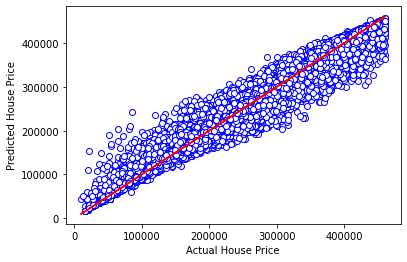

In [ ]:
plt.scatter(y_train, train_pred, c='w', edgecolors='b')
plt.plot(y_train, y_train, c='r')
plt.xlabel(f"Actual House Price")
plt.ylabel(f"Predicted House Price")
plt.savefig("Training Regression Calibration Plot.png", dpi=300)
plt.show()

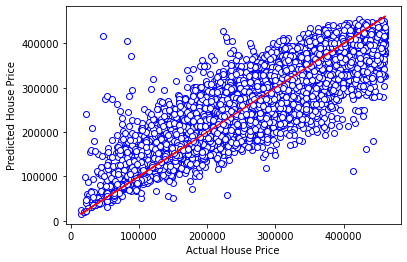

In [ ]:
plt.scatter(y_test, y_pred, c='w', edgecolors='b')
plt.plot(y_test, y_test, c='r')
plt.xlabel(f"Actual House Price")
plt.ylabel(f"Predicted House Price")
plt.savefig("Validation Regression Calibration Plot.png", dpi=300)
plt.show()

### Saving the model

In [ ]:
dump(rf_model, "rf_model.joblib")

['rf_model.joblib']

# Step 8: Online Learning

## Loading Packages and Data

In [ ]:
# Installing the packages

!pip install tensorflow-io
!pip install kafka-python

In [ ]:
# Importing the packages

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
import time 
from kafka import KafkaProducer
import tensorflow as tf
import tensorflow_io as tfio
# import pickle as pkl
from joblib import load

Download and setup Kafka for real time data stream simulation. 


In [ ]:
!curl -sSOL https://downloads.apache.org/kafka/2.8.1/kafka_2.12-2.8.1.tgz
!tar -xzf kafka_2.12-2.8.1.tgz 

Start Kafka and Zookeeper servers as a daemon processes. Zookeeper is a centralized service for maintaing configuration information, naming, providing distributed synchronization, and providing group services.

In [ ]:
!./kafka_2.12-2.8.1/bin/zookeeper-server-start.sh -daemon ./kafka_2.12-2.8.1/config/zookeeper.properties
!./kafka_2.12-2.8.1/bin/kafka-server-start.sh -daemon ./kafka_2.12-2.8.1/config/server.properties

## Create a topic to store partitions
Create topic for train and test dataset to store events in Kafka. Kafka is a distributed event streaming platform that lets you read, write, store and process partitions. These events or messages are organized and stored in topics. In simple terms, topic is similar to a folder in a filesystem, and the message are the file in that folder.

In [ ]:
!./kafka_2.12-2.8.1/bin/kafka-topics.sh --create --topic home-train --bootstrap-server localhost:9092 --replication-factor 1 --partitions 1
!./kafka_2.12-2.8.1/bin/kafka-topics.sh --create --topic home-test --bootstrap-server localhost:9092 --replication-factor 1 --partitions 2

Error while executing topic command : Topic 'home-train' already exists.
[2021-12-09 17:04:16,907] ERROR org.apache.kafka.common.errors.TopicExistsException: Topic 'home-train' already exists.
 (kafka.admin.TopicCommand$)
Error while executing topic command : Topic 'home-test' already exists.
[2021-12-09 17:04:20,213] ERROR org.apache.kafka.common.errors.TopicExistsException: Topic 'home-test' already exists.
 (kafka.admin.TopicCommand$)


## Describe the topic for details
Describe command helps us gather details on topic, it's partitions, replicas, and other important information.


In [ ]:
!./kafka_2.12-2.8.1/bin/kafka-topics.sh --describe --topic home-train --bootstrap-server localhost:9092
!./kafka_2.12-2.8.1/bin/kafka-topics.sh --describe --topic home-test --bootstrap-server localhost:9092

Topic: home-train	TopicId: 3wH1pcJbSpScV85RQ2OlZg	PartitionCount: 1	ReplicationFactor: 1	Configs: segment.bytes=1073741824
	Topic: home-train	Partition: 0	Leader: 0	Replicas: 0	Isr: 0
Topic: home-test	TopicId: xCbuluo9Sh6Wa06eOUAqgQ	PartitionCount: 2	ReplicationFactor: 1	Configs: segment.bytes=1073741824
	Topic: home-test	Partition: 0	Leader: 0	Replicas: 0	Isr: 0
	Topic: home-test	Partition: 1	Leader: 0	Replicas: 0	Isr: 0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Software Engg Regression Analysis/[LATEST] Manish New Data/onlineLearningData.csv")

In [ ]:
data.head(10)

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear,housePrice
0,0.55,0.183673,0.732941,0.738462,-0.427423,0.073222,-0.111884,0.8125,0.494253,-0.042721,-0.042721,0.2,0,0.8,-1.133603,-1.107410,0.325799,-0.689433,-1.007367,0.25,1,0,0,0,179300
1,0.55,0.183673,0.640179,0.569231,-0.427423,-10.080057,10.082796,0.8125,0.494253,-0.006182,-0.006182,0.2,0,0.4,-1.207690,0.876433,-0.742079,-0.689433,0.156434,0.25,1,1,0,0,210500
2,0.55,0.183673,0.489318,0.215385,-0.427423,0.074465,-0.112542,0.1875,0.482759,-0.015317,-0.015316,0.2,0,0.2,-1.207690,0.876433,0.325799,0.573313,0.156434,0.25,1,1,0,0,251400
3,0.55,0.183673,0.211031,0.646154,-0.427423,0.073769,-0.112294,0.8125,0.494253,-0.033586,-0.033586,0.2,0,1.0,-1.207690,-1.107410,-0.742079,-0.689433,-1.007367,0.25,1,1,0,0,215400
4,0.55,0.183673,0.198060,0.646154,-0.427423,0.073605,-0.112189,0.8125,0.482759,0.094302,0.094302,0.2,0,0.6,-0.763171,-1.107410,-0.742079,-0.689433,-1.007367,0.25,1,0,0,0,191800
5,0.55,0.183673,0.198060,0.646154,-0.427423,0.073765,-0.112220,0.8125,0.482759,-0.079261,-0.079260,0.0,0,0.4,-1.207690,0.876433,0.325799,0.573313,0.156434,0.25,1,1,0,0,200000
6,0.55,0.183673,0.020929,0.246154,-0.427423,0.075691,-0.111749,0.1875,0.482759,-0.051856,-0.051856,0.0,0,0.2,-0.614999,0.876433,0.325799,0.573313,0.156434,0.25,1,0,0,0,272600
7,0.55,0.183673,0.679638,0.246154,-0.427423,0.075310,-0.112056,0.1875,0.482759,0.012088,0.012088,0.0,0,0.2,-0.689085,-1.107410,-0.208140,0.573313,0.156434,0.25,1,1,0,0,254000
8,0.55,0.183673,0.679638,0.246154,-0.427423,0.074490,-0.111933,0.1875,0.482759,0.030358,0.030358,0.0,0,0.2,-0.689085,0.876433,0.859737,0.573313,0.156434,0.25,1,0,0,0,247700
9,0.55,0.183673,0.103990,0.246154,-0.427423,0.075564,-0.111954,0.1875,0.482759,0.231325,0.231325,0.4,0,0.2,-0.170480,0.876433,0.325799,0.573313,0.156434,0.25,1,1,0,0,269900


In [ ]:
train_df, test_df = train_test_split(data, test_size=0.3, shuffle=True)
test_df, validate_df = train_test_split(test_df, test_size= 0.3, shuffle= True)
x_train_df = train_df.drop(["housePrice"], axis=1)
y_train_df = train_df["housePrice"]

x_test_df = test_df.drop(["housePrice"], axis=1)
y_test_df = test_df["housePrice"]

x_validate_df = validate_df.drop(["housePrice"], axis = 1)
y_validate_df = validate_df["housePrice"]

In [ ]:
print("Number of training samples: ",len(train_df))
print("Number of testing sample: ",len(test_df))

Number of training samples:  35
Number of testing sample:  10


## Convert data to list format
Read each row from the dataframe and convert it to the list format to feed to Kafka.

In [ ]:
#Convert each test and train dataframe to list form to feed to kafka
x_train = list(filter(None, x_train_df.to_csv(index=False).split("\n")[1:]))
y_train = list(filter(None, y_train_df.to_csv(index=False).split("\n")[1:]))

x_test = list(filter(None, x_test_df.to_csv(index=False).split("\n")[1:]))
y_test = list(filter(None, y_test_df.to_csv(index=False).split("\n")[1:]))
len(x_train), len(y_train), len(x_test), len(y_test)

(35, 35, 10, 10)

In [ ]:
NUM_COLUMNS = len(x_train_df.columns)

## Create Kafka Producer 
Create Kafka producer which takes in data and sends the record to the partition within a topic in Kafka cluster. 

In [ ]:
#send each record to a partition within a topic in kafka cluster
def write_to_kafka(topic, items):
  count=0
  producer = KafkaProducer(bootstrap_servers=['localhost:9092'])
  for message, key in items:
    producer.send(topic, key=key.encode('utf-8'), value=message.encode('utf-8'))
    count += 1 
  producer.flush()
  print("Wrote {0} messages into topic: {1}".format(count, topic))

write_to_kafka("home-train", zip(x_train, y_train))
write_to_kafka("home-test", zip(x_test, y_test))

Wrote 35 messages into topic: home-train
Wrote 10 messages into topic: home-test


## Decode the incoming Online Data
Unlike traditional training of machine learning models, online learning is based on incrementally learning or updating parameters as soon as the new data points are available. This process continues indefinitely. In the code below, stream_timeout is set to 10000 milliseconds which means as all the messages are consumed from the topic, the dataset will wait for 10 more seconds before timing out and disconnecting from the Kafka cluster. If additional data arrives in that time period, model training resumes. 

In [ ]:
online_train_ds = tfio.experimental.streaming.KafkaGroupIODataset(
    topics=["home-train"],
    group_id="cgonline",
    servers="localhost:9092",
    stream_timeout=10000, # in milliseconds, to block indefinitely, set it to -1.
    configuration=[
        "session.timeout.ms=7000",
        "max.poll.interval.ms=8000",
        "auto.offset.reset=earliest"
    ],
)

def decode_kafka_online_item(raw_message, raw_key):
  message = tf.io.decode_csv(raw_message, [[0.0] for i in range(NUM_COLUMNS)])
  key = tf.strings.to_number(raw_key)
  return (message, key)

In [ ]:
# We decode the data and their corresponding labels, and store them as a simple array

online_train_ds_temp = online_train_ds.map(decode_kafka_online_item)

final_online_data = list()
final_online_label = list()

for data, label in online_train_ds_temp:
  data = np.array(data)
  label = np.array(label)
  final_online_data.append(data)
  final_online_label.append(label)

In [ ]:
final_online_data[:5]

[array([ 0.5       ,  0.18367347,  0.44190103,  0.21538462, -0.4460443 ,
         0.08095665, -0.10649131,  0.8125    ,  0.9770115 , -0.2802274 ,
        -0.28022727,  0.        ,  0.        ,  0.4       ,  0.5703841 ,
         0.87643266, -1.2760178 , -0.6894334 ,  0.15643424,  0.25      ,
         1.        ,  1.        ,  0.        ,  0.        ], dtype=float32),
 array([ 0.55      ,  0.18367347,  0.6950076 ,  0.24615385, -0.42742252,
         0.06264027, -0.10681795,  0.8125    ,  0.49425286,  1.5832833 ,
         1.5832833 ,  0.2       ,  0.        ,  1.        , -1.6522083 ,
        -1.1074098 , -0.74207896, -0.6894334 , -1.0073668 ,  0.25      ,
         1.        ,  1.        ,  0.        ,  0.        ], dtype=float32),
 array([ 0.5       ,  0.18367347,  0.8446697 ,  0.24615385, -0.4460443 ,
         0.08162275, -0.10560156,  0.8125    ,  0.6666667 , -0.17974396,
        -0.17974387,  0.2       ,  0.        ,  0.4       ,  0.19995204,
         0.87643266,  0.32579863, -0.689433

In [ ]:
final_online_label[:5]

[array(241100., dtype=float32),
 array(292000., dtype=float32),
 array(204600., dtype=float32),
 array(218100., dtype=float32),
 array(200000., dtype=float32)]

## Loading the pretrained Random Forest Model

In [ ]:
import joblib

rf_model = joblib.load("/content/drive/MyDrive/Software Engg Regression Analysis/[LATEST] Manish New Data/final_rf_model.joblib")

In [ ]:
type(rf_model)

sklearn.ensemble._forest.RandomForestRegressor

## Training on New Online Data

In [ ]:
# Fitting the pretrained random forest model using the online data

rf_model.fit(final_online_data, final_online_label)

RandomForestRegressor(max_depth=23)

## Model Evaluation and Visualization

In [ ]:
# Now testing the new model predictions on the new online data

preds = rf_model.predict(final_online_data)

In [ ]:
from sklearn.metrics import r2_score

print(f"R2-Score: {round(r2_score(final_online_label, preds), 3)}")

R2-Score: 0.891


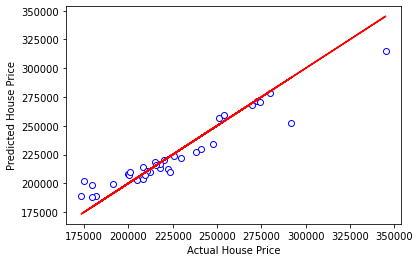

In [ ]:
# Plotting the predictions on new online data

plt.scatter(final_online_label, preds, c='w', edgecolors='b')
plt.plot(final_online_label, final_online_label, c='r')
plt.xlabel(f"Actual House Price")
plt.ylabel(f"Predicted House Price")
plt.savefig("Validation Regression Calibration Plot.png", dpi=300)
plt.show()

# Step 9: Testing New User Data [DEMO]

## Loading Packages and Data

In [64]:
import pandas as pd
import json
from joblib import load

import warnings
warnings.filterwarnings("ignore")

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
user_data_2 = pd.read_csv("/content/drive/MyDrive/Software Engg Regression Analysis/[LATEST] Manish New Data/demo_test_data.csv")

## Data Validation [Test Cases]

In [67]:
# User 108 and 113
user_id = 108

In [68]:
user_data = user_data_2.loc[user_data_2["id"] == user_id]
user_data

,id,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear
0,108,Stone Mountain,GA,Dee,Ct,30087,33.857828,-84.167465,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Level Grade,Average,Ranch/Rambler,1975,1,8,4,2,Forced air,Yes,Crawl Space/Raised,Masonry,2021


In [69]:
zip_average_price = {30047: 224924.8452,
                     30087: 190259.9042}

zip = int(user_data["zip"])
print(f"User {user_id} belongs to the zip {zip}, and the average price for that zip is {zip_average_price[zip]}")

User 108 belongs to the zip 30087, and the average price for that zip is 190259.9042


In [70]:
user_id = int(user_data["id"])
user_data = user_data.iloc[:1, 1:]

In [71]:
user_id

108

In [72]:
user_data

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear
0,Stone Mountain,GA,Dee,Ct,30087,33.857828,-84.167465,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Level Grade,Average,Ranch/Rambler,1975,1,8,4,2,Forced air,Yes,Crawl Space/Raised,Masonry,2021


In [73]:
lotSizqSqFt = user_data["lotSizeSquareFeet"].values

In [74]:
# Loading the Encoding Database to encode the categorical data into numbers

file_path = "/content/drive/MyDrive/Software Engg Regression Analysis/[LATEST] Manish New Data/encodings_database.json"
file = open(file_path, "r")
encodings_database = json.load(file)

In [75]:
categorical_cols = ["city", "state", "street", "streetSuffix", "landUseDescription", "zoningDescription", "lotTopography", "architecturalStyle", "condition", "heating", "airConditioning",	"foundation", "fireplace"]
numerical_cols = ["zip", "latitude", "longitude", "lotSizeAcres",	"lotSizeSquareFeet",	"yearBuilt",	"totalStories",	"totalRooms",	"bedrooms",	"baths", "soldYear"]

### Validating Encoding State

In [79]:
def encode_state(state):
    '''
    This function returns the label of the code of the entered state.
    Args:
        state: str
        - accepts states in USA

    Returns:
        state_code: int
            - -1 for invalid
            - 0 to 50 for actual state codes
    '''
    state = state.lower()
    if state not in encodings_database["state"].keys():
        print("Only accepts the states of USA!")
        state_code = -1
    else:
        print("State Encoded")
        state_code = encodings_database["state"][state]
    return state_code

In [91]:
# Check whether the state is valid or not
state = list(user_data["state"])[0]
state_code = encode_state(state)
print(state)
print(state_code)

State Encoded
GA
9


In [92]:
state_code = encode_state("BC")
print(state_code)

Only accepts the states of USA!
-1


### Validating Numerical Data

In [87]:
def validate_numerical_data(num_col_val):
    '''
    This function validates whether the input numerical column actually has the numerical data
    Args:
        num_col_val: str
            - string with an integer e.g. '56'
    Returns:
        number_flag: bool
            - True if all the data are real numbers
            - False if the data is other than real number
    '''
    valid_number_flag = True
    try:
        float(num_col_val)
    except:
        valid_number_flag = False
        print("Only accepts Numerical Data!")
    else:
        print("Numerical Data: Detected and Validated")

    return valid_number_flag

In [88]:
for j, col in enumerate(numerical_cols):
    valid_number_flag = validate_numerical_data(list(user_data[col])[0])
    print(list(user_data[col])[0])
    print(valid_number_flag)
    print("\n")

Numerical Data: Detected and Validated
30087
True


Numerical Data: Detected and Validated
33.857828000000005
True


Numerical Data: Detected and Validated
-84.167465
True


Numerical Data: Detected and Validated
0.41
True


Numerical Data: Detected and Validated
17859.6
True


Numerical Data: Detected and Validated
1975
True


Numerical Data: Detected and Validated
1
True


Numerical Data: Detected and Validated
8
True


Numerical Data: Detected and Validated
4
True


Numerical Data: Detected and Validated
2
True


Numerical Data: Detected and Validated
2021
True




In [89]:
valid_number_flag = validate_numerical_data("Masonry")
print(valid_number_flag)

Only accepts Numerical Data!
False


### Validating Categorical Data

In [93]:
def validate_categorical_data(cat_col_val):
    '''
    This function validates whether the input categorical column actually has the categorical data
    Args:
        cat_col_val: str
            - actual string value
    Returns:
        valid_categorical_flag: bool
            - True if all the data are strings
            - False if the data is other than strings
    '''
    valid_categorical_flag = True
    try:
        float(cat_col_val)
    except:
        if bool(cat_col_val) is False:
            valid_categorical_flag = False
            return valid_categorical_flag
        print("Categorical Data: Detected and Validated!")
    else:
        print("Only accepts Categorical Features!")
        valid_categorical_flag = False

    return valid_categorical_flag

In [94]:
for j, col in enumerate(categorical_cols):
    valid_categorical_flag = validate_categorical_data(list(user_data[col])[0])
    print(list(user_data[col])[0])
    print(valid_categorical_flag)
    print("\n")

Categorical Data: Detected and Validated!
Stone Mountain
True


Categorical Data: Detected and Validated!
GA
True


Categorical Data: Detected and Validated!
Dee
True


Categorical Data: Detected and Validated!
Ct
True


Categorical Data: Detected and Validated!
Single Family Residential
True


Categorical Data: Detected and Validated!
R100-Single Family Residence
True


Categorical Data: Detected and Validated!
Level Grade
True


Categorical Data: Detected and Validated!
Ranch/Rambler
True


Categorical Data: Detected and Validated!
Average
True


Categorical Data: Detected and Validated!
Forced air
True


Categorical Data: Detected and Validated!
Yes
True


Categorical Data: Detected and Validated!
Crawl Space/Raised
True


Categorical Data: Detected and Validated!
Masonry
True




In [96]:
valid_categorical_flag = validate_categorical_data(5)
print(valid_categorical_flag)

Only accepts Categorical Features!
False


In [98]:
user_data

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear
0,Stone Mountain,GA,Dee,Ct,30087,33.857828,-84.167465,Single Family Residential,R100-Single Family Residence,0.41,17859.6,Level Grade,Average,Ranch/Rambler,1975,1,8,4,2,Forced air,Yes,Crawl Space/Raised,Masonry,2021


## Data Preprocessing

### Encoding the Categorical Features

In [99]:
for i, name in enumerate(categorical_cols):
  user_data[name] = encodings_database[name][user_data[name].values[0].lower()]

In [100]:
user_data

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear
0,18,9,2214,14,30087,33.857828,-84.167465,13,43,0.41,17859.6,1,0,5,1975,1,8,4,2,1,1,0,0,2021


### MinMax Scaling

In [101]:
# Loading the MinMaxScalar to normalize the categorical features

filename = "/content/drive/MyDrive/Software Engg Regression Analysis/[LATEST] Manish New Data/minMaxScalar.joblib"
minMaxScalar = load(filename)

In [102]:
# MINMAX NORMALIZATION:

categorical_cols.remove("state")
categorical_data = user_data[categorical_cols]

user_data[categorical_cols] = minMaxScalar.transform(categorical_data)

#Encoding state separately, since we did not have all the 50 states in the data
user_data["state"] /= 49

In [103]:
user_data

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear
0,0.9,0.183673,0.241334,0.215385,30087,33.857828,-84.167465,0.8125,0.494253,0.41,17859.6,0.2,0.0,1.0,1975,1,8,4,2,0.25,1.0,0.0,0.0,2021


### Standard Scaling

In [104]:
# Now we have all numerical values but in string format, so we convert all the values to numeric
user_data = user_data.apply(pd.to_numeric, errors="coerce")

In [105]:
# Loading the StandardScalar to normalize the numerical features

filename = "/content/drive/MyDrive/Software Engg Regression Analysis/[LATEST] Manish New Data/standardScalar.joblib"
standardScalar = load(filename)

In [106]:
numerical_data = user_data[numerical_cols]

user_data[numerical_cols] = standardScalar.transform(numerical_data)

In [107]:
user_data.shape

(1, 24)

In [108]:
user_data

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear
0,0.9,0.183673,0.241334,0.215385,-0.179133,0.06974,-0.11446,0.8125,0.494253,-0.051856,-0.051856,0.2,0.0,1.0,-1.429949,-1.10741,0.325799,0.573313,-1.007367,0.25,1.0,0.0,0.0,0.0


### Predictions using pretrained Regression Model

In [109]:
# Now the new test data is ready to feed into the Random Forest Regression Model
# rf_model = load("/content/drive/MyDrive/Software Engg Regression Analysis/[LATEST] Manish New Data/final_rf_model.joblib"
rf_model = load("/content/drive/MyDrive/Software Engg Regression Analysis/[LATEST] Manish New Data/rf_model_95_86_randomState27.joblib")

pred = rf_model.predict(user_data.values)
pred = round(pred[0], 3)
print("Predicted Housing Price:", pred)

Predicted Housing Price: 200529.766


In [110]:
# Dividing the predicted housing price by lotSizeSquareFeet

predPerSqFt = round((pred/lotSizqSqFt)[0], 3)
print(f"House Price per SqFt: {predPerSqFt}")

House Price per SqFt: 11.228


### Amortization Table and Equity Value

In [116]:
amortization_table = pd.read_csv("/content/drive/MyDrive/Software Engg Regression Analysis/[LATEST] Manish New Data/demo_amortization_table.csv")

In [117]:
amortization_table

,id,Mortgage Starting Date,House Value,Paid In Cash,Principal Loan Amount,Annual Interest Rate,Total Months Elapsed,Loan Period (Years),Monthly Payment Amount,Total Principal Paid,Total Interest Paid,Remaining Principal
0,108,5/13/2011,196100,74518,"$121,582",4%,126,30,($580.45),-27374.96705,-45761.86708,94207.03295
1,113,2/4/2014,254700,28017,"$226,683",4%,93,30,"($1,082.22)",-35540.55630,-65105.83992,191142.44370


In [118]:
user_amortization_data = amortization_table.loc[amortization_table["id"] == user_id]
user_amortization_data

,id,Mortgage Starting Date,House Value,Paid In Cash,Principal Loan Amount,Annual Interest Rate,Total Months Elapsed,Loan Period (Years),Monthly Payment Amount,Total Principal Paid,Total Interest Paid,Remaining Principal
0,108,5/13/2011,196100,74518,"$121,582",4%,126,30,($580.45),-27374.96705,-45761.86708,94207.03295


In [119]:
user_amortization_data["Predicted House Price"] = pred

In [120]:
user_amortization_data.head()

,id,Mortgage Starting Date,House Value,Paid In Cash,Principal Loan Amount,Annual Interest Rate,Total Months Elapsed,Loan Period (Years),Monthly Payment Amount,Total Principal Paid,Total Interest Paid,Remaining Principal,Predicted House Price
0,108,5/13/2011,196100,74518,"$121,582",4%,126,30,($580.45),-27374.96705,-45761.86708,94207.03295,200529.766


In [121]:
user_amortization_data["Predicted Square Feet Price"] = predPerSqFt

In [122]:
user_amortization_data["Equity Value"] = user_amortization_data["Predicted House Price"] - user_amortization_data["Remaining Principal"]

In [123]:
user_amortization_data

,id,Mortgage Starting Date,House Value,Paid In Cash,Principal Loan Amount,Annual Interest Rate,Total Months Elapsed,Loan Period (Years),Monthly Payment Amount,Total Principal Paid,Total Interest Paid,Remaining Principal,Predicted House Price,Predicted Square Feet Price,Equity Value
0,108,5/13/2011,196100,74518,"$121,582",4%,126,30,($580.45),-27374.96705,-45761.86708,94207.03295,200529.766,11.228,106322.73305


### Encrypting the Predicted Values

In [124]:
!pip install cryptography

     |████████████████████████████████| 3.6 MB 4.3 MB/s 


In [125]:
# Encrypting the data to get the cipher text using Fernet Encryption

from cryptography.fernet import Fernet

# Message to encrypt
id = str(int(user_amortization_data["id"]))
house_price = str(float(user_amortization_data["Predicted House Price"]))
house_price_per_sqft = str(float(user_amortization_data["Predicted Square Feet Price"]))
equity_value = str(round(float(user_amortization_data["Equity Value"]), 3))

# Generating the Key
key = Fernet.generate_key()
fernet = Fernet(key)

print(f"Encryption Key: {key}\n")

# Encrpyting the messages
enc_id = fernet.encrypt(id.encode())
enc_house_price = fernet.encrypt(house_price.encode())
enc_equity_value = fernet.encrypt(equity_value.encode())
enc_house_price_per_sqft = fernet.encrypt(house_price_per_sqft.encode())

print("User ID: ", id)
print(f"Encrypted User ID: {enc_id}\n")

print("Predicted House Price: ", house_price)
print(f"Encrypted House Price: {enc_house_price}\n")

print("Predicted House Price Per Sqft: ", house_price_per_sqft)
print(f"Encrypted House Price Per Sqft:  {enc_house_price_per_sqft}\n")

print("Predicted Equity Value: ", equity_value)
print(f"Encrypted Equity Value: {enc_equity_value}\n")

Encryption Key: b'oPVfkFcnL5CnxXG1VBF1Ov90u0NzXJuarixIpLxZKto='

User ID:  108
Encrypted User ID: b'gAAAAABhsuVCtrm-tAUe620WCgUhs9m3TdqCtZ2VYi6L1OwN82pWwGTEB-gpWtlgSdNUy1p2vj6u7wjYR4ahtYEE6BB3FbaMcA=='

Predicted House Price:  200529.766
Encrypted House Price: b'gAAAAABhsuVCwHAsbMeAvPHxouo18qCbEx4KxObV5fg5Q2BhrYqCfuuHZsJsmOqAOX8SeLxW30ZiObrreTYSIZ1EWVzFkOtWdA=='

Predicted House Price Per Sqft:  11.228
Encrypted House Price Per Sqft:  b'gAAAAABhsuVCypLHsMQcO8DyeFOgHg51XIeFjDeqSYSsJl2b1kA-tnbEN1OeHDtrZxOPeSwR8hy6N3QUh4i_yr2pgo2mC_vYvA=='

Predicted Equity Value:  106322.733
Encrypted Equity Value: b'gAAAAABhsuVCLXuwjxGsx0qz2Opay3mOFldkAMv7_Qbkpqc3VgM95SPSRxgTS5sfpXeXIOr502LIIfqEXBce6blL6n4aubr4cg=='



In [126]:
print(f"User {user_id} belongs to the zip {zip}, and the average price for that zip is {zip_average_price[zip]}")

User 108 belongs to the zip 30087, and the average price for that zip is 190259.9042


### Decrypting the Cipher Text

In [127]:
dec_id = fernet.decrypt(enc_id).decode()
dec_house_price = fernet.decrypt(enc_house_price).decode()
dec_equity_value = fernet.decrypt(enc_equity_value).decode()
dec_house_price_per_sqft = fernet.decrypt(enc_house_price_per_sqft).decode()

print(f"Decrypted User ID: {dec_id}")
print("Decrypted House Price: ", dec_house_price)
print("Decrypted House Price Per Sqft: ", dec_house_price_per_sqft)
print("Decrypted Equity Value: ", dec_equity_value)

Decrypted User ID: 108
Decrypted House Price:  200529.766
Decrypted House Price Per Sqft:  11.228
Decrypted Equity Value:  106322.733
